# **Unified classification and risk-stratification in Acute Myeloid Leukemia**


>>> # **Tutorial for Main Figures** : 

In [1]:
R.version.string

[1] "R version 4.1.0 (2021-05-18)"

In [4]:
options(warn=-1)

# # Step 1: Install and load missing libraries
# start_time <- Sys.time()
some_packages <- c("ggplot2","reshape2","data.table","stringr","gridExtra","survival","survminer","bshazard","colorspace","mstate","ggrepel","cmprsk")
for (package in some_packages){
#   if(!require(package,character.only = TRUE)){
#     install.packages(package,character.only = TRUE)
#   }
  library(package,character.only=TRUE)
}
# end_time <- Sys.time()
# paste0("It takes :", round(end_time-start_time,2), " minutes to install all the libraries (survminer takes a LOT of time!)")

In [5]:
source('src/tools_analysis_bis.R')

# **Main Figure 1:**

## ***Panel A.***

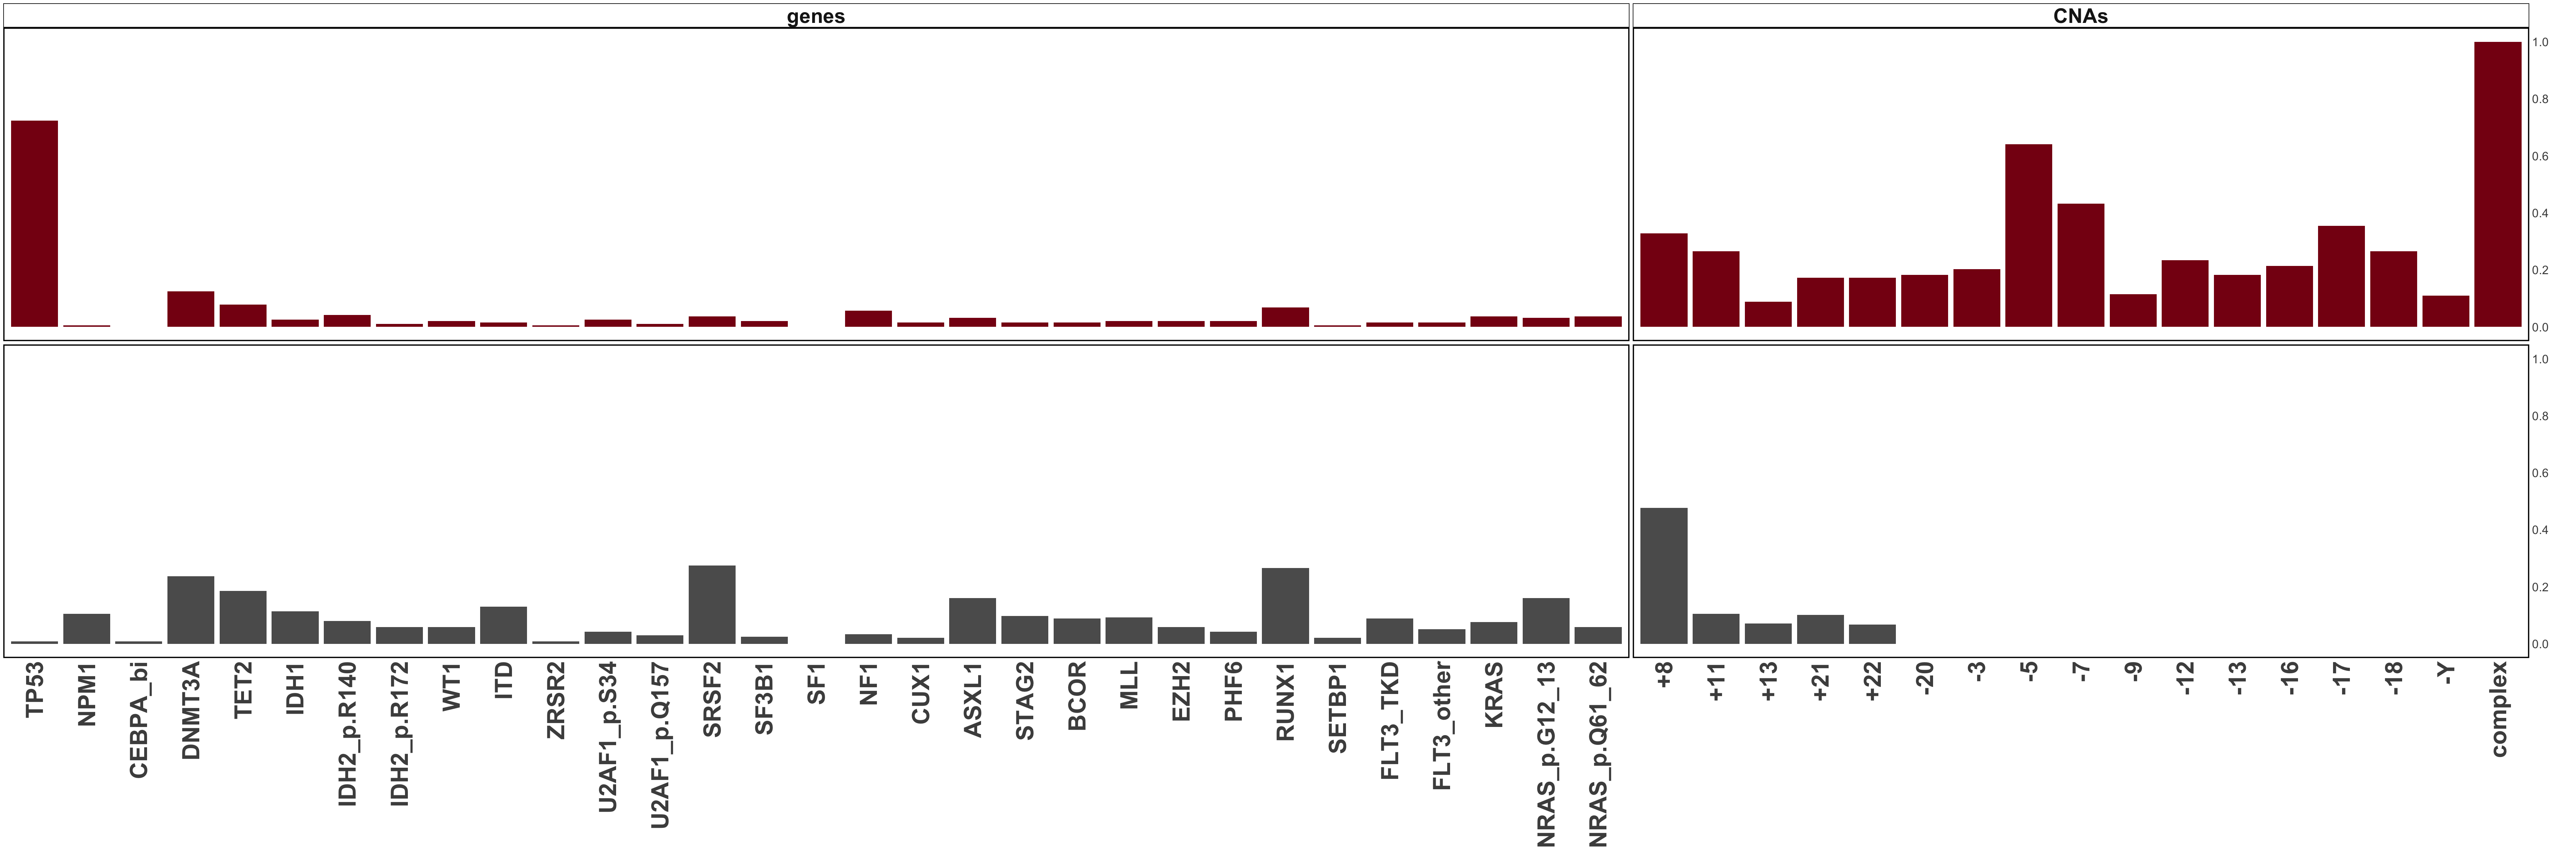

In [6]:
# Get patients with 3 or more trisomies and no deletions :
complex_patients <- rownames(df_final[df_final$complex==1 ,])
additions_patients <- readRDS("data/list_patients_ADDITIONS.rds")
deletions_patients <- readRDS("data/list_patients_DELETIONS.rds")
patients_trisomies_no_deletions <- setdiff(intersect(complex_patients,additions_patients),deletions_patients)

df_patients_trisomies_no_deletions <- df_final[rownames(df_final) %in% patients_trisomies_no_deletions,]
df_patients_trisomies_no_deletions$comparison <- "Trisomies (>=3)"

# Get patients with trisomies (<3), no deletions and therefore not complex
df_trisomies_not_complex <- df_final[df_final$complex==0 & rownames(df_final) %in% additions_patients & !rownames(df_final) %in% deletions_patients ,]
df_trisomies_not_complex$comparison <- "Trisomies (<3)"

# Get all complex patients with less than 3 trisomies
df_other_complexes <- df_final[df_final$complex==1,]
df_other_complexes <- df_other_complexes[! rownames(df_other_complexes) %in%
                                         intersect(rownames(df_other_complexes),rownames(df_patients_trisomies_no_deletions)),] # remove the complex coming only from trisomies
df_other_complexes$comparison <- "complex (<3 trisomies)"

# Combined the 3 groups
df_all <- rbind(df_patients_trisomies_no_deletions,df_trisomies_not_complex,df_other_complexes)
df_all$comparison <- factor(df_all$comparison,levels=c("complex (<3 trisomies)","Trisomies (>=3)","Trisomies (<3)"))

# 2 groups to plot
df_all$principal_component_1 <- ifelse(df_all$comparison=="complex (<3 trisomies)",1,0)
df_all$principal_component_2 <- ifelse(df_all$comparison=="Trisomies (<3)",1,0)

# Columns to plot
splicing <-  c("ZRSR2", "U2AF1_p.S34","U2AF1_p.Q157", "SRSF2", "SF3B1", "SF1", "NF1", "CUX1")
chromatin <- c("ASXL1", "STAG2", "BCOR", "MLL", "EZH2", "PHF6")
transcriptor <- c("RUNX1","SETBP1") 
factors <- c(splicing,chromatin,transcriptor)
col_order<-c("+8","+11","+13","+21","+22",'-20','-3','-5','-7','-9','-12','-13','-16','-17','-18','-Y',"TP53","complex","NPM1",
             "CEBPA_bi","DNMT3A","TET2","IDH1","IDH2_p.R140","IDH2_p.R172","WT1","ITD",factors,
                   "FLT3_TKD","FLT3_other","KRAS","NRAS_p.G12_13","NRAS_p.Q61_62")

# Plot
plot(stratas_features_frequency(df_all[df_all$comparison %in% c("complex (<3 trisomies)","Trisomies (<3)"),],genes,cytos,stratas=c("principal_component_1","principal_component_2"),
                                cols_to_keep=c(col_order),facet_type=T,colors=c("#870C14","#5C5C5C"))+
     theme(panel.border = element_rect(colour = "black", fill=NA, size=2),
           panel.grid.major = element_blank(), panel.grid.minor = element_blank()))

# pdf("figures/Main_Figures/Figure 1/PanelA-Chromosomal_aneuploidies_complex_molecularV2.pdf",width=40,height=20)
# plot(stratas_features_frequency(df_all[df_all$comparison %in% c("complex (<3 trisomies)","Trisomies (<3)"),],genes,cytos,stratas=c("principal_component_1","principal_component_2"),
#                                 cols_to_keep=c(col_order),facet_type=T,colors=c("#870C14","#5C5C5C"))+
#      theme(panel.border = element_rect(colour = "black", fill=NA, size=2),
#            panel.grid.major = element_blank(), panel.grid.minor = element_blank()))
# dev.off



## ***Panel B.***

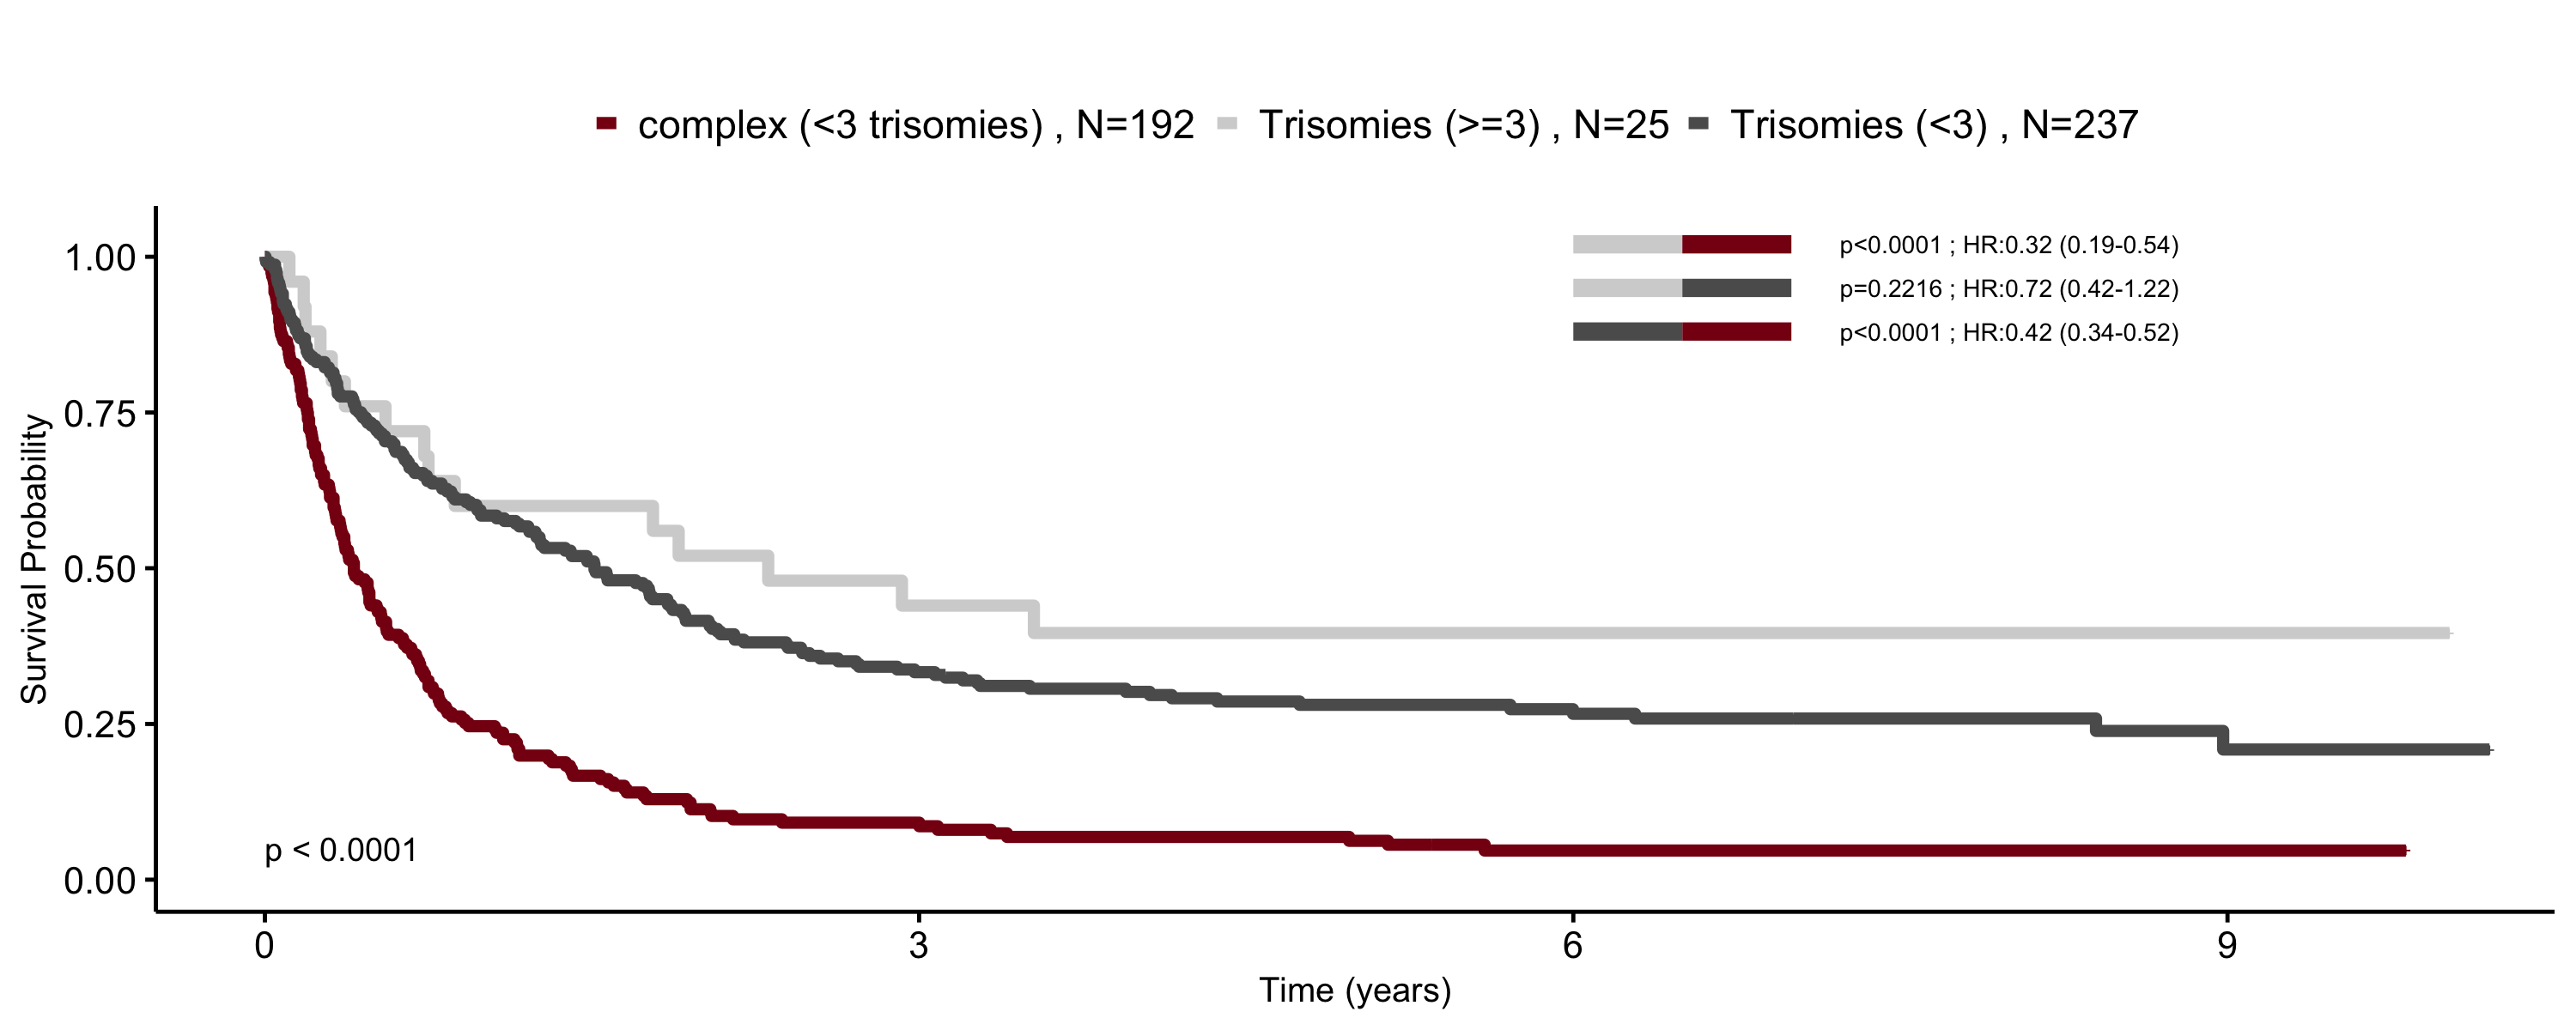

In [7]:
# Get patients with 3 or more trisomies and no deletions :
complex_patients <- rownames(df_final[df_final$complex==1 ,])
additions_patients <- readRDS("data/list_patients_ADDITIONS.rds")
deletions_patients <- readRDS("data/list_patients_DELETIONS.rds")
patients_trisomies_no_deletions <- setdiff(intersect(complex_patients,additions_patients),deletions_patients)

df_patients_trisomies_no_deletions <- df_final[rownames(df_final) %in% patients_trisomies_no_deletions,]
df_patients_trisomies_no_deletions$comparison <- "Trisomies (>=3)"

# Get patients with trisomies (<3), no deletions and therefore not complex
df_trisomies_not_complex <- df_final[df_final$complex==0 & rownames(df_final) %in% additions_patients & !rownames(df_final) %in% deletions_patients ,]
df_trisomies_not_complex$comparison <- "Trisomies (<3)"

# Get all complex patients with less than 3 trisomies
df_other_complexes <- df_final[df_final$complex==1,]
df_other_complexes <- df_other_complexes[! rownames(df_other_complexes) %in%
                                         intersect(rownames(df_other_complexes),rownames(df_patients_trisomies_no_deletions)),] # remove the complex coming only from trisomies
df_other_complexes$comparison <- "complex (<3 trisomies)"

# Combined the 3 groups
df_all <- rbind(df_patients_trisomies_no_deletions,df_trisomies_not_complex,df_other_complexes)
df_all$comparison <- factor(df_all$comparison,levels=c("complex (<3 trisomies)","Trisomies (>=3)","Trisomies (<3)"))

# Surv
surv_object <- Surv(time = df_all$os, event = df_all$os_status)
fit <- survfit(surv_object ~ comparison, data = df_all)

# Get pvalues, HR and CI for the 3 comparisons
res <- get_pvalue_and_HR(formula=Surv(os,os_status)~comparison,data = df_all[df_all$comparison %in% c("Trisomies (>=3)","complex (<3 trisomies)"),])

res1 <- get_pvalue_and_HR(formula=Surv(os,os_status)~comparison,data = df_all[df_all$comparison %in% c("Trisomies (>=3)","Trisomies (<3)"),])

res2 <- get_pvalue_and_HR(formula=Surv(os,os_status)~comparison,data = df_all[df_all$comparison %in% c("Trisomies (<3)","complex (<3 trisomies)"),])

# Surv Plot and Risk table
set_notebook_plot_size(25,10)
surv <- plot_surv_curves(fit,y="Survival Probability",xlim=c(0,10),break.x.by=3,ylim=c(0,1.03),pval=T,vals=c("#870C14","lightgrey","#5C5C5C"),risk.tab=T)

# Surv Plot
surv_plot <- surv$plot+
             annotate("segment", x = c(6,6.5,6,6.5,6,6.5),
                                 xend = c(6.5,7,6.5,7,6.5,7),
                                 y = c(1.02,1.02,0.95,0.95,0.88,0.88), 
                                 yend = c(1.02,1.02,0.95,0.95,0.88,0.88),
                                 size=6,
                                 colour = c("lightgrey","#870C14","lightgrey","#5C5C5C","#5C5C5C","#870C14"))+ 
             annotate(geom="text", x=rep(8,3) , y=c(1.02,0.95,0.88), label=c(res,res1,res2),size=6)

set_notebook_plot_size(25,10)
surv_plot

## ***Panel C.***


 sAML like All Others 
       601       1512 


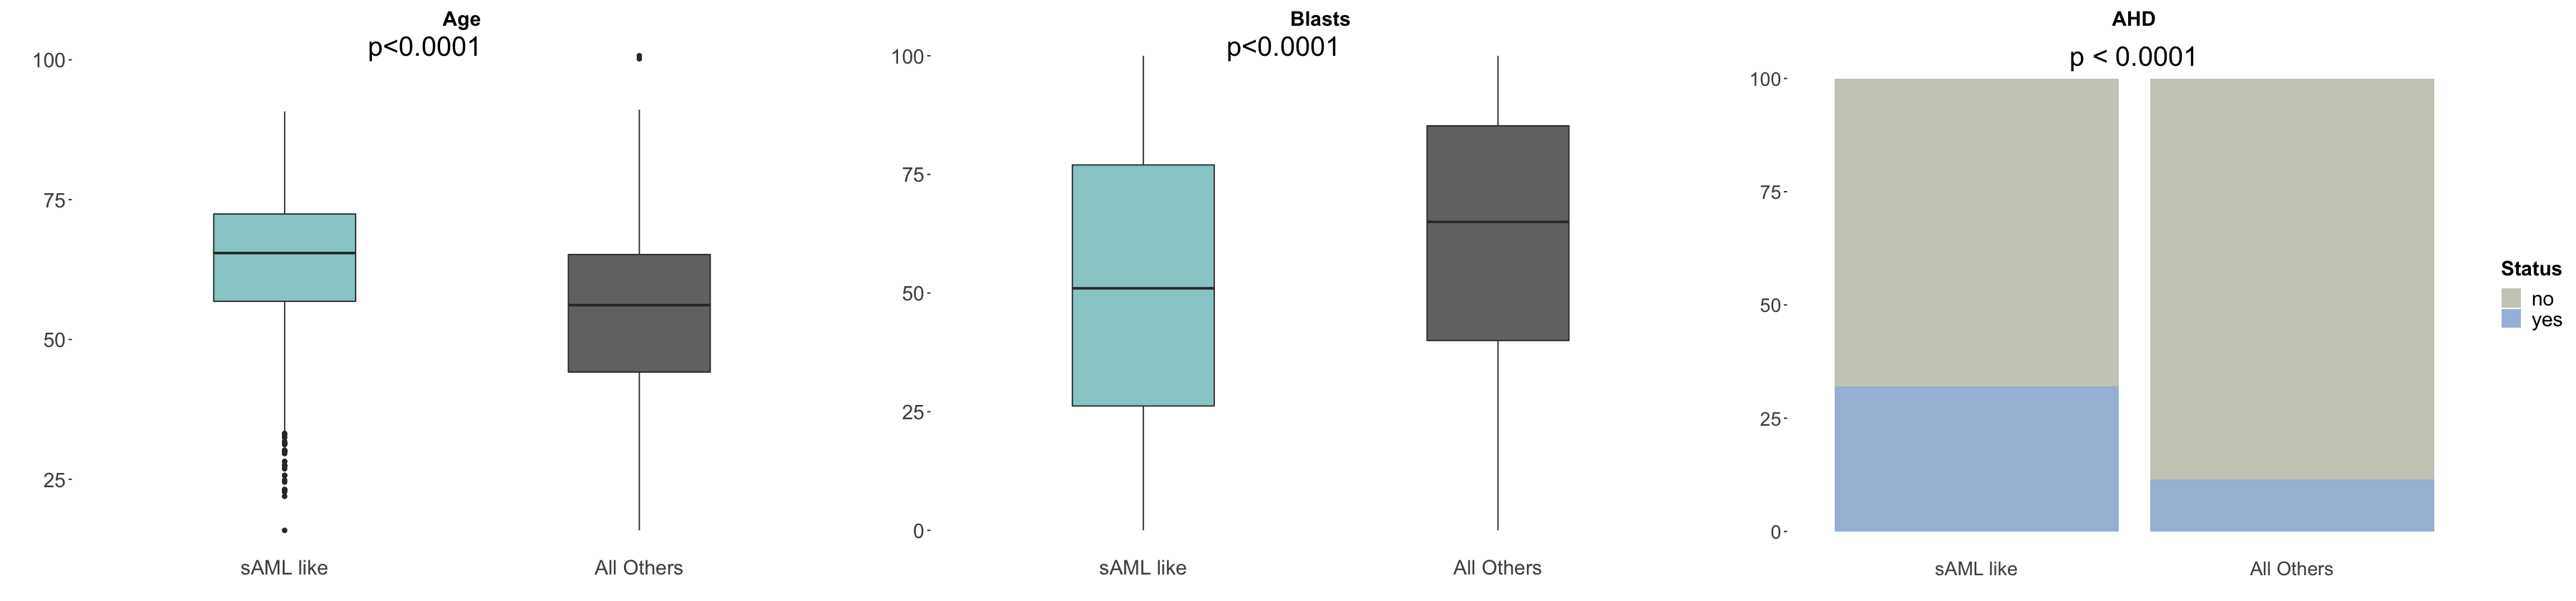

In [8]:
df_sAML_comparison <- df_final
df_sAML_comparison$comparison <- ifelse(df_sAML_comparison$principal_component_sAML1==1 | df_sAML_comparison$principal_component_sAML2==1, "sAML like","All Others")
df_sAML_comparison$comparison <- factor(df_sAML_comparison$comparison,levels=c("sAML like","All Others"))
print(table(df_sAML_comparison$comparison))

# Plots of age and blasts
clin_var_plot <- list()
for (cont in c("age","bm_blasts")){
    if(cont=="age"){
        ylab <- "Age"
        ylim <- c(0,100)
        label.y=c(85)
    } else {
        ylab <- "Blasts"
        ylim <- c(0,200)
        label.y=c(95)
    }
    clin_var_plot[[cont]] <- ggplot(df_sAML_comparison,aes_string(x="comparison",y=df_sAML_comparison[,cont]))+
                             theme_bw()+
                             theme(plot.title = element_text(hjust = 0.5,size=17,vjust=0,face="bold"),
                                   legend.position = "none",
                                   axis.ticks.x=element_blank(),axis.title.y=element_text(size=20,face="bold"),
                                   axis.text=element_text(size=17),
                                   panel.border = element_rect(colour = "black", fill=NA, size=0),
                                   panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
                             geom_boxplot(aes(fill = factor(comparison)),width=0.4)+
                             stat_compare_means(paired=F,test="wilcox",label="p.signif",size=8,label.x=1.3,
                                                symnum.args=list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), 
                                                symbols = c("p<0.0001", "p<0.001", "p<0.01", "p<0.05", "ns")),color="black")+
                             scale_fill_manual(values=c("paleturquoise3","grey45"))+
                             ylab("")+
                             xlab("")+
                             ggtitle(ylab)    
}

# Plots of AHD (antecedent hematologic disorder)
# Get pvalue
pval <- fisher.test(table(df_sAML_comparison$comparison,df_sAML_comparison[,"ahd"]))$p.value
pval <- ifelse(pval<0.0001,"p < 0.0001",pval)

clin_var_plot[["ahd"]] <- ggplot(df_sAML_comparison, aes_string(x="comparison",fill=factor(df_sAML_comparison[,"ahd"])))+
                          geom_bar(position = "fill")+
                          theme_bw()+
                          theme(legend.position = "right",axis.ticks.x=element_blank(),axis.title.y=element_text(size=20,face="bold"),
                                axis.text=element_text(size=16),legend.title=element_text(size=17,face="bold"),legend.text=element_text(size=17),
                                panel.border = element_rect(colour = "black", fill=NA, size=0),
                                panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                                plot.title = element_text(hjust = 0.5,size=17,vjust=0,face="bold"))+
                          annotate("text",label=c(pval),x=c(1.5),y=c(1.05),size=8,color=c("black"))+
                          scale_y_continuous(labels = c(0,25,50,75,100),limits=c(0,1.05),breaks=c(0,0.25,0.5,0.75,1))+
                          scale_fill_manual(values=c("#CDCDC1", "#a6bddb"),name="Status",breaks=c(0,1),labels=c("no","yes"))+
                          ylab("")+
                          xlab("")+
                          ggtitle("AHD")

# png("figures/Main_Figures/Figure 1/PanelC-sAML_clinical_correlates.png",width=1000,height=500,res=80)
# do.call("grid.arrange",c(q,nrow=1))
# dev.off()

# pdf("figures/Main_Figures/Figure 1/PanelC-sAML_clinical_correlates.pdf",width=14,height=7)
# do.call("grid.arrange",c(q,nrow=1))
# dev.off()
set_notebook_plot_size(30,7)
do.call("grid.arrange",c(clin_var_plot,nrow=1))

## ***Panel D.***

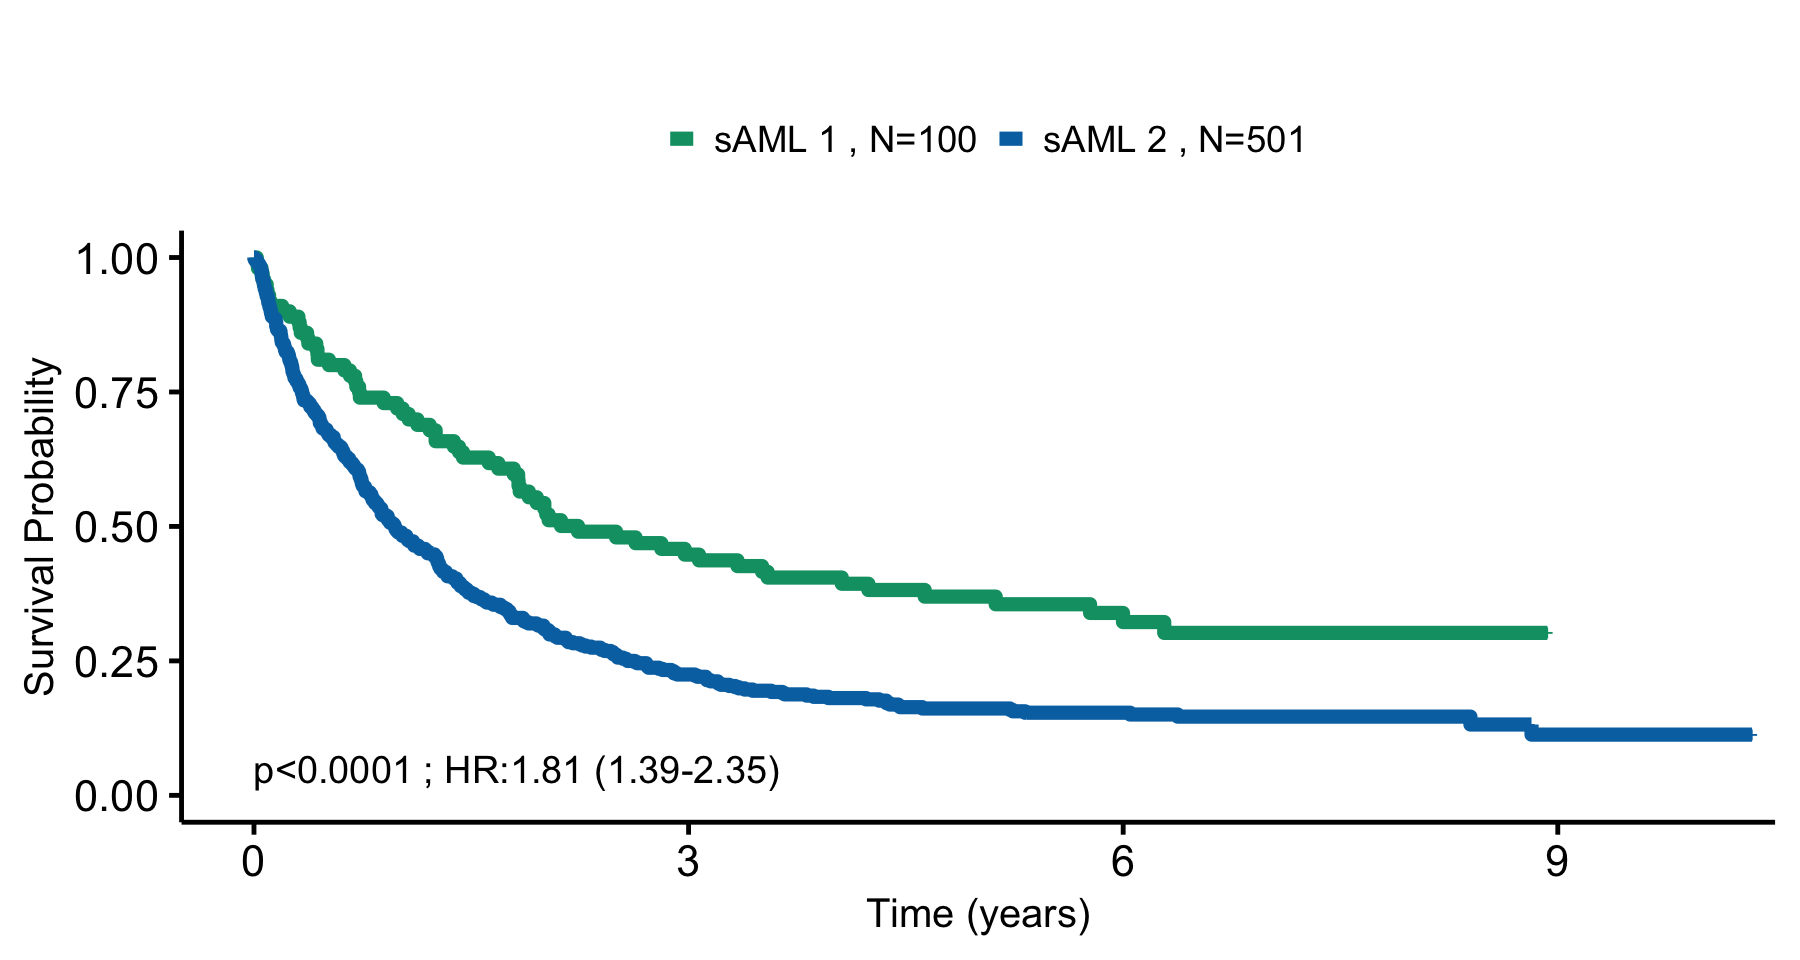

In [9]:
# Prepare sAML Comparison
df_sAML <- df_final
df_sAML$comparison <- ifelse(df_sAML$principal_component_sAML2==1,"sAML 2",ifelse(df_sAML$principal_component_sAML1==1,"sAML 1","Not sAML"))
df_sAML <- df_sAML[df_sAML$comparison!="Not sAML",]

# Surv
surv_object <- Surv(time = df_sAML$os, event = df_sAML$os_status)
fit <- survfit(surv_object ~ comparison, data = df_sAML)

# Get pvalue and HR-CI
res <- get_pvalue_and_HR(formula=Surv(os,os_status)~comparison,data = df_sAML)

# Surv
surv <- plot_surv_curves(fit,legend="top",font.legend=22,
                 submain="",risk.tab=T,y="Survival Probability",vals = c(color_values$sAML1,color_values$sAML2),
                 xlim=c(0,10),break.x.by=3,pval=res)

# Surv Plot               
surv_plot <- surv$plot

set_notebook_plot_size(15,8)
surv_plot

## ***Panel E.***

# **Figure 2.**

## ***Panel A.***

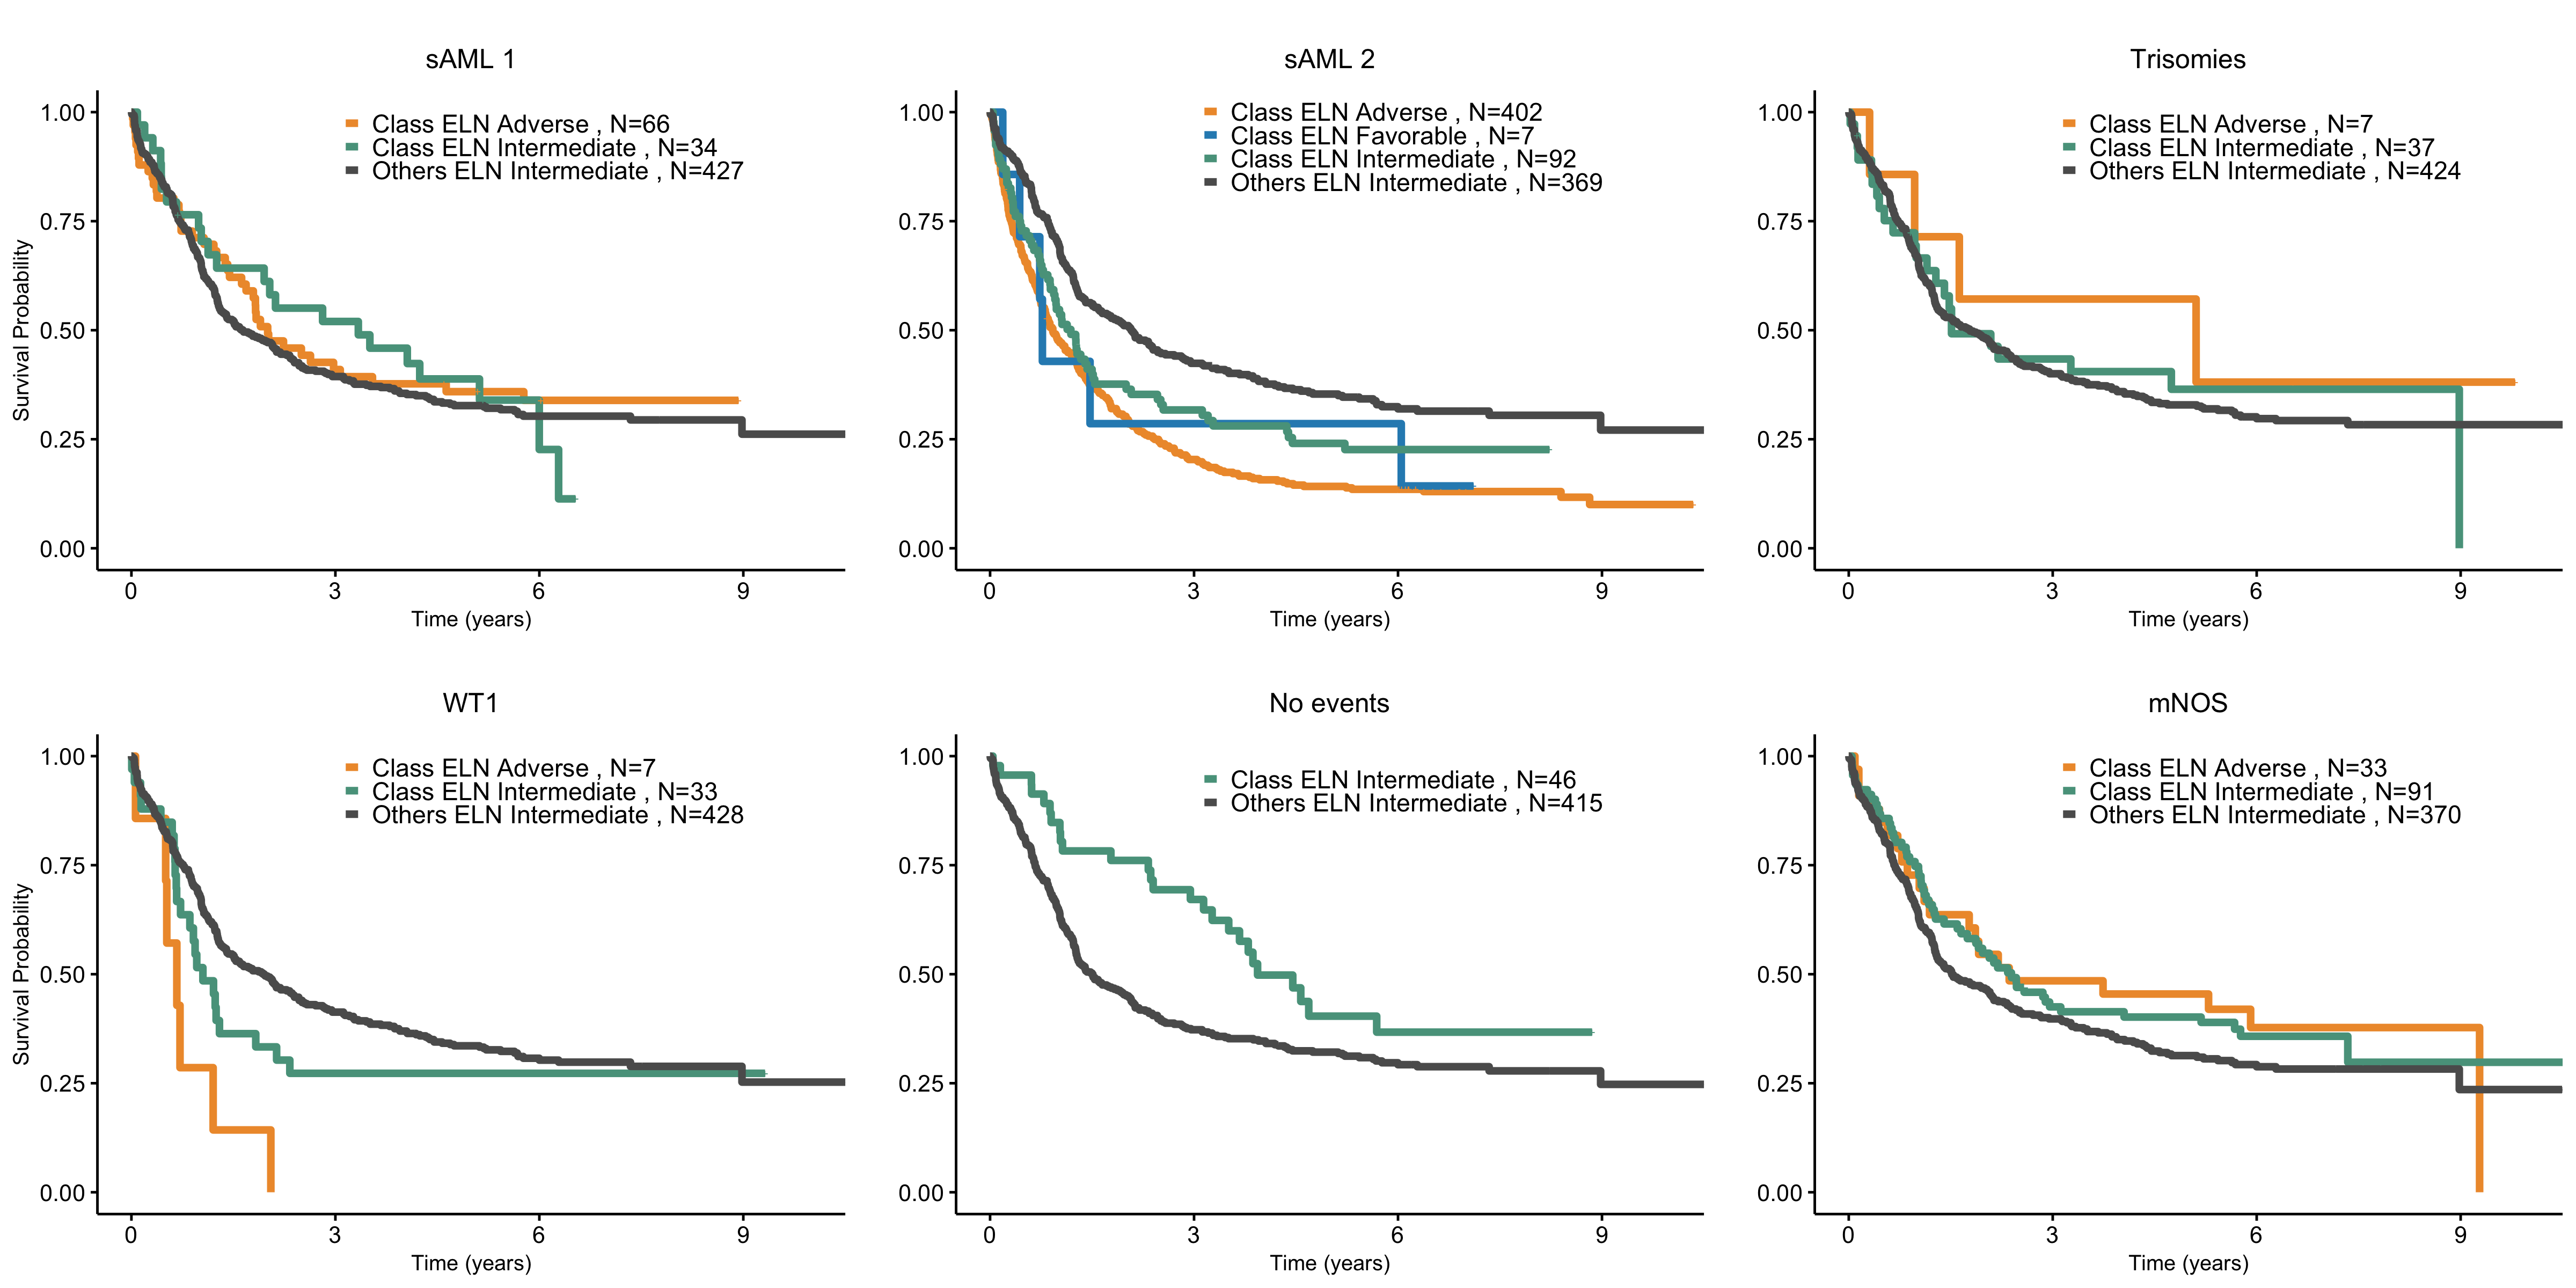

In [10]:
# Prepare colors
color_values["Class ELN Favorable"] <- "#2b8cbe"
color_values["Class ELN Intermediate"] <- "#59A08B"
color_values["Class ELN Adverse"] <- "#EE9937"
color_values["Others ELN Intermediate"] <- "#5C5C5C"

# Select classes to plot
selected_classes <- c("principal_component_sAML1","principal_component_sAML2","principal_component_Trisomies","principal_component_WT1",
             "principal_component_no_events","principal_component_mNOS")

plot_classes <- list()

for (class in selected_classes){
    title <- ifelse(class=="principal_component_WT1","WT1",
                    ifelse(class=="principal_component_DNMT3A_IDH1_2","DNMT3A-IDH",
                           ifelse(class=="principal_component_sAML1","sAML 1",
                                  ifelse(class=="principal_component_sAML2","sAML 2",
                                      ifelse(class=="principal_component_no_events","No events",
                                             ifelse(class=="principal_component_Trisomies","Trisomies","mNOS"))))))
    
    # Class data
    df_class <-  df_final[df_final[,class]==1 | df_final$eln_2017_intermediate==1,]
    df_class$comparison <- ifelse(df_class$eln_2017_favorable==1 & df_class[,class]==1,"Class ELN Favorable",
                             ifelse(df_class$eln_2017_intermediate==1 & df_class[,class]==1,"Class ELN Intermediate",
                                    ifelse(df_class$eln_2017_adverse==1 & df_class[,class]==1,"Class ELN Adverse","Others ELN Intermediate")))
    colors_class <- unlist(unname(color_values[unique(df_class$comparison)[order(unique(df_class$comparison))]]))

    # Surv
    surv_object <- Surv(time = df_class$os, event = df_class$os_status)
    fit <- survfit(surv_object ~ comparison, data = df_class)
    surv_class <- plot_surv_curves(fit,submain="",legend=c(0.598,0.92),y=ifelse(title %in% c("sAML 1","WT1"),"Survival Probability",""),
                              vals=colors_class,pval="",xlim=c(0,10),break.x.by=3,risk.tab=T)
    
    # Surv Plot
    plot_classes[[class]] <- surv_class$plot+
                             theme(plot.title = element_text(hjust = 0.5,size=30,vjust=-5))+
                             ggtitle(title)

}

set_notebook_plot_size(40,20)
do.call("grid.arrange",c(plot_classes,ncol=3))

## ***Panel B.***

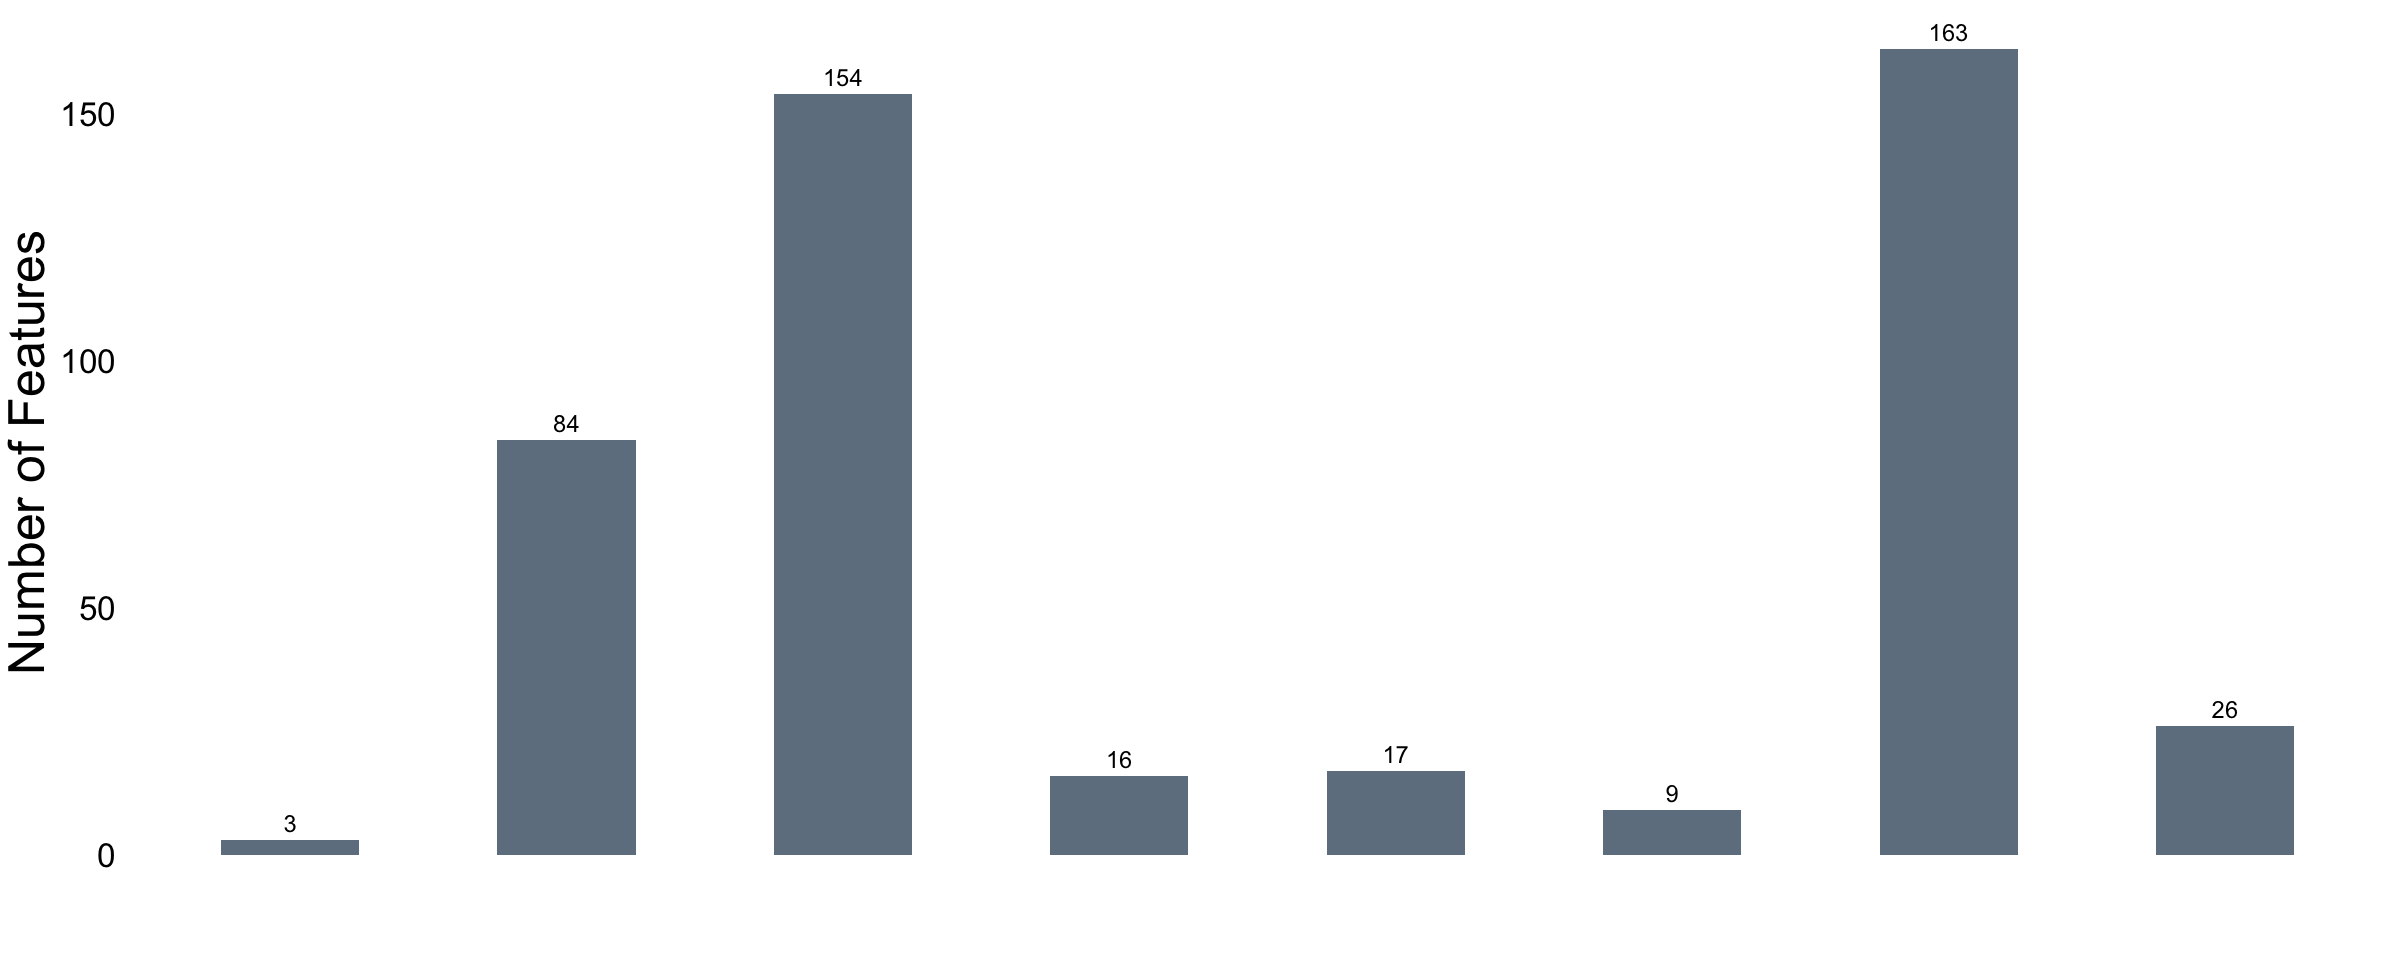

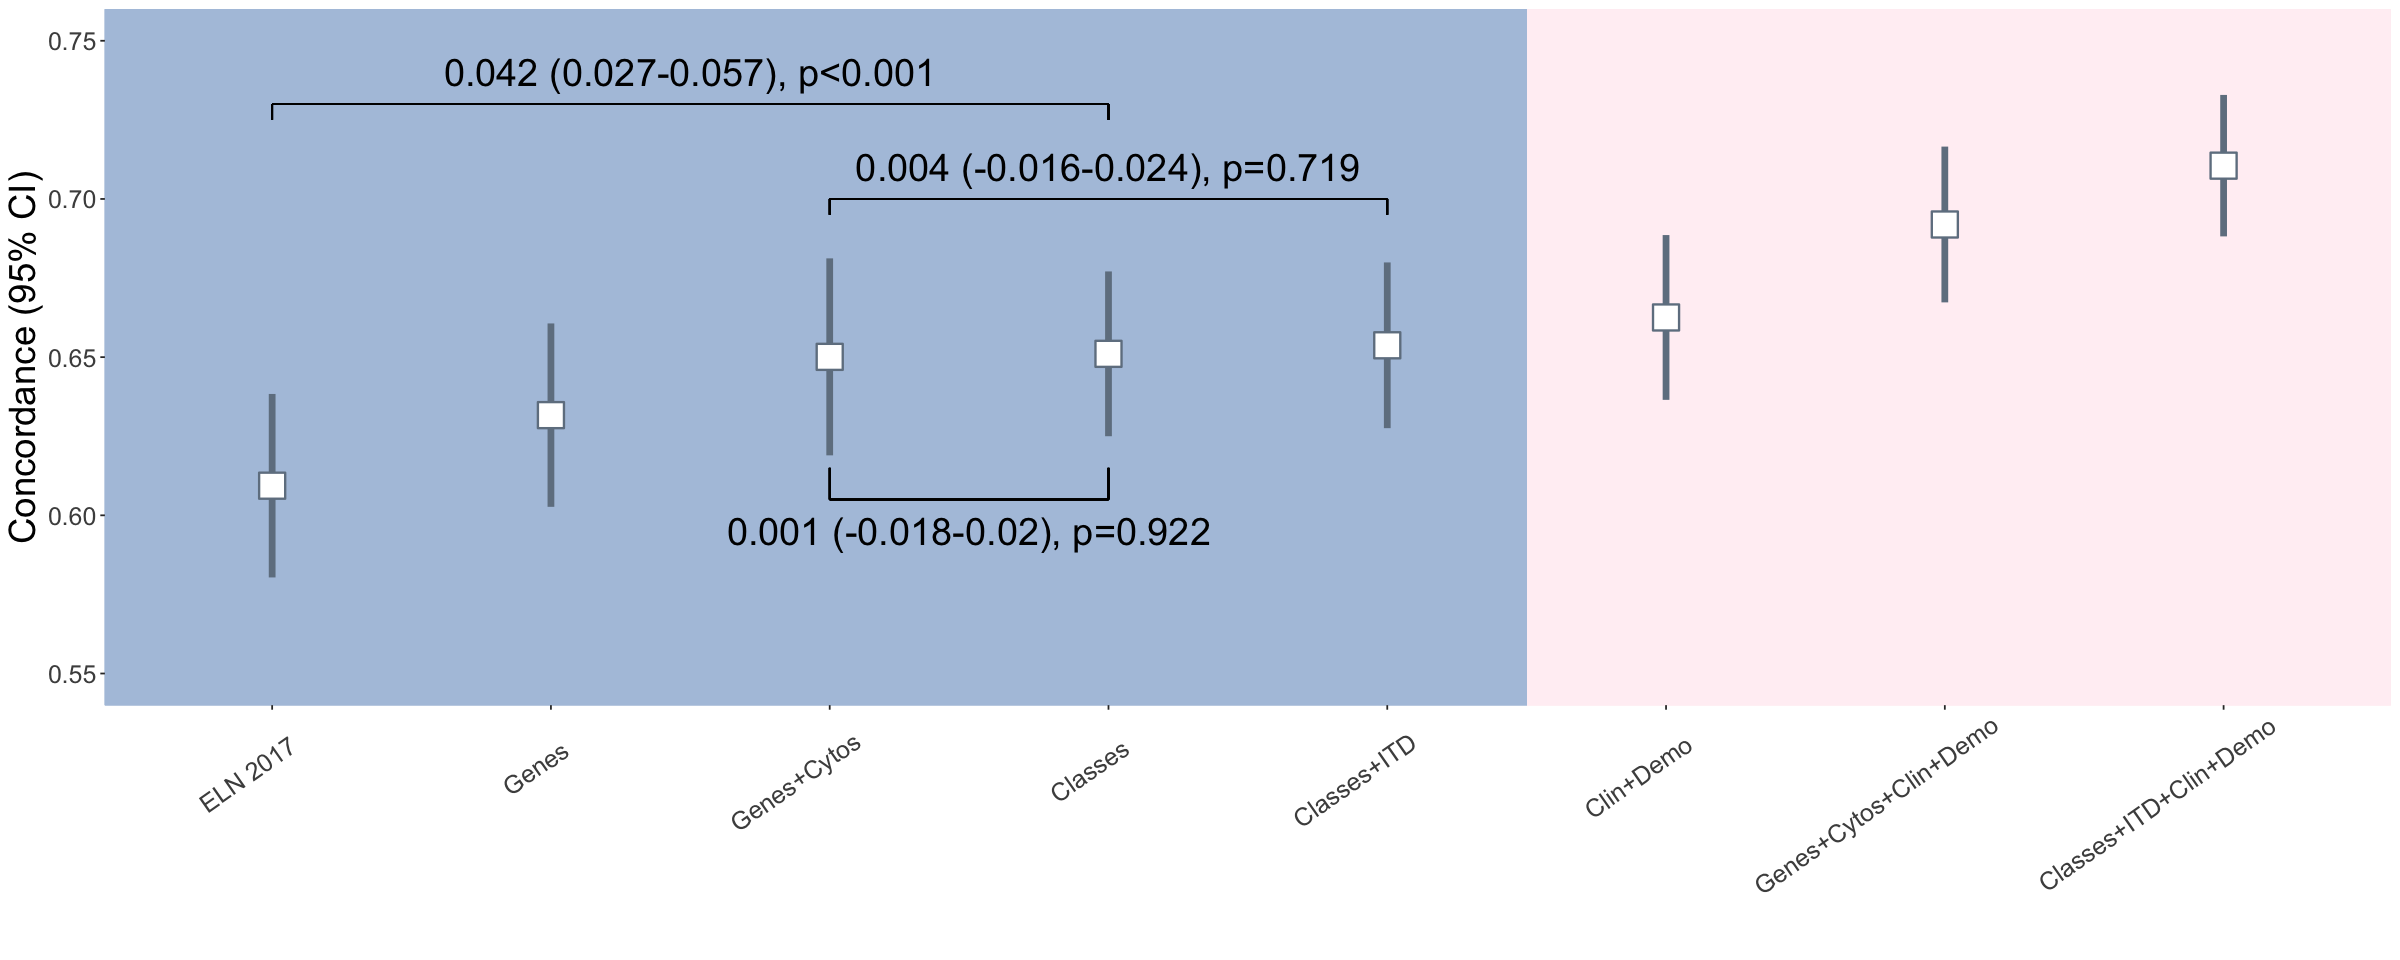

In [11]:
################### Part 1: Number of features

df_features <- data.frame(matrix(ncol = 2, nrow = 8))
colnames(df_features) <- c("Feature Type","Count")
df_features[,"Feature_Type"] <- c("ELN 2017","Genes","Genes+Cytos","Classes","Classes-ITD","Clin+Demo","Genes+Cytos+Clin+Demo","Components-ITD+Clin+Demo")
df_features[,"Feature_Type"] <- factor(df_features[,"Feature_Type"],levels=df_features[,"Feature_Type"])
df_features$Count <- c(length(eln),length(genes),length(c(genes,cytos)),length(princ_comps),length(c(princ_comps,"ITD")),length(c(clin,demo)),
                       length(c(genes,cytos,clin,demo)),length(c(princ_comps,"ITD",clin,demo)))
num_features_plot <- ggplot(df_features,aes(x=Feature_Type,y=Count))+
                     geom_bar(stat="identity",fill="#708090",width=0.5)+theme_bw()+
                     theme(panel.border = element_rect(colour = "white", fill=NA, size=2),
                           panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                           panel.background = element_blank(),
                           legend.position= "none",
                           plot.title = element_text(hjust = 0.5,size=25),
                           axis.text=element_blank(),axis.ticks=element_blank(),axis.text.y=element_text(size=20),
                           axis.title=element_text(size=30))+
                     ylab("Number of Features")+
                     xlab("")+
                     geom_text(aes(label=Count), vjust=-0.5,size=5) 

# pdf("figures/Main_Figures/Figure 2/PanelB-Prognosis_features_barplot.pdf",width=20,height=7.5)
# p
# dev.off()



################### Part 2: Prognosis Comparison

df_results <- read.table("data/bootstrap_results_NCRI_Cohort.tsv")

NF <- round(0.25*nrow(df_final))
meanbs <- apply(df_results, 2, mean)
SEbs <- apply(df_results, 2, sd)
lowerbs <- meanbs-1.96*SEbs
upperbs <- meanbs+1.96*SEbs


# Pvalues : 
# 1. Class vs ELN
Delta1 <- df_results[,which(colnames(df_results) =="comp")]  - df_results[,which(colnames(df_results) =="eln")]
t1 <- abs(mean(Delta1) - 0)/sd(Delta1)
PvalueDelta1 <- round(2*pt(t1, NF-1,  lower.tail = FALSE),3)
if(PvalueDelta1 == 0){
    PvalueDelta1 <- "p<0.001"
}else{
    PvalueDelta1 <- paste0("p=",PvalueDelta1)
}
nam_comp_eln <- paste( round(mean(Delta1),3), " (",round(mean(Delta1) - 1.96*sd(Delta1), 3) ,"-",round(mean(Delta1) + 1.96*sd(Delta1), 3) , "), ",PvalueDelta1, sep="")

# 2. Class vs Genes+Cytos
Delta2  <- df_results[,which(colnames(df_results) =="comp")]  - df_results[,which(colnames(df_results) =="all_gen_cyto")]
t2 <- abs(mean(Delta2) - 0)/sd(Delta2)
PvalueDelta2 <- round(2*pt(t2, NF-1,  lower.tail = FALSE),3)
if(PvalueDelta2 == 0){
    PvalueDelta2 <- "p<0.001"
}else{
    PvalueDelta2 <- paste0("p=",PvalueDelta2)
}
nam_comp_all_gen_cyto <- paste( round(mean(Delta2),3), " (",round(mean(Delta2) - 1.96*sd(Delta2), 3) ,"-",round(mean(Delta2) + 1.96*sd(Delta2), 3) , "), ",PvalueDelta2, sep="")

#3. Class+ITD vs Genes+Cytos
Delta3  <- df_results[,which(colnames(df_results) =="comp_ITD")]  - df_results[,which(colnames(df_results) =="all_gen_cyto")]
t3 <- abs(mean(Delta3) - 0)/sd(Delta3)
PvalueDelta3 <- round(2*pt(t3, NF-1,  lower.tail = FALSE),3)
if(PvalueDelta3 == 0){
    PvalueDelta3 <- "p<0.001"
}else{
    PvalueDelta3 <- paste0("p=",PvalueDelta3)
}
nam_comp_ITD_all_gen_cyto <- paste( round(mean(Delta3),3), " (",round(mean(Delta3) - 1.96*sd(Delta3), 3) ,"-",round(mean(Delta3) + 1.96*sd(Delta3), 3) , "), ",PvalueDelta3, sep="")

# Comparison data
df_comparison <- data.frame(model=c(rep("ELN 2017",1),rep("Genes",1),rep("Classes",1),rep("Classes+ITD",1),rep("Genes+Cytos",1),rep("Clin+Demo",1),rep("Genes+Cytos+Clin+Demo",1),rep("Classes+ITD+Clin+Demo",1)))
df_comparison$model <- factor(df_comparison$model,levels=df_comparison$model)
df_comparison$mean <- meanbs
df_comparison$upper <- upperbs
df_comparison$lower <- lowerbs
df_comparison$title <- "Feature combinations"

# Plot
p <- ggplot(df_comparison,aes(x=reorder(model,mean), y=mean, ymin=upper, ymax=lower))  + 
    geom_rect(fill = 'lightsteelblue', xmin = 0, xmax = 5.5, ymin =0, ymax = Inf, alpha =1) + 
    geom_rect(fill = 'lavenderblush', xmin = 5.5, xmax = Inf, ymin =0, ymax = Inf, alpha =1) +
    geom_pointrange(data=df_comparison, mapping=aes(x=model, y=mean, ymin=upper, ymax=lower), size=1.9, color="#708090", fill="white", shape=22)  +
    scale_fill_manual(values=c("#708090"))+
    theme(strip.text = element_text(size=25),axis.text.x = element_text(angle = 35,
          hjust = 0.8,vjust=0.8,size=15),axis.text.y = element_text(size = 15),
          axis.title.x=element_text(size=30),axis.title.y=element_text(size=22),legend.title=element_text(size=30),
          legend.text=element_text(size=20))+
    xlab("")+
    ylab("Concordance (95% CI)")+
    ylim(c(0.55,0.75)) 

# Add comparison labels to the plot
p_labels <- p +
            annotate("text",label=c(nam_comp_eln,nam_comp_all_gen_cyto,nam_comp_ITD_all_gen_cyto),x=c(2.5,3.5,4),y=c(0.74,0.595,0.71),size=8)+
            geom_segment(aes(x = 1, y = 0.73, xend = 4, yend = 0.73))+
            geom_segment(aes(x = 1, y = 0.725, xend = 1, yend = 0.73))+
            geom_segment(aes(x = 4, y = 0.725, xend = 4, yend = 0.73))+

            geom_segment(aes(x = 3, y = 0.605, xend = 4, yend = 0.605))+
            geom_segment(aes(x = 3, y = 0.615, xend = 3, yend = 0.605))+
            geom_segment(aes(x = 4, y = 0.615, xend = 4, yend = 0.605))+

            geom_segment(aes(x = 3, y = 0.7, xend = 5, yend = 0.7))+
            geom_segment(aes(x = 3, y = 0.695, xend = 3, yend = 0.7))+
            geom_segment(aes(x = 5, y = 0.695, xend = 5, yend = 0.7))

set_notebook_plot_size(20,8)
num_features_plot
p_labels

## ***Panel C.***

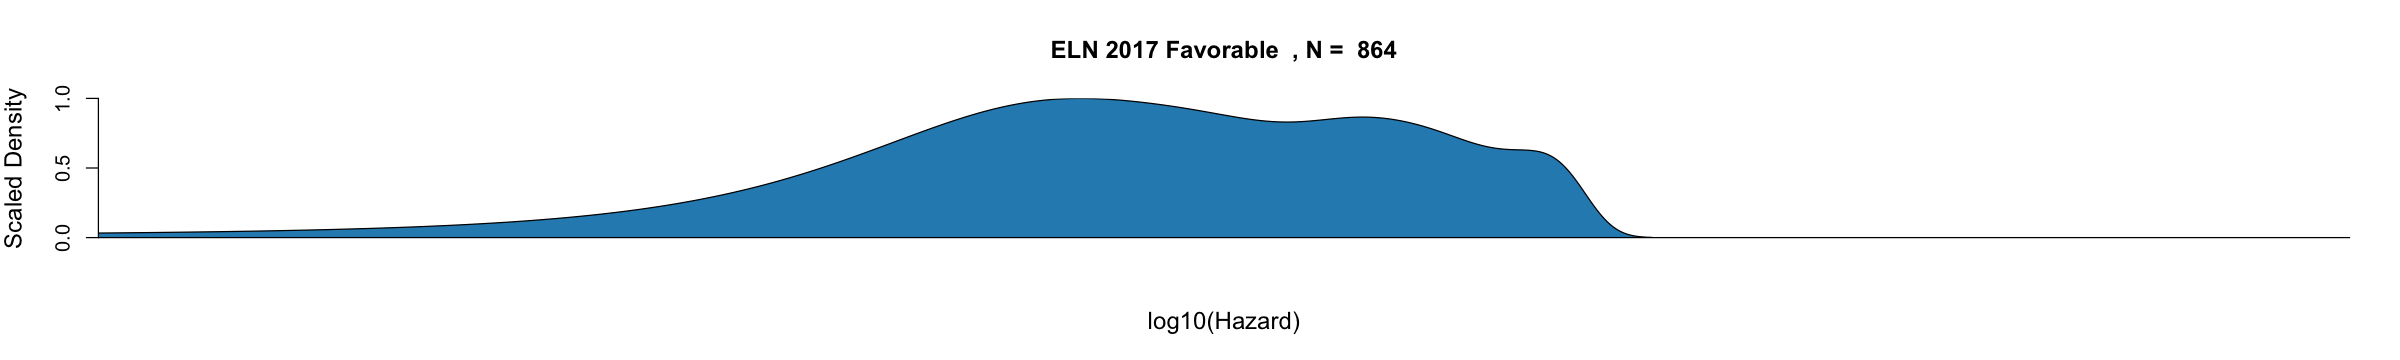

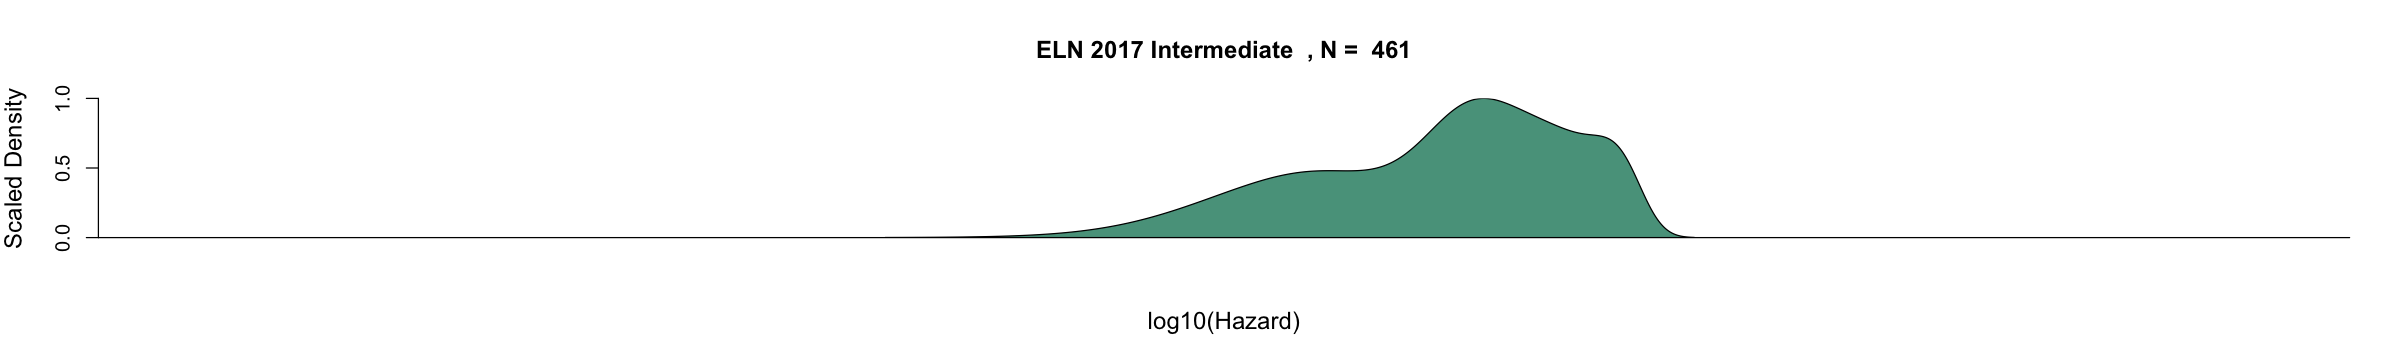

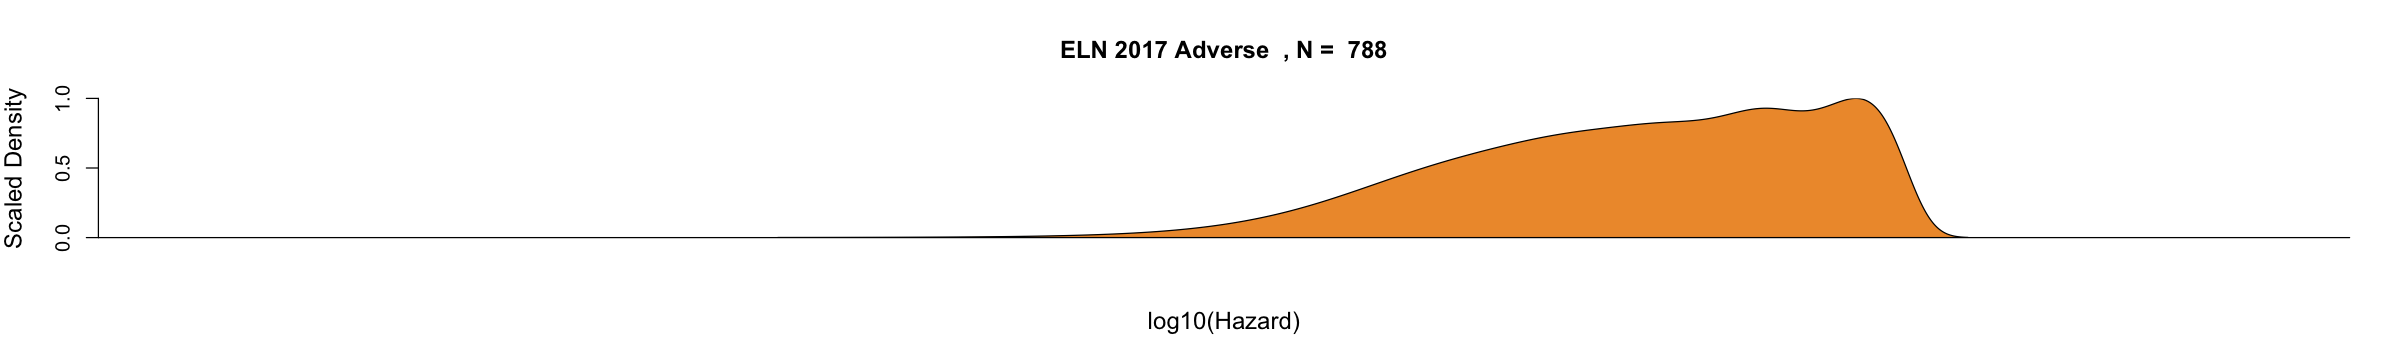

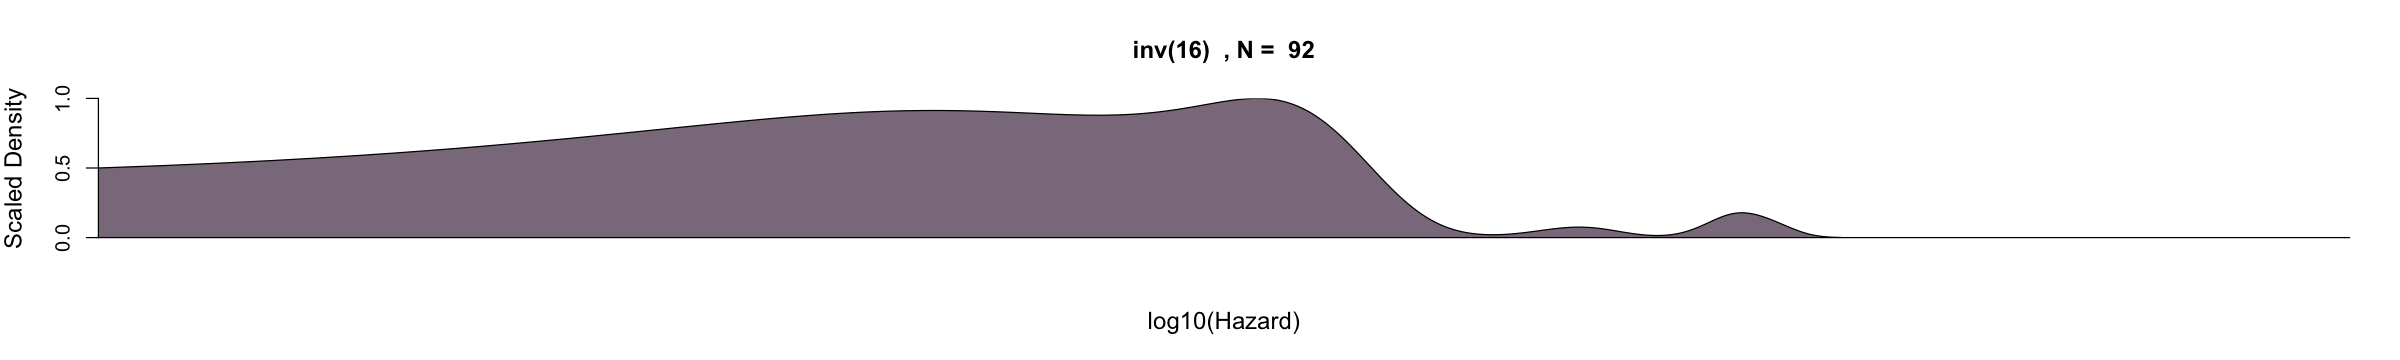

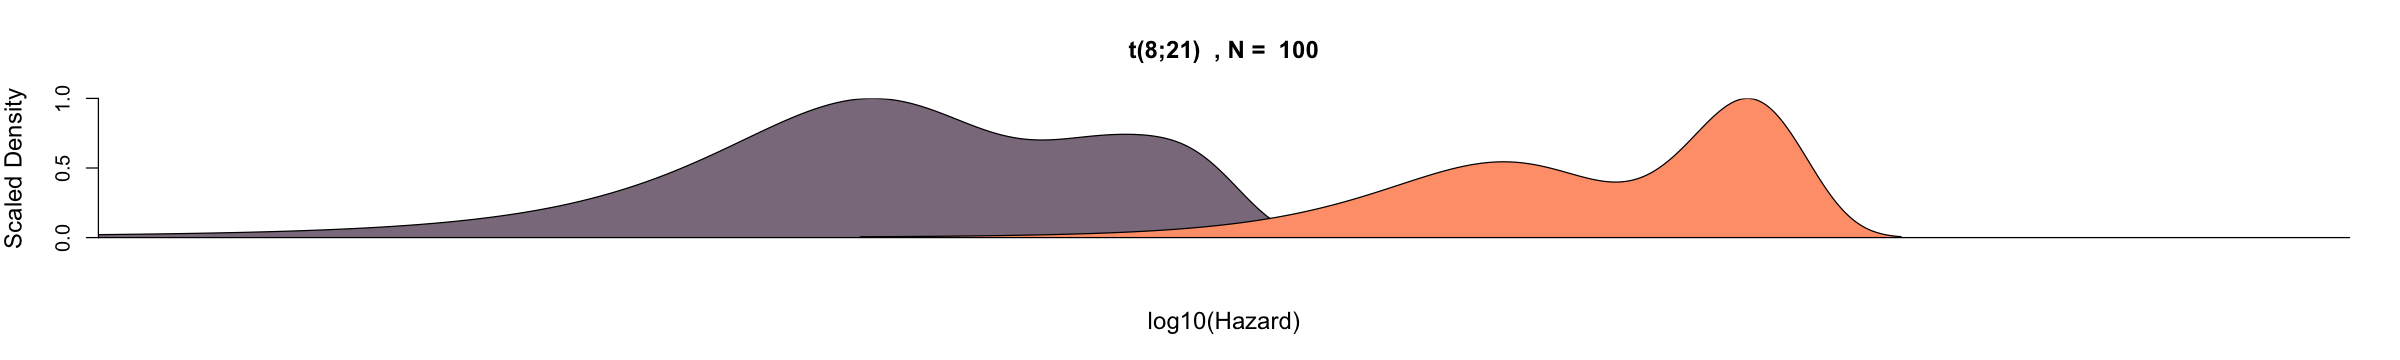

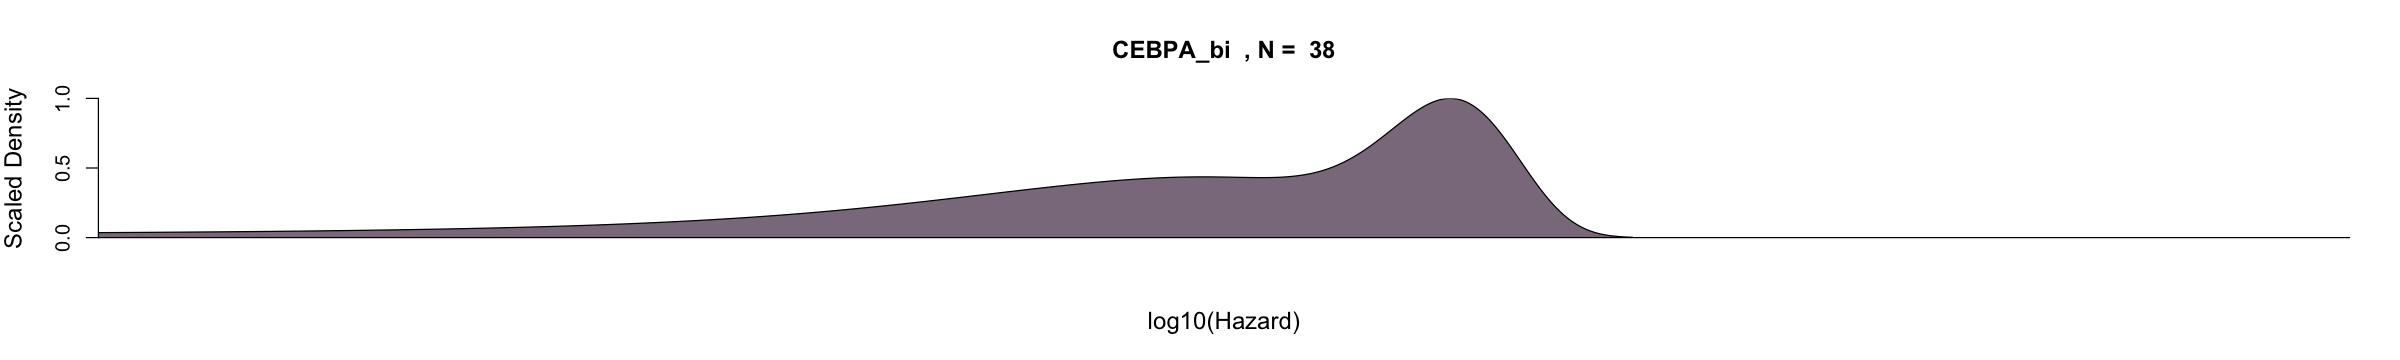

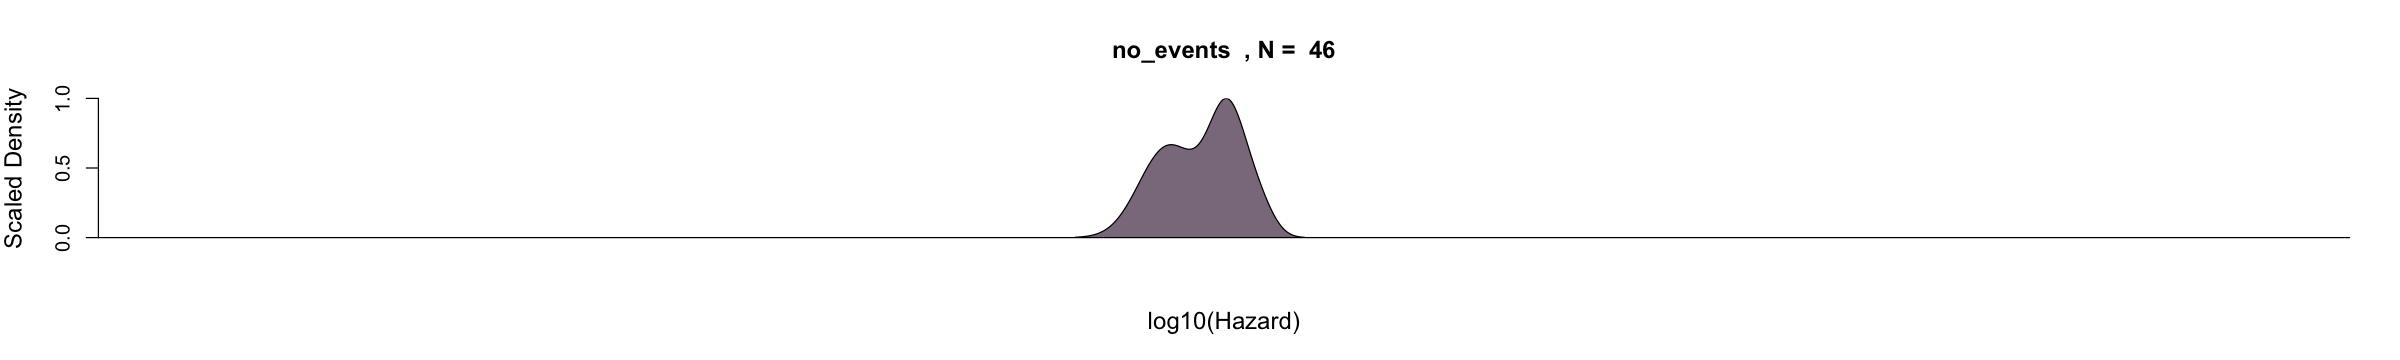

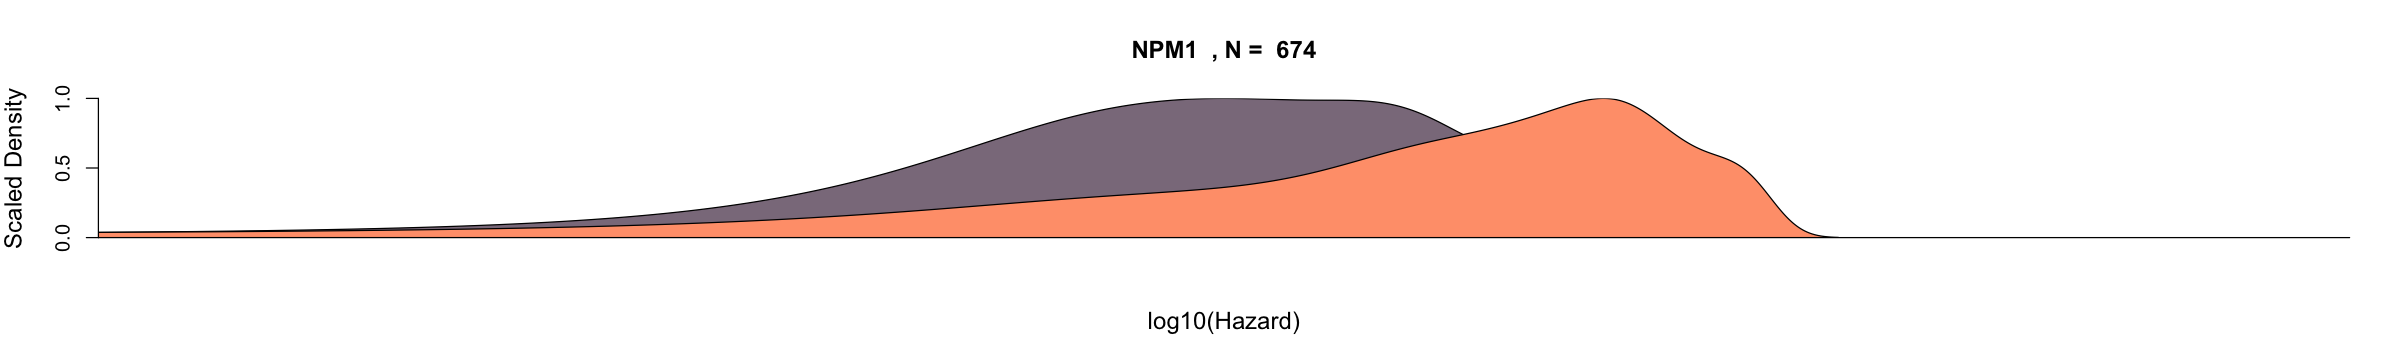

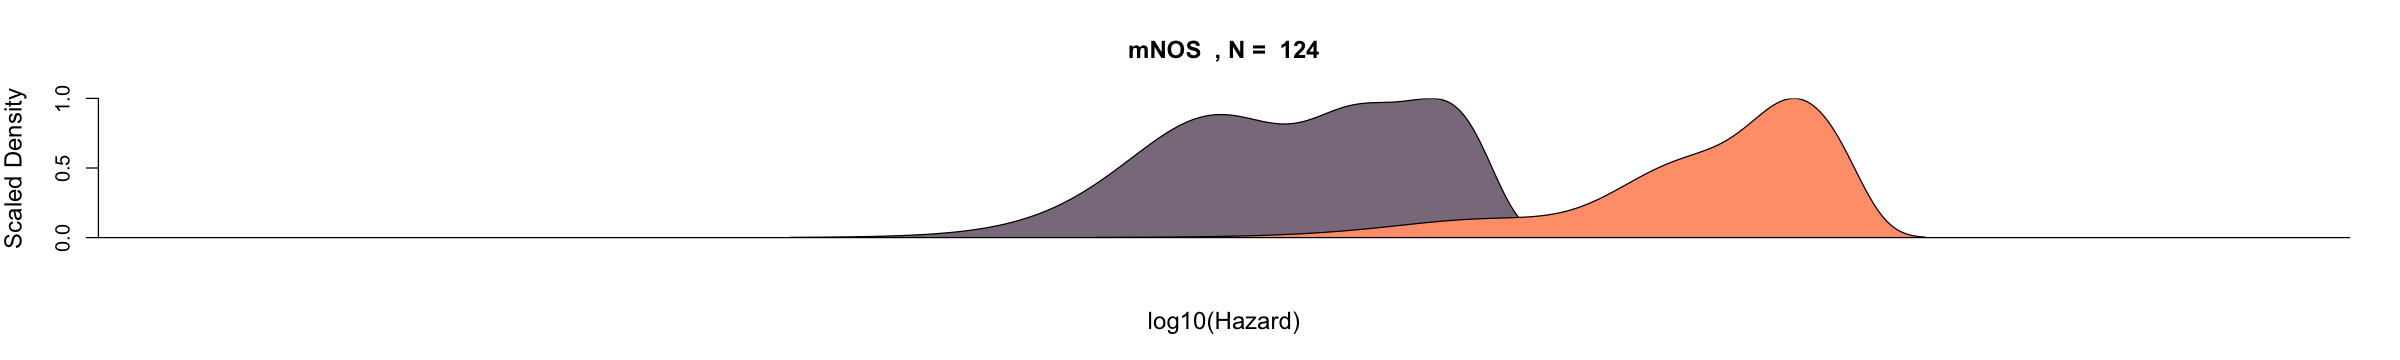

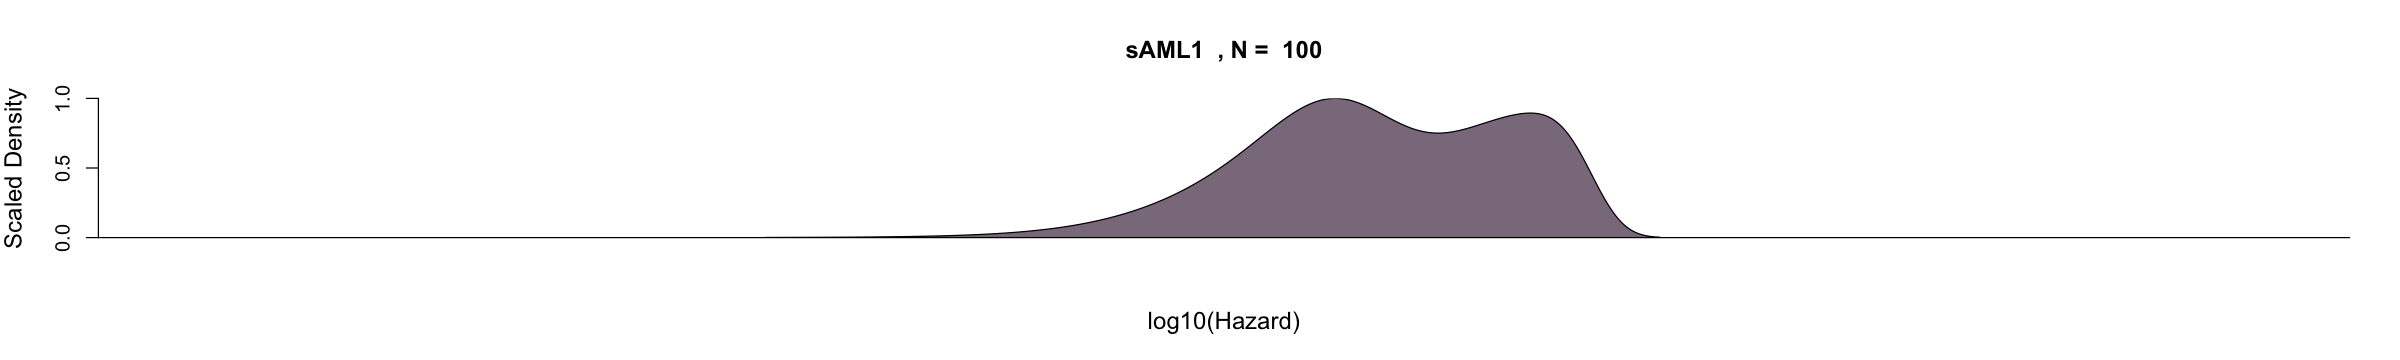

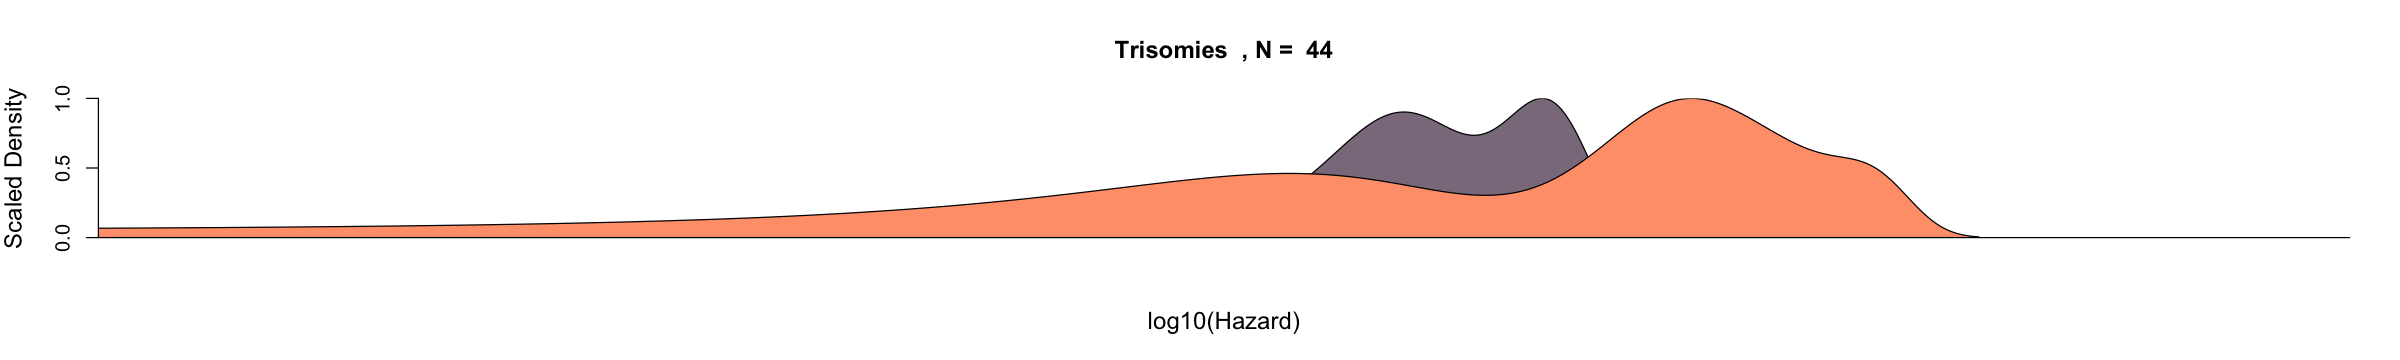

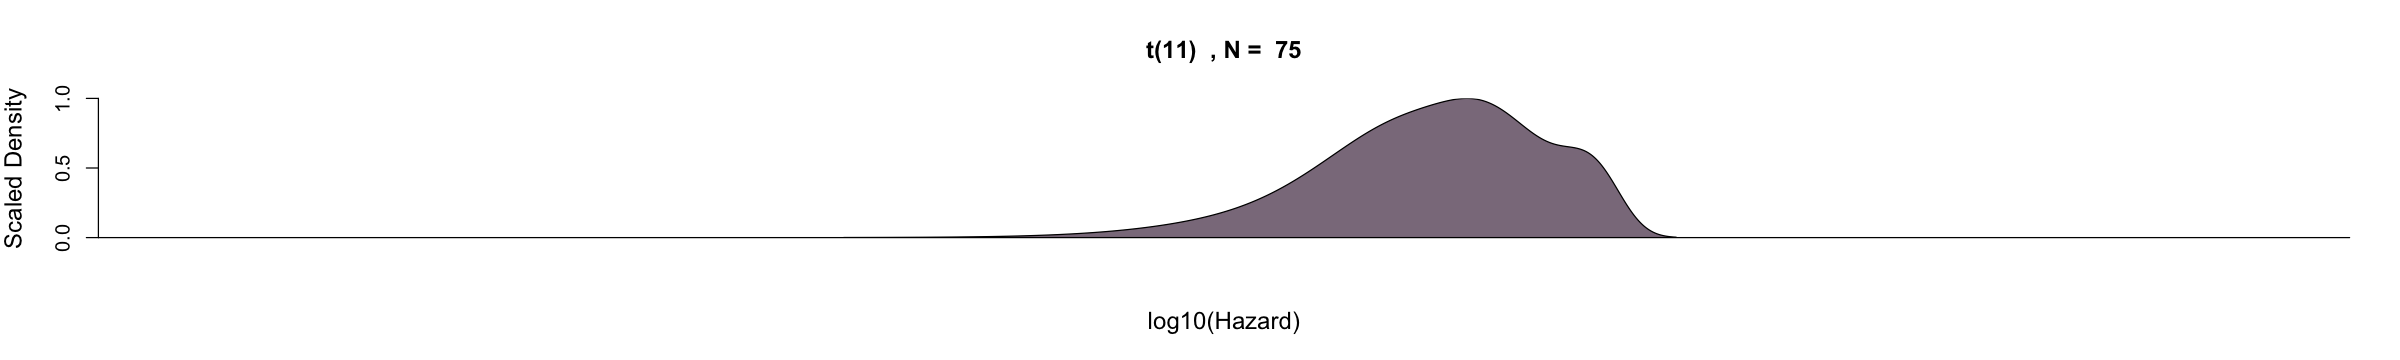

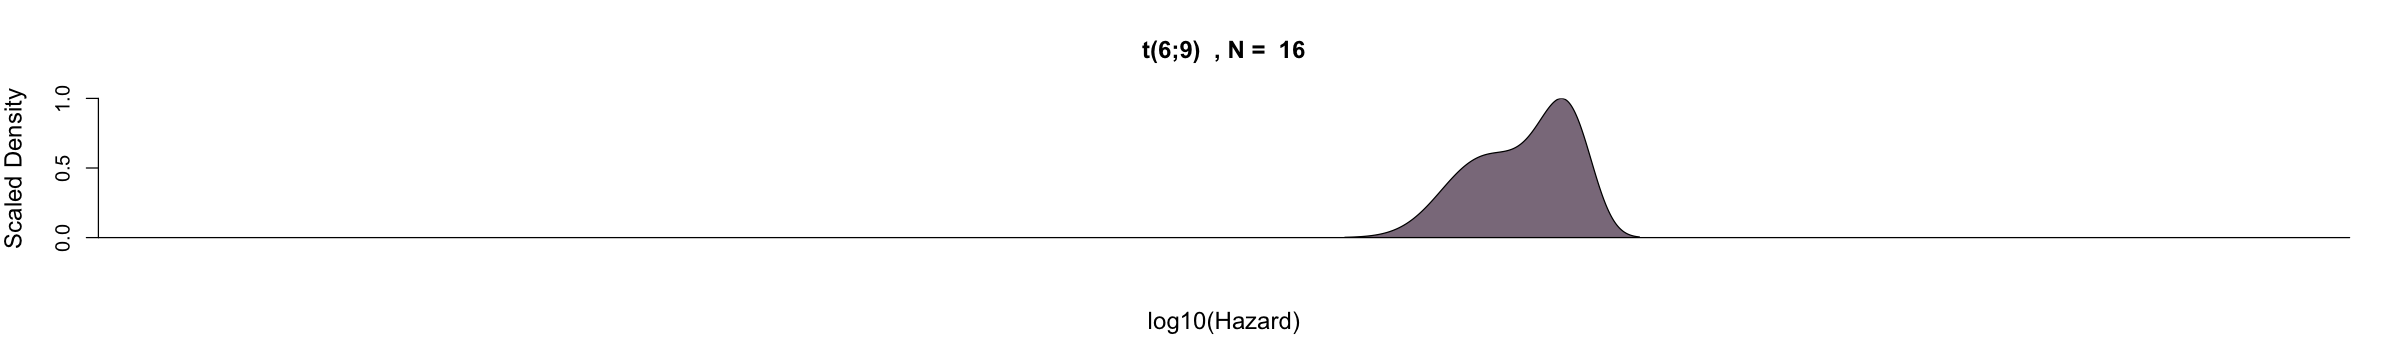

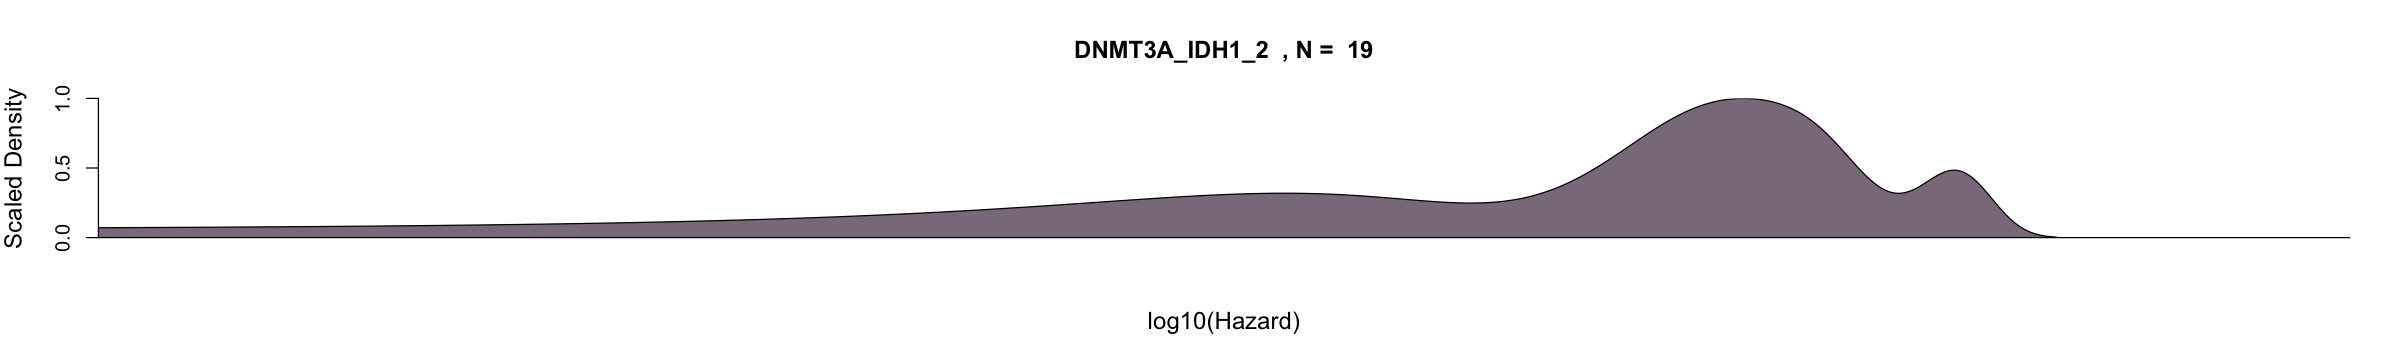

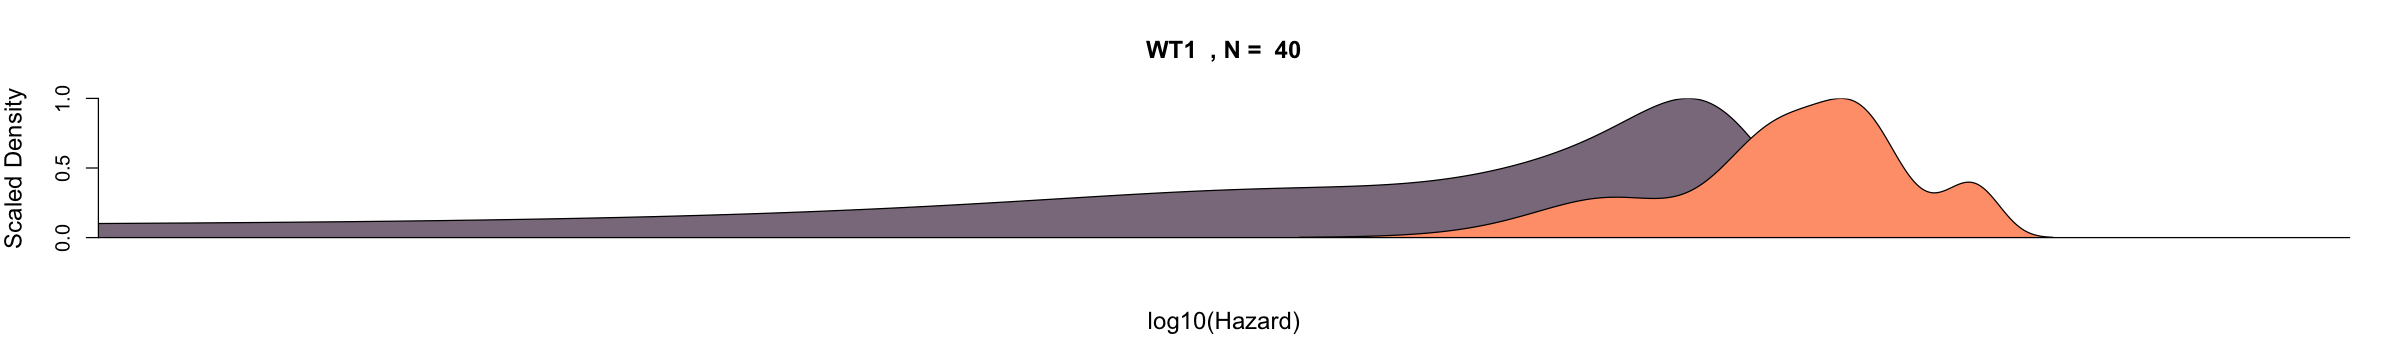

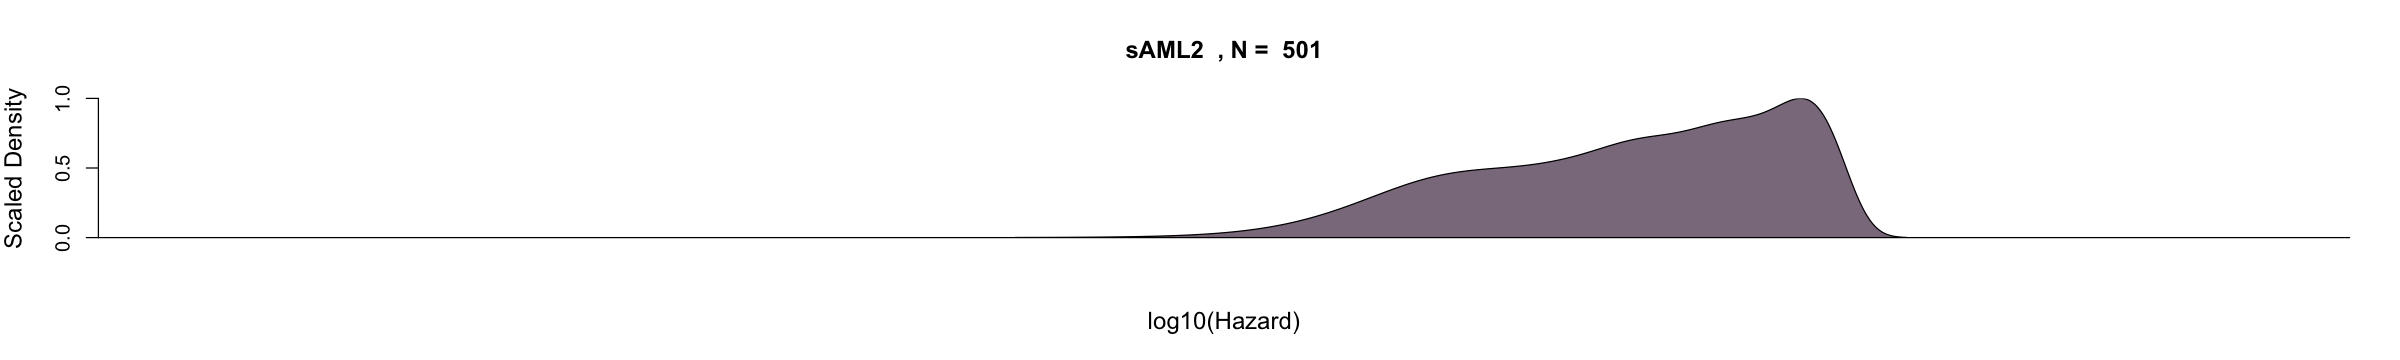

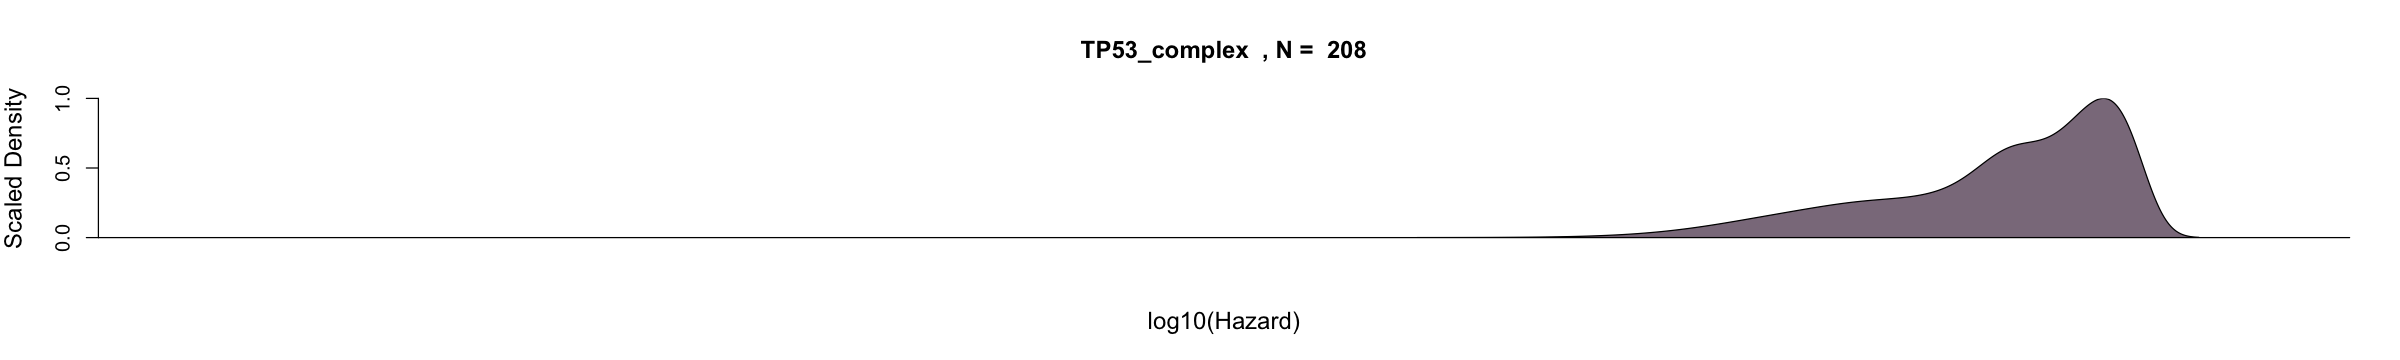

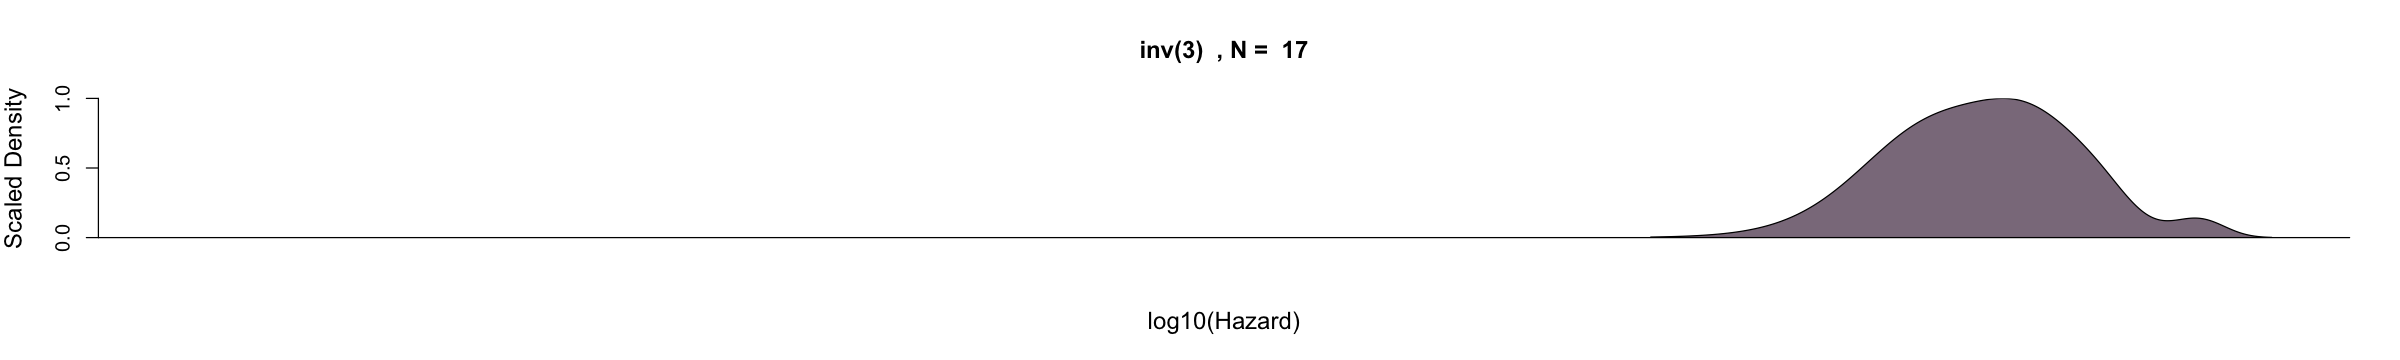

In [12]:
stratas_order <- c('eln_2017_favorable','eln_2017_intermediate','eln_2017_adverse',
                   'principal_component_inv_16','principal_component_t_8_21','principal_component_CEBPA_bi',
                   'principal_component_no_events','principal_component_NPM1','principal_component_mNOS',
                   'principal_component_sAML1','principal_component_Trisomies','principal_component_t_11',
                   'principal_component_t_6_9','principal_component_DNMT3A_IDH1_2','principal_component_WT1',
                   'principal_component_sAML2','principal_component_TP53_complex','principal_component_inv_3')

data_training <- df_final_bis
set_notebook_plot_size(20,3)
for(strata in stratas_order){

        # Colors
        col <- ifelse(strata=="eln_2017_favorable","#2b8cbe",
                     ifelse(strata=="eln_2017_intermediate","#59A08B",
                           ifelse(strata=="eln_2017_adverse","#EE9937","#8B7B8B")))

        # Start Plot
        plot(c(0,0), c(0,0), typ="n", ylab="Scaled Density",
             bty="n", xaxt="n",cex.axis=5, 
             yaxt="n", yaxs="i", xaxs="i",
             xlim=c(-2,0.5),
             ylim=c(0,1),
             xlab="log10(Hazard)",
             cex.lab=1.2)        
        
        if (is.element(strata,c("principal_component_t_8_21","principal_component_NPM1","principal_component_WT1","principal_component_mNOS",
                       "principal_component_Trisomies"))){

            y0 <- bshazard(Surv(os, os_status)~1, data=data_training[data_training[,strata] ==1 & data_training$ITD==0 ,],nk=14,verbose=F )
            y1 <- bshazard(Surv(os, os_status)~1, data=data_training[data_training[,strata] ==1 & data_training$ITD==1 ,],nk=14,verbose=F )
            densH <-  density(y0$hazard[y0$time <=ifelse(length(y0$hazard[y0$time <=3])>=2,3,10)])
            densH$x <- log(densH$x,10)
            densH_ITD <-  density(y1$hazard[y1$time <=ifelse(length(y0$hazard[y0$time <=3])>=2,3,10)])
            densH_ITD$x <- log(densH_ITD$x,10)  
            polygon(c(densH$x, rev(densH$x)), c(rep(0, length(densH$x)), rev(densH$y)/max(densH$y)),col="#8B7B8B")
            polygon(c(densH_ITD$x, rev(densH_ITD$x)), c(rep(0, length(densH_ITD$x)), rev(densH_ITD$y)/max(densH_ITD$y)),col="#FFA07A")
        
        }else{
            
            y0 <- bshazard(Surv(os, os_status)~1, data=data_training[data_training[,strata] ==1 ,],verbose=F )
            densH <-  density(y0$hazard[y0$time <=3])
            densH$x <- log(densH$x,10)
            polygon(c(densH$x, rev(densH$x)), c(rep(0, length(densH$x)), rev(densH$y)/max(densH$y)),col=col)
        }
        
        axis(1, seq(-2,0.5,0.5),lwd.tick=0, lab=F)
        axis(2, seq(0,1,0.5),cex=3)
        
        main <- gsub("principal_component_", "", strata)
        main <- ifelse(main=="eln_2017_favorable","ELN 2017 Favorable",
                       ifelse(main=="eln_2017_intermediate","ELN 2017 Intermediate",
                              ifelse(main=="eln_2017_adverse","ELN 2017 Adverse",
                                     ifelse(main=="t_15_17","t(15;17)",
                                          ifelse(main=="inv_16","inv(16)",
                                                ifelse(main=="t_8_21","t(8;21)",
                                                      ifelse(main=="t_11","t(11)",
                                                             ifelse(main=="t_6_9","t(6;9)",
                                                                 ifelse(main=="inv_3","inv(3)",main)))))))))
        
        main <- paste(main, " , N = ",nrow(data_training[data_training[,strata] ==1,]))
        title(main,cex=4) 
}

# **Figure 3.**

## ***Panel A.***

## ***Panel B.***

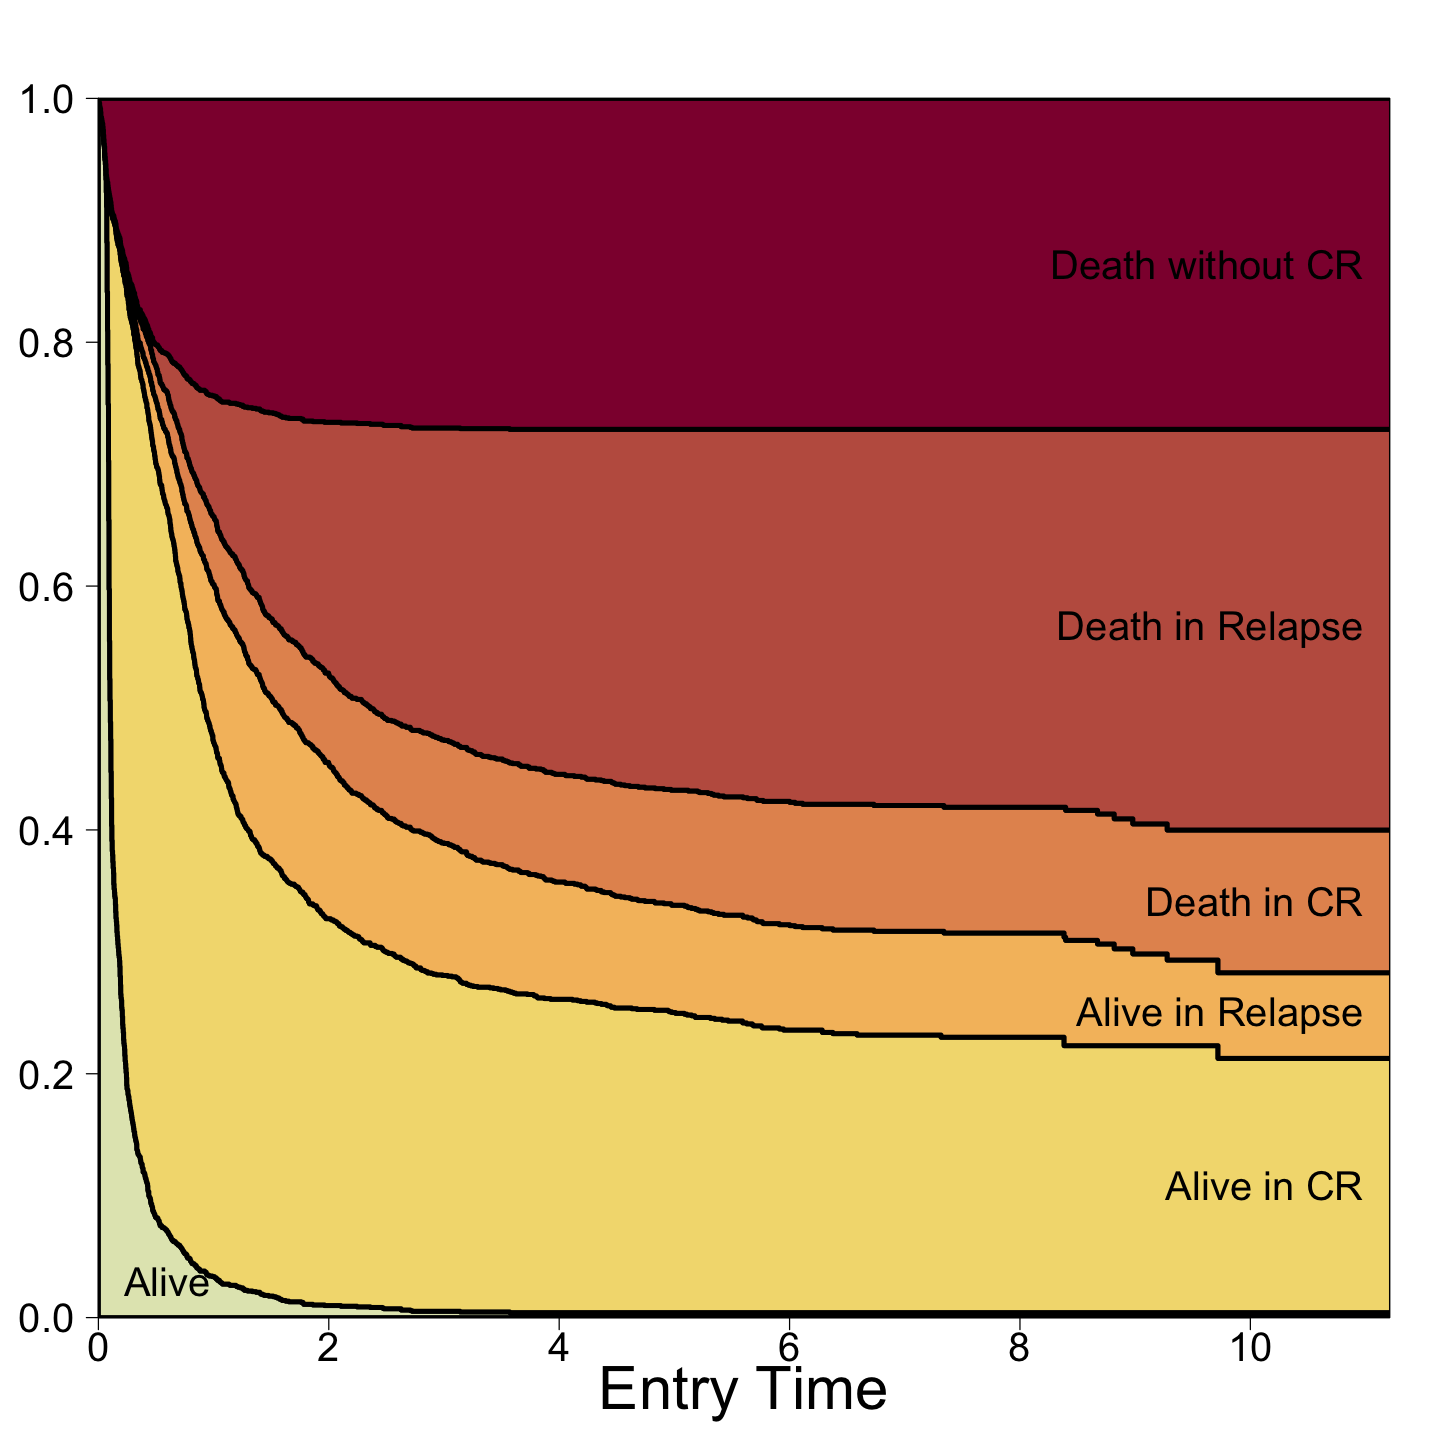

In [13]:
# Colors
statecols <- heat_hcl(6, c = c(80, 30), l = c(30, 90),power = c(1/5, 2))[c(6,5,4,3,2,1)]
ord <- c(1,2,3,4,5,6)     

# Time Point Data 
data <- read.table("data/df_TRAINING_personalization_updated.tsv")[,c("patient_id","CR","Relapse",
                                                         "Death_in_CR","Death_in_Relapse",
                                                         "Death_without","CR_stat","Relapse_stat","Death_in_CR_stat",
                                                         "Death_in_Relapse_stat","Death_without_stat",princ_comps_bis)]

# Transition matrix              
tmat_data <- transMat(x = list(c(2,6), c(3, 4), c(5), c(),c(),c()), names = c("Alive", "Alive in CR", "Alive in Relapse", "Death in CR" ,"Death in Relapse", "Death without CR"))

# Multistate data
msdata <- msprep(data = data, trans = tmat_data, time = c(NA, "CR", "Relapse",
"Death_in_CR","Death_in_Relapse","Death_without"), status = c(NA, "CR_stat", "Relapse_stat", "Death_in_CR_stat","Death_in_Relapse_stat","Death_without_stat"),
                 keep = c("patient_id",princ_comps_bis))

# Transition Probability 
c0_data <- coxph(Surv(Tstart, Tstop, status) ~ strata(trans), data = msdata,method="breslow")
msf0_data <- msfit(object = c0_data,newdata=msdata,trans=tmat_data)
pt0_data <- probtrans(msf0_data, predt = 0, method = "greenwood",direction = "fo")

# Multistate plot
set_notebook_plot_size(12,12)
plot(pt0_data,from=1, ord = ord, xlab = "Entry Time",
     las = 1, type = "filled", col = statecols[ord],lty=2,
     lwd=4,cex.lab=3,cex.axis=2,cex=2,ylab="",
     legend=c("","Alive in CR","Alive in Relapse","Death in CR","Death in Relapse","Death without CR"))
text("Alive",x=0.6,y=0.03,cex=2)

## ***Panel C.***

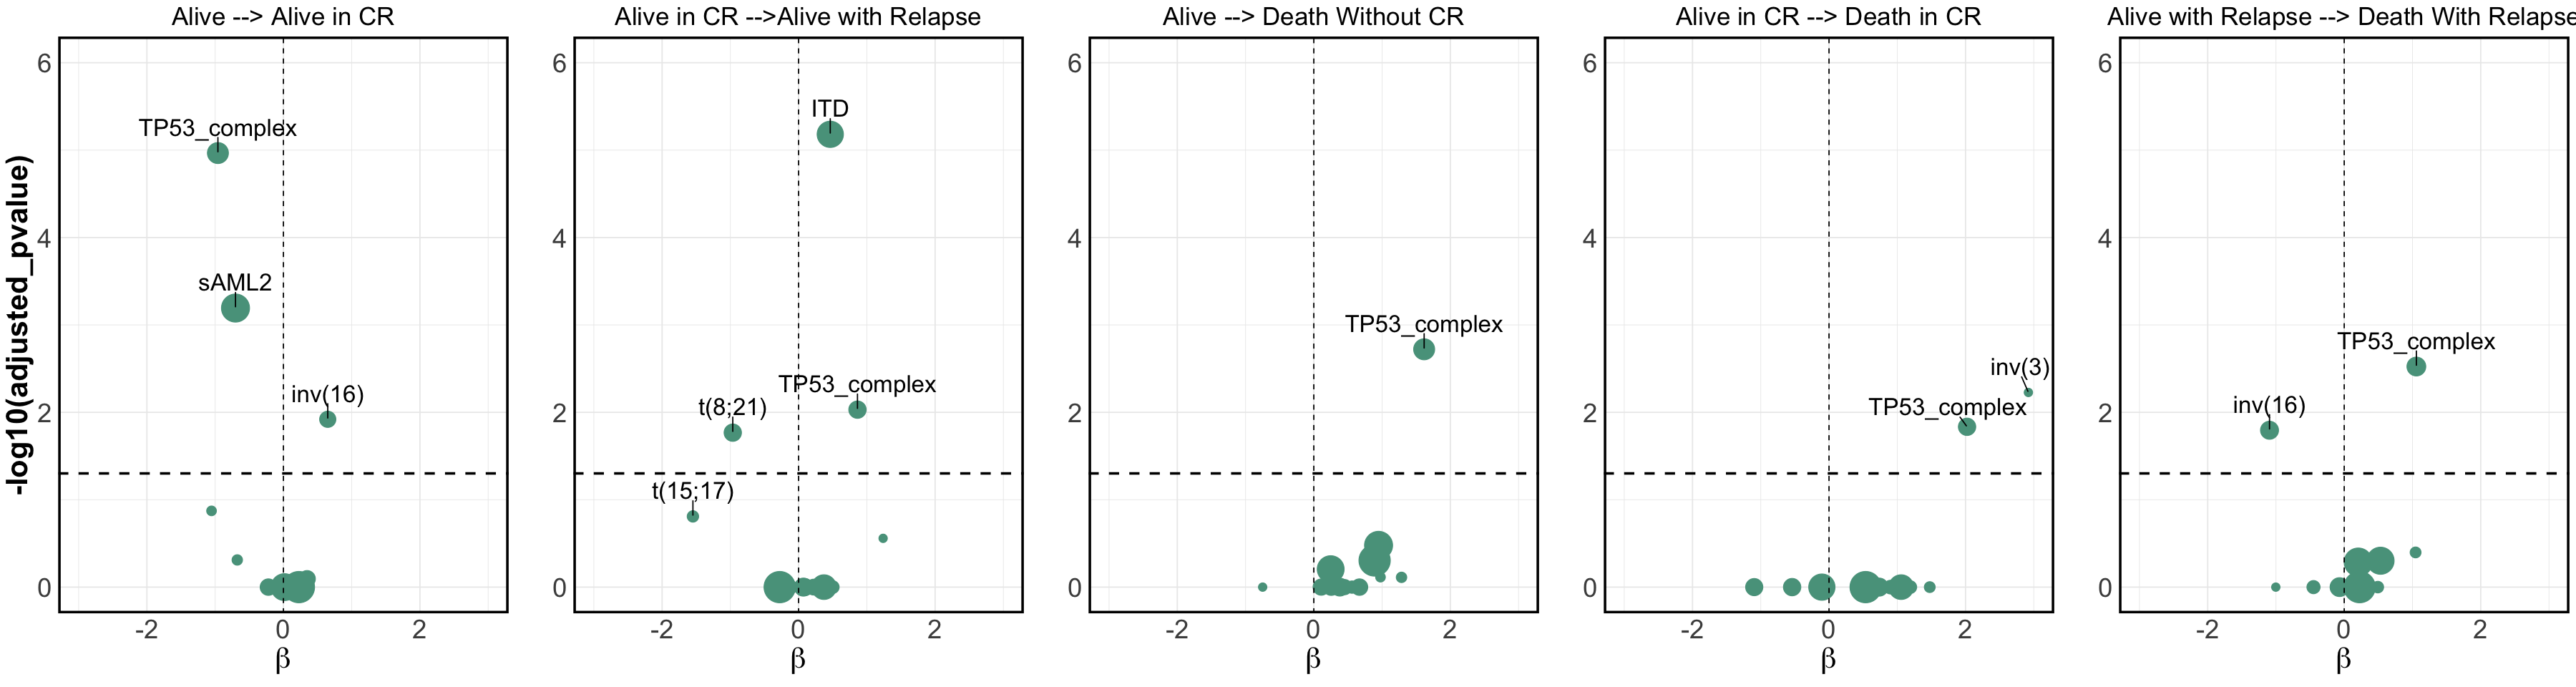

In [14]:
# Prepare data
data <- read.table("data/df_TRAINING_personalization_updated.tsv")[,c("patient_id","CR","Relapse",
                                                         "Death_in_CR","Death_in_Relapse",
                                                         "Death_without","CR_stat","Relapse_stat","Death_in_CR_stat",
                                                         "Death_in_Relapse_stat","Death_without_stat",princ_comps_bis,"ITD")]

# Transition matrix          
tmat_data <- transMat(x = list(c(2,6), c(3, 4), c(5), c(),c(),c()), names = c("Alive", "Alive in CR", "Alive in Relapse", "Death in CR" ,"Death in Relapse", "Death without CR"))

# Multistate data
msdata <- msprep(data = data, trans = tmat_data, time = c(NA, "CR", "Relapse",
"Death_in_CR","Death_in_Relapse","Death_without"), status = c(NA, "CR_stat", "Relapse_stat", "Death_in_CR_stat","Death_in_Relapse_stat","Death_without_stat"),
                 keep = c("patient_id",princ_comps_bis,"ITD"))

# Multistate Cox Model for classes and ITD
msdata_with_comp_ITD <- expand.covs(msdata, c(princ_comps_bis,"ITD"), longnames = FALSE)
expanded_princ_component <- colnames(msdata_with_comp_ITD)[grepl("principal_component_",colnames(msdata_with_comp_ITD)) & grepl("\\.",colnames(msdata_with_comp_ITD))]

form <- paste("Surv(Tstart, Tstop, status) ~ ")
for (co in c(expanded_princ_component[!grepl("no_events",expanded_princ_component)],
             expanded_princ_component[grep("no_events",expanded_princ_component)],
             "ITD.1","ITD.2","ITD.3","ITD.4","ITD.5")){
    form <- paste (form,co,sep = " + ")
}
form <- paste(form,"+ strata(trans)")
cfull <- coxph(as.formula(form), data = msdata_with_comp_ITD, method = "breslow")
               
# Cox Summary to get coefficients and pvalues
summary_cox <- (summary(cfull))$coefficients
p_value_threshold <- 0.05
volcano_plot <- list()

# Cox Volcano Plot for each transition
for (trans in c(".1",".3",".2",".4",".5")){
    df <- data.frame(beta = double(),pvalue = double(),Frequency = double())
    for (row in rownames(summary_cox[endsWith(rownames(summary_cox),trans),]))
        df[row,1:3] <- c(summary_cox[row,"coef"],summary_cox[row,5],100*sum(msdata_with_comp_ITD[,row])/dim(msdata_with_comp_ITD)[1])

    df[,"adjusted_pvalue"] <- p.adjust(df$pvalue)
    df[,"-log10(adjusted_pvalue)"] <- -log(p.adjust(df$pvalue),10)
    df["names"] <- rownames(df)
    df$names <- str_remove(substr(df$names,1,nchar(df$names)-2),"principal_component_")

    df$Model <- "princ_comps"
    df$Frequency <- ifelse(df$names %in% clin, 5,
                                  ifelse(df$names %in% demo, 5, df$Frequency))
    
    title <- ifelse(trans==".1","Alive --> Alive in CR",
                   ifelse(trans==".2","Alive --> Death Without CR",
                         ifelse(trans==".3","Alive in CR -->Alive with Relapse",
                               ifelse(trans==".4","Alive in CR --> Death in CR","Alive with Relapse --> Death With Relapse"))))
    df <- df[order(df$adjusted_pvalue),]
    
    df$names <- ifelse(df$names=="inv_16","inv(16)",
                           ifelse(df$names=="inv_3","inv(3)",
                                  ifelse(df$names=="t_11","t(11)",
                                         ifelse(df$names=="t_15_17","t(15;17)",
                                                ifelse(df$names=="t_6_9","t(6;9)",
                                                       ifelse(df$names=="t_8_21","t(8;21)",df$names))))))

    volcano_plot[[trans]] <- ggplot(df, aes(x=beta, y=-log10(adjusted_pvalue))) + #volcanoplot with log2Foldchange versus pvalue
                             geom_point(aes(size=Frequency,col=Model)) + 
                             geom_text_repel(data=df[(df["adjusted_pvalue"]<p_value_threshold) | df["beta"] <= -1.5 |  df["beta"]>= 1.5 ,], aes(label=names,fontface=8),size=7,nudge_y=0.3)+
                             scale_size_continuous(range = c(3,12)) + 
                             scale_color_manual(values=colors_analysis,limits=names(colors_analysis))+
                             theme_minimal()+  ## respect color in feature importance
                             theme(plot.title = element_text(hjust = 0.5,size=21),axis.text=element_text(size=22),
                                   axis.title=element_text(size=25,face="bold"),legend.position="none",
                                   panel.border = element_rect(colour = "black", fill=NA, size=2)) + 
                             ggtitle(title) + 
                             xlab(expression(beta)) +
                             geom_hline(yintercept=-log(p_value_threshold,10), linetype="dashed", color = "black", size=1) +
                             geom_vline(xintercept=0,linetype="dashed")+
                             xlim(c(-3,3))+
                             ylim(c(0,6))

    if (trans!=".1"){
        volcano_plot[[trans]] <- volcano_plot[[trans]]+ 
                                 ylab("")
    }
}

# Transition Plots
set_notebook_plot_size(30,8)
do.call("grid.arrange",c(volcano_plot,nrow=1))

## ***Panel D.***

[1] TRUE

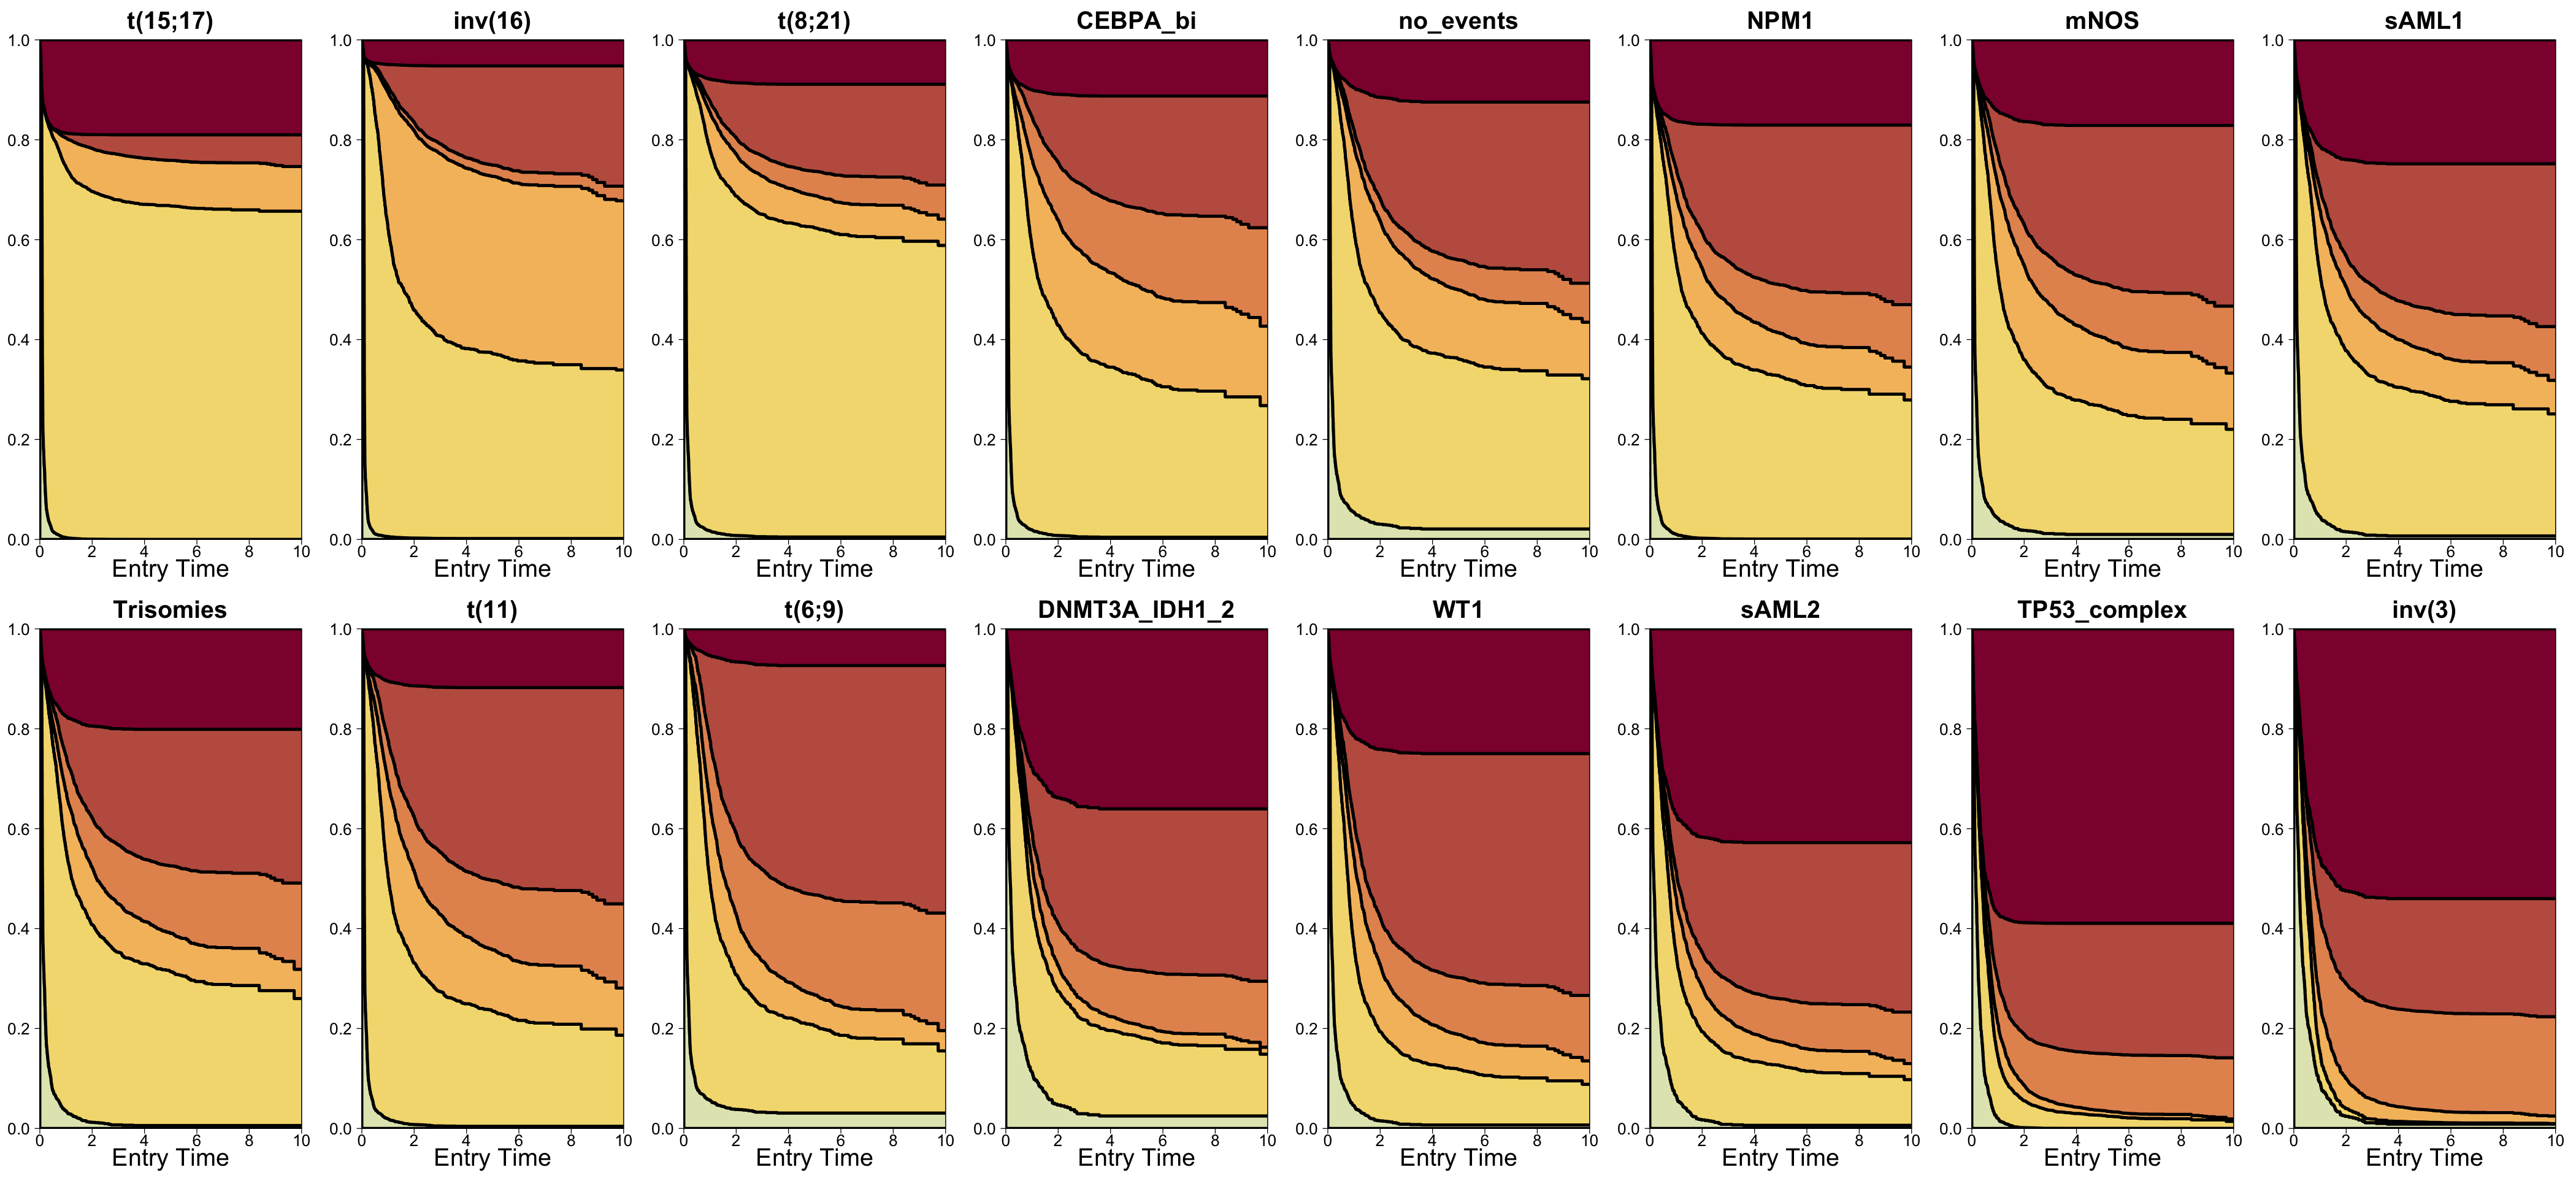

In [15]:
# Colors
statecols <- heat_hcl(6, c = c(80, 30), l = c(30, 90),power = c(1/5, 2))[c(6,5,4,3,2,1)]
ord <- c(1,2,3,4,5,6)     

# Time Point Data
data <- read.table("data/df_TRAINING_personalization_updated.tsv")[,c("patient_id","CR","Relapse",
                                                         "Death_in_CR","Death_in_Relapse",
                                                         "Death_without","CR_stat","Relapse_stat","Death_in_CR_stat",
                                                         "Death_in_Relapse_stat","Death_without_stat",princ_comps_bis)]

# Transition matrix              
tmat_data <- transMat(x = list(c(2,6), c(3, 4), c(5), c(),c(),c()), names = c("Alive", "Alive in CR", "Alive in Relapse", "Death in CR" ,"Death in Relapse", "Death without CR"))

#Multistate data
msdata <- msprep(data = data, trans = tmat_data, time = c(NA, "CR", "Relapse",
"Death_in_CR","Death_in_Relapse","Death_without"), status = c(NA, "CR_stat", "Relapse_stat", "Death_in_CR_stat","Death_in_Relapse_stat","Death_without_stat"),
                 keep = c("patient_id",princ_comps_bis))

# With classes
msdata_with_comp <- expand.covs(msdata, princ_comps_bis, longnames = FALSE)

# Cox Model with classes
expanded_princ_component <- colnames(msdata_with_comp)[grepl("principal_component_",colnames(msdata_with_comp)) & grepl("\\.",colnames(msdata_with_comp))]
form <- paste("Surv(Tstart, Tstop, status) ~ " , expanded_princ_component[1] , sep="")
for (co in expanded_princ_component[2:(length(expanded_princ_component))]){
    form <- paste (form,co,sep = " + ")
}
form <- paste(form,"+ strata(trans)")
cfull <- coxph(as.formula(form), data = msdata_with_comp, method = "breslow")

comp_ordered <- c("principal_component_t_15_17","principal_component_inv_16","principal_component_t_8_21","principal_component_CEBPA_bi","principal_component_no_events","principal_component_NPM1",
                  "principal_component_mNOS","principal_component_sAML1","principal_component_Trisomies","principal_component_t_11","principal_component_t_6_9","principal_component_DNMT3A_IDH1_2",
                  "principal_component_WT1","principal_component_sAML2","principal_component_TP53_complex","principal_component_inv_3")

# Plots class by class
set_notebook_plot_size(35,16)
par(mfrow=c(2,8))
for (co in comp_ordered){

    whA <- which(msdata[,co]==1)
    patA <- msdata[rep(whA[1], each=5), c(princ_comps_bis)]
    patA$trans <- 1:5
    attr(patA, "trans") <- tmat_data
    patA <- expand.covs(patA, c(princ_comps_bis), longnames = FALSE)
    patA$strata <- patA$trans
    msfA <- msfit(cfull, patA, trans = tmat_data)
    
    main <- str_remove(co,"principal_component_")
    main <- ifelse(main=="t_15_17","t(15;17)",
                  ifelse(main=="inv_16","inv(16)",
                        ifelse(main=="t_8_21","t(8;21)",
                              ifelse(main=="t_11","t(11)",
                                     ifelse(main=="t_6_9","t(6;9)",
                                         ifelse(main=="inv_3","inv(3)",main))))))
    
    ptA <- probtrans(msfA, predt = 0,variance=F)

    plot(ptA, ord = ord,
         las = 1, xlab = "Entry Time", xlim = c(0, 10),
         type = "filled", col = statecols[ord],lty=2,
         lwd=4,cex.lab=3,cex.axis=2,cex=2,
         main=main,cex.main=3,ylab="",legend=rep("",6))
}

is_one_to_one_mapping(msdata_with_comp)

# **Figure  4.**

## **Panel A.**


 censor relapse   death 
    201     248      74 

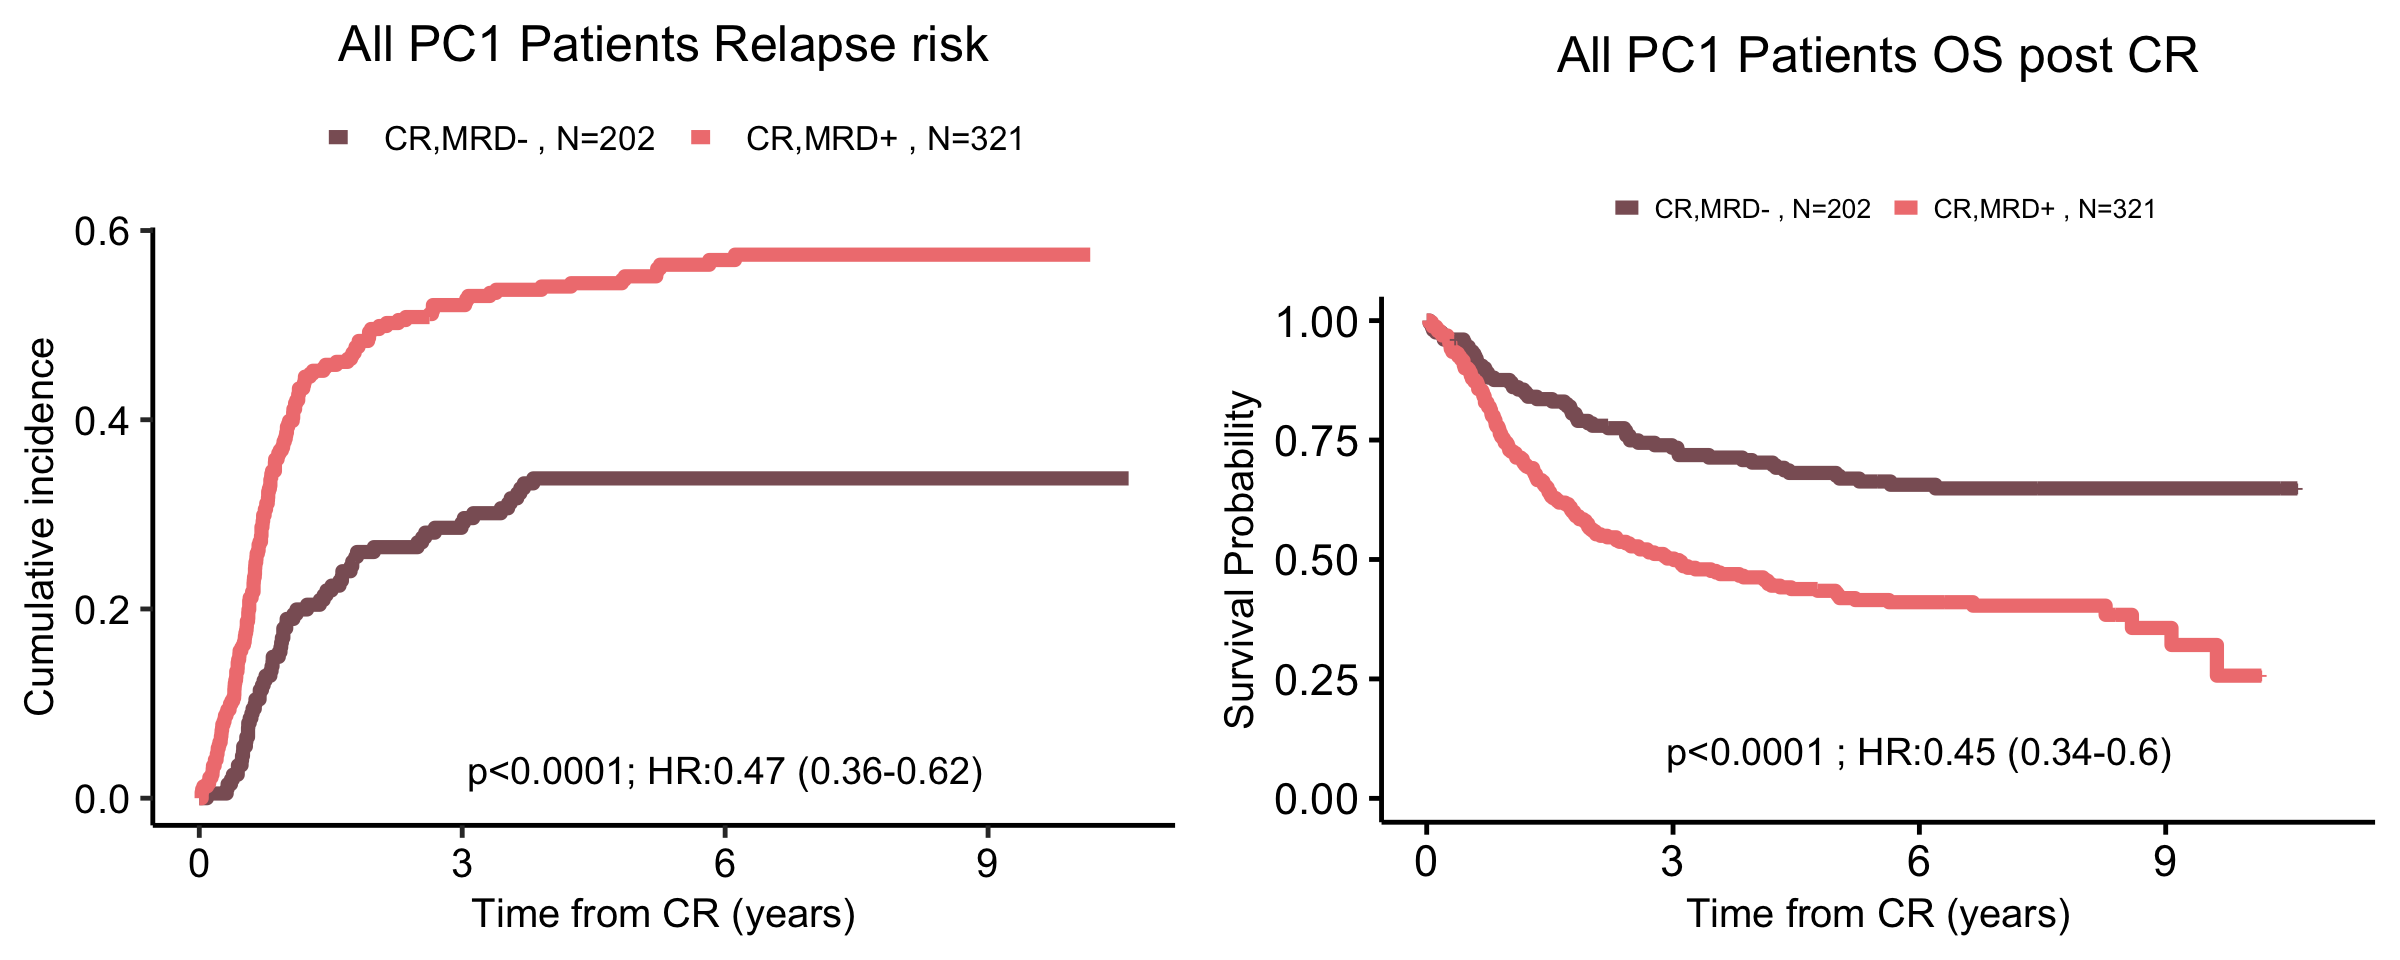

In [16]:
# Prepare MRD data
df_MRD <- read.table("data/aml17_mrd_prepared.tsv")
df_MRD$comparison <- ifelse(df_MRD$CR_MRD_neg==1,"CR,MRD-","CR,MRD+")

df_MRD$comp_sample_years <- df_MRD$RFS
df_MRD$comp_status <- "censor"
df_MRD$comp_status[df_MRD$RelapseCIStatus==1] <- "relapse"
df_MRD$comp_status[df_MRD$RelapseCIStatus==2] <- "death"
df_MRD$comp_status <- factor(df_MRD$comp_status, levels=c("censor","relapse","death"))

table(df_MRD$comp_status)

############## 1. Cumulative Incidence Part 

cmfit <- with(df_MRD,cuminc(comp_sample_years,comp_status,comparison,cencode="censor"))
tlg <- table(df_MRD$comparison[!is.na(df_MRD$comp_sample_years)])
myleg <- paste0(" ", names(tlg)," , N=",tlg,"")

# Get pvalue
pval <- cmfit$Tests["relapse","pv"]
pval <- ifelse(round(pval,4)==0,"p<0.0001",paste("p=",round(pval,4)))

# Add HR and CI
z <- crr(df_MRD$RFS,df_MRD$RelapseCIStatus,df_MRD[,c("CR_MRD_neg")])
sum <- summary(z)
text_HR <- paste("; HR:",round(sum$conf.int[1],2)," (",round(sum$conf.int[3],2),"-",round(sum$conf.int[4],2),")",sep="")
res <- paste(pval,text_HR,sep="")

# Prepare Cumulative Incidence Plot
cr <- gg_competingrisks.cuminc(cmfit,line.size=4,group.levels=names(tlg))+
scale_color_manual(values=c("#8B5F65","#F08080"),labels=myleg)+
theme(axis.text.y=element_text(size=24),axis.text.x=element_text(size=24),
      axis.title.x = element_text(size=24),axis.title.y = element_text(size=24),
      plot.title = element_text(size=30),
      legend.key.width = unit(0.5,"cm"),legend.text = element_text(size=20),legend.title = element_blank())+
      annotate("text",label=res,x=6,y=0.03,size=8)+
ggtitle("All PC1 Patients Relapse risk")

      
############## 2. Survival part

# Surv
surv_object <- Surv(time = df_MRD$OS_CR, event = df_MRD$DiedYN)
fit <- survfit(surv_object ~ comparison, data = df_MRD)
plot_surv <- plot_surv_curves(fit,y="Survival Probability",submain="",pval=F,risk.table.y.text=0,
                               font.legend=16,vals = c("#8B5F65","#F08080"),x="Time from CR (years)",xlim=c(0,11),break.x.by=3,risk.tab=T)


# Get pvalue and HR CI
res <- get_pvalue_and_HR(Surv(OS_CR,DiedYN)~CR_MRD_neg,data = df_MRD)

# Survival Plot
p <- plot_surv$plot+
     annotate(geom="text", x=6 , y=0.1, label=res,size=8,color="black")+
     theme(plot.title = element_text(hjust = 0.5,size=30,vjust=0))+
     ggtitle("All PC1 Patients OS post CR")

# Plots
set_notebook_plot_size(20,8)
grid.arrange(cr,p,nrow=1)

## ***Panel B.***

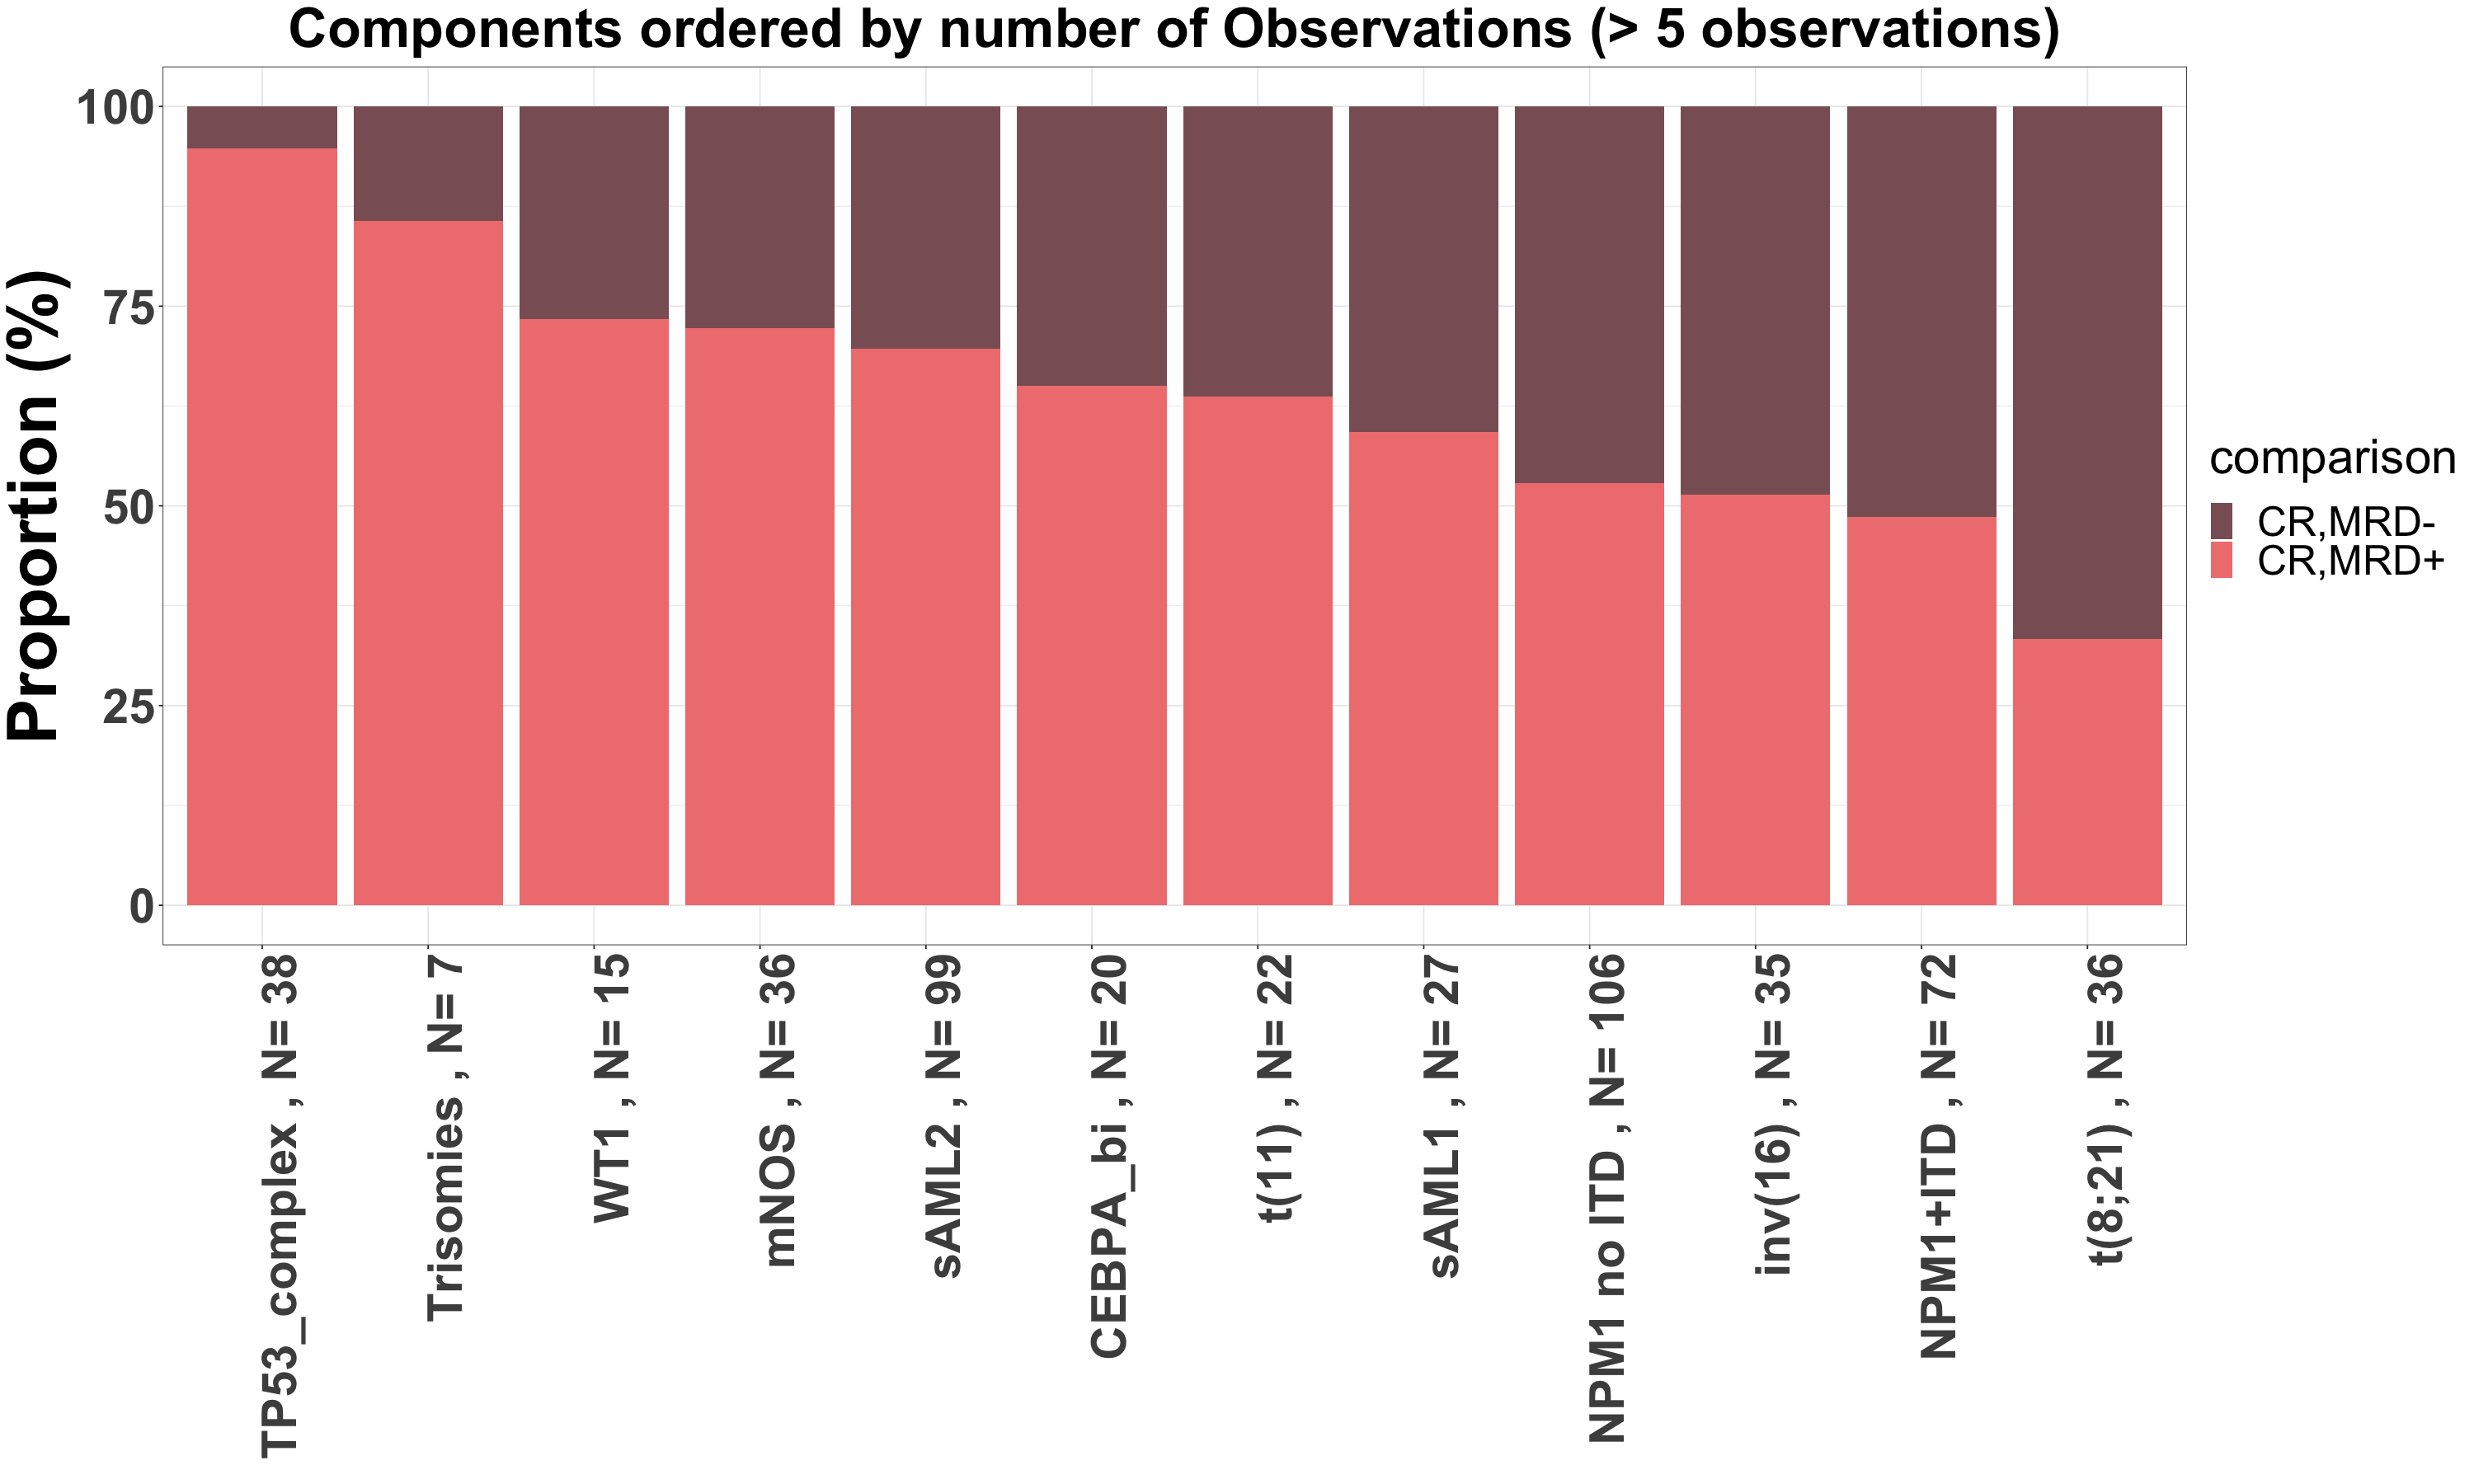

In [17]:
df_MRD_Freq <- NULL

df_MRD <- read.table("data/aml17_mrd_prepared.tsv")
df_MRD$comparison <- ifelse(df_MRD$CR_MRD_neg==1,"CR,MRD-","CR,MRD+")

# Prepare MRD proportions by class
for (co in princ_comps_bis){
    if(co=="principal_component_NPM1"){
        # With ITD for NPM1
        df_class <- df_MRD[df_MRD[,co]==1 & df_MRD$ITD==1,]
        df_class$components <- "NPM1+ITD"
        df_class$components <- paste(df_class$components,sep=" , N= ",nrow(df_class))
        df_class$freq <- nrow(df_class[df_class$comparison=="CR,MRD+",])/nrow(df_class)
        df_MRD_Freq <- rbind(df_MRD_Freq,df_class)
        
        # Without ITD for NPM1
        df_class <- df_MRD[df_MRD[,co]==1 & df_MRD$ITD==0,]
        df_class$components <- "NPM1 no ITD"
        df_class$components <- paste(df_class$components,sep=" , N= ",nrow(df_class))
        df_class$freq <- nrow(df_class[df_class$comparison=="CR,MRD+",])/nrow(df_class)
        df_MRD_Freq <- rbind(df_MRD_Freq,df_class)
    } else {
        df_class <- df_MRD[df_MRD[,co]==1,]
        if(nrow(df_class)>5){
            
        df_class$components <- str_remove(co,"principal_component_")
        df_class$components <- ifelse(df_class$components=="t_8_21","t(8;21)",
                                  ifelse(df_class$components=="inv_16","inv(16)",
                                         ifelse(df_class$components=="t_11","t(11)",
                                                ifelse(df_class$components=="chr_splicing_1","sAML 1",
                                                      ifelse(df_class$components=="chr_splicing_multiple","sAML 2",
                                                             ifelse(df_class$components=="not_assigned","mNOS",df_class$components))))))
                                                                                    
        df_class$components <- paste(df_class$components,sep=" , N= ",nrow(df_class))
        df_class$freq <- nrow(df_class[df_class$comparison=="CR,MRD+",])/nrow(df_class)
        df_MRD_Freq <- rbind(df_MRD_Freq,df_class)
        }
    }
}

MRD_Freq_plot <- ggplot(df_MRD_Freq,aes(x=reorder(components,-freq),fill=comparison))+
                 geom_bar(aes( y=100*..count../tapply(..count.., ..x.. ,sum)[..x..],fill=comparison))+
                 scale_fill_manual(values=c("#8B5F65","#F08080"))+
                 theme_bw()+
                 theme(plot.title = element_text(hjust = 0.5,size=40,face="bold"),
                       axis.text.x = element_text(size=35,face="bold",angle=90,hjust=1),axis.text.y = element_text(size=35,face="bold"),
                       axis.title.y=element_text(size=50,face="bold"),legend.text=element_text(size=30),legend.title=element_text(size=35))+
                 xlab("")+
                 ylab("Proportion (%)")+
                 ggtitle("Components ordered by number of Observations (> 5 observations)")

# MRD Frequency by class Plot
set_notebook_plot_size(25,15)
MRD_Freq_plot

## ***Panel C.***

[1] "principal_component_sAML2"
[1] "principal_component_sAML1"


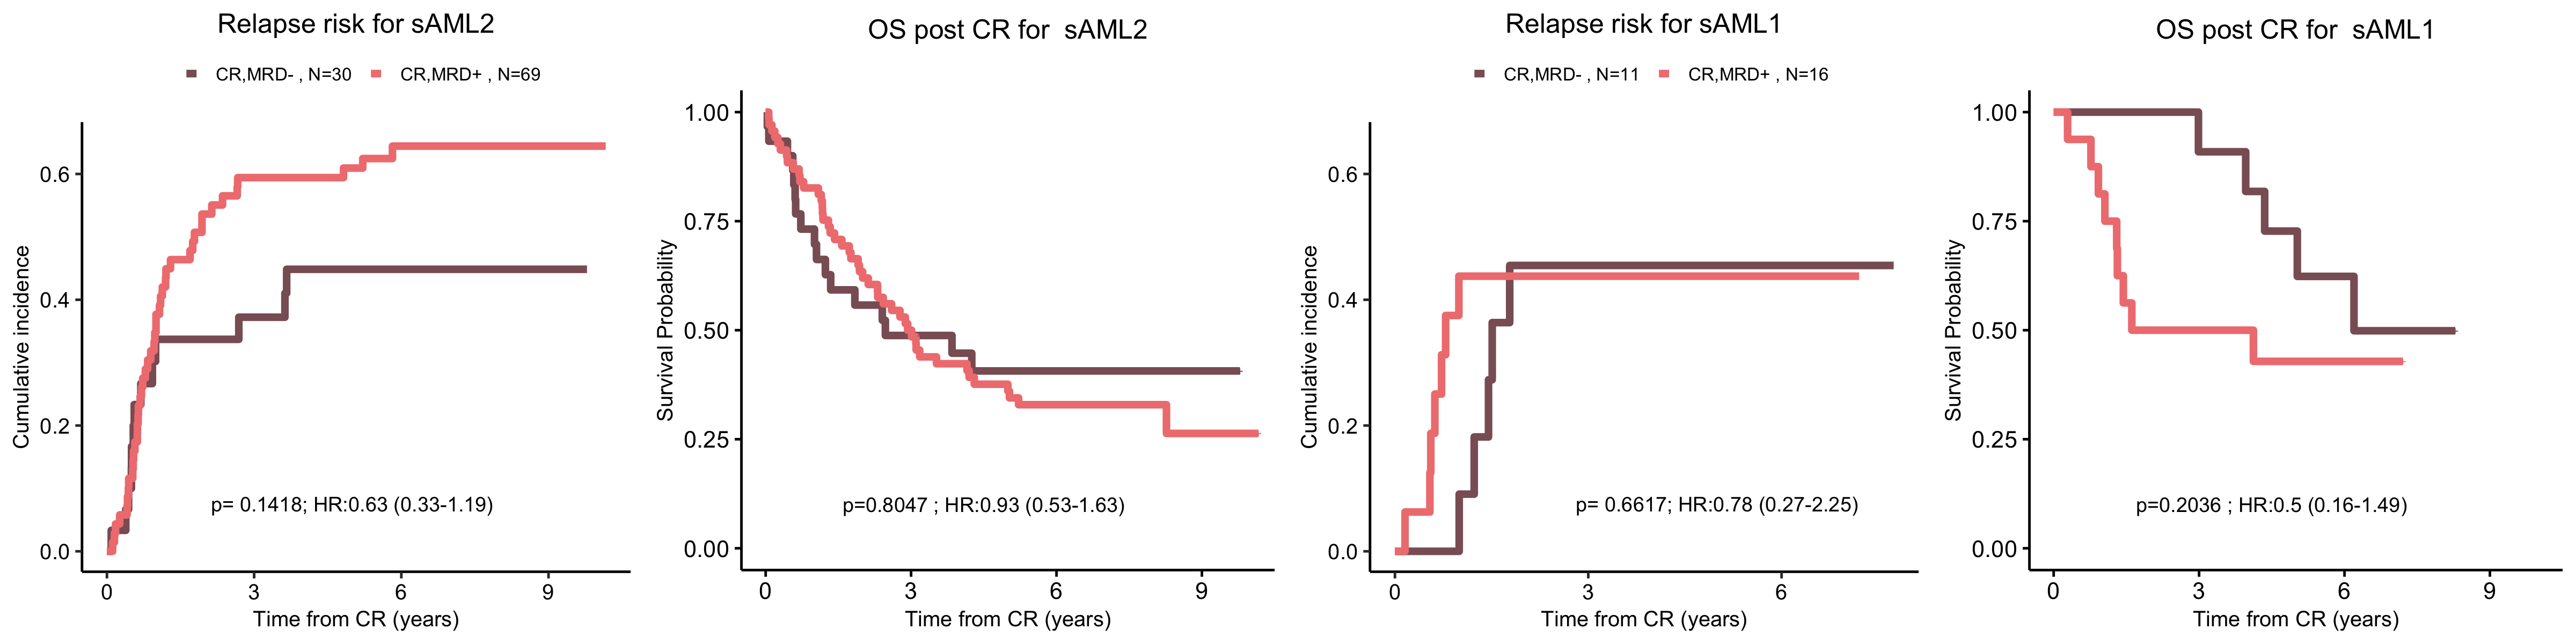

In [18]:
# Prepare MRD data
df_MRD <- read.table("data/aml17_mrd_prepared.tsv")
df_MRD$comparison <- ifelse(df_MRD$CR_MRD_neg==1,"CR,MRD-","CR,MRD+")

df_MRD$comp_sample_years <- df_MRD$RFS
df_MRD$comp_status <- "censor"
df_MRD$comp_status[df_MRD$RelapseCIStatus==1] <- "relapse"
df_MRD$comp_status[df_MRD$RelapseCIStatus==2] <- "death"
df_MRD$comp_status <- factor(df_MRD$comp_status, levels=c("censor","relapse","death"))

p <- list()
cr <- list()
i <- 1

for (event in c("principal_component_sAML2","principal_component_sAML1")){

    tmp <- df_MRD[df_MRD[,event]==1 ,]
    tmp_cr <- df_MRD[df_MRD[,event]==1 ,]
    
    print(event)
    title <- str_remove(event,"principal_component_")
        
######## Cumulative Incidence 
    tmp_cr$comparison <- ifelse(tmp_cr$CR_MRD_neg==1,"CR,MRD-","CR,MRD+")
    cmfit <- with(tmp_cr,cuminc(comp_sample_years,comp_status,comparison,cencode="censor"))
    tlg <- table(tmp_cr$comparison[!is.na(tmp_cr$comp_sample_years)])
    myleg <- paste0(" ", names(tlg)," , N=",tlg,"")

    # Get pvalue
    pval <- cmfit$Tests["relapse","pv"]
    pval <- ifelse(round(pval,4)==0,"p<0.0001",paste("p=",round(pval,4)))
    # Add HR and CI
    z <- crr(tmp_cr$RFS,tmp_cr$RelapseCIStatus,tmp_cr[,c("CR_MRD_neg")])
    sum <- summary(z)
    text_HR <- paste("; HR:",round(sum$conf.int[1],2)," (",round(sum$conf.int[3],2),"-",round(sum$conf.int[4],2),")",sep="")
    res <- paste(pval,text_HR,sep="")

    # Prepare Cumulative Incidence Plot
    cr[[i]] <- gg_competingrisks.cuminc(cmfit,line.size=4,group.levels=names(tlg),title=paste("Relapse risk for",title))+
               scale_color_manual(values=c("#8B5F65","#F08080"),labels=myleg)+
               theme(axis.text.y=element_text(size=24),axis.text.x=element_text(size=24),
                     axis.title.x = element_text(size=24),axis.title.y = element_text(size=24),
                     plot.title = element_text(size=30),
                     legend.key.width = unit(0.5,"cm"),legend.text = element_text(size=20),legend.title = element_blank())+
               annotate("text",label=res,x=5,y=0.075,size=8)+ylim(c(0,0.65))

######## Survival         
    tmp$comparison <- ifelse(tmp$CR_MRD_neg==1,"CR,MRD-","CR,MRD+")
    surv_object <- Surv(time = tmp$OS_CR, event = tmp$DiedYN)
    fit <- survfit(surv_object ~ comparison, data = tmp)


    # Add Pval and HR CI
    res <- get_pvalue_and_HR(Surv(OS_CR,DiedYN)~CR_MRD_neg,data = tmp)

    # Surv Plot        
    p[[i]] <- plot_surv_curves(fit,y="Survival Probability",submain="",pval=F,legend="none",
                               font.legend=16,vals = c("#8B5F65","#F08080"),
                               x="Time from CR (years)",xlim=c(0,10),break.x.by=3)$plot+
              annotate(geom="text", x=4.5 , y=0.1, label=res,size=8,color="black")+
              theme(plot.title = element_text(hjust = 0.5,size=30,vjust=0))+
              ggtitle(paste("OS post CR for " ,title ))

    i <- i+1
    
}

# Plots
set_notebook_plot_size(40,10)
do.call("grid.arrange",list(cr[[1]],p[[1]],cr[[2]],p[[2]],nrow=1))



## **Panel D.**

[1] 2244   43

[1] 1808   43

[1] "p<0.0001 ; HR : 0.41  (  0.3 - 0.58 )"

[1] "p = 0.2596  ; HR : 0.71  (  0.39 - 1.29 )"

[1] "p = 0.0033  ; HR : 0.52  (  0.34 - 0.81 )"

[1] 2244   43

[1] 1808   43

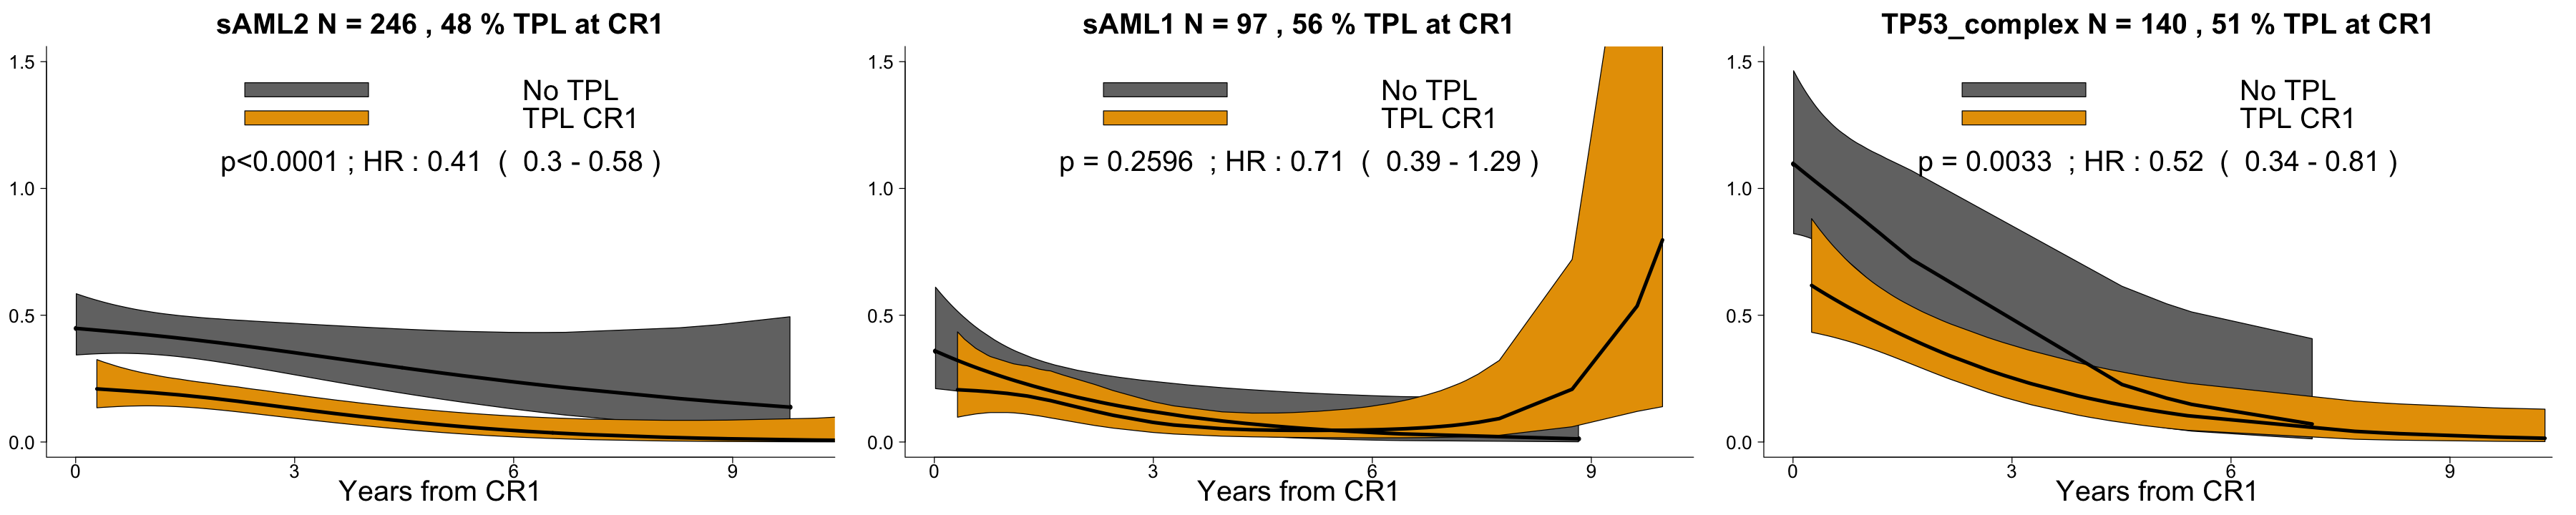

In [19]:
data_merged_transplant <- read.table("data/data_both_transplant.tsv")
dim(data_merged_transplant)


data_merged_transplant <- data_merged_transplant[data_merged_transplant$TPL_CR2_stat==0,]
dim(data_merged_transplant)

columns <- c(colnames(data_merged_transplant)[grep("principal_component", colnames(data_merged_transplant))],"age","perf_status")
column_tdc <- "age"

combined_tdc <- rbind(prepare_transplant_pvalues(data=data_merged_transplant,columns=columns,column_tdc="age")$No_TPL,
                     prepare_transplant_pvalues(data=data_merged_transplant,columns=columns,column_tdc="age")$TPL)

res_sAML2 <- get_tdc_Transplant_pvalues(formula=Surv(Start, Stop, OS_Status) ~ age_tdc + perf_status +
Transplant, data = combined_tdc[combined_tdc$principal_component_sAML2==1,])

res_sAML1 <- get_tdc_Transplant_pvalues(formula=Surv(Start, Stop, OS_Status) ~ age_tdc + perf_status +
Transplant, data = combined_tdc[combined_tdc$principal_component_sAML1==1,])

res_TP53_complex <- get_tdc_Transplant_pvalues(formula=Surv(Start, Stop, OS_Status) ~ age_tdc + perf_status +
Transplant, data = combined_tdc[combined_tdc$principal_component_TP53_complex==1,])

res_sAML2 
res_sAML1
res_TP53_complex


color_No_TPL <- "grey45"
color_TPL <- "#E79F00"
data_merged_transplant <- read.table("data/data_both_transplant.tsv")
dim(data_merged_transplant)


data_merged_transplant <- data_merged_transplant[data_merged_transplant$TPL_CR2_stat==0,]
dim(data_merged_transplant)

tdc_No_TPL <- prepare_transplant_data(data=data_merged_transplant,columns=columns)$No_TPL
tdc_TPL <- prepare_transplant_data(data=data_merged_transplant,columns=columns)$TPL

par(mfrow=c(1,3))

set_notebook_plot_size(30,6)
for(co in c("principal_component_sAML2","principal_component_sAML1","principal_component_TP53_complex")){

    res <- ifelse(co=="principal_component_sAML2",res_sAML2,ifelse(co=="principal_component_sAML1",res_sAML1,
                                                                   ifelse(co=="principal_component_TP53_complex",res_TP53_complex,"NO")))

    y_No_TPL <- bshazard(Surv(Start, Stop, Status)~1, data=tdc_No_TPL[tdc_No_TPL[,co] ==1,],verbose=F )
    y_TPL <- bshazard(Surv(Start, Stop, Status)~1, data=tdc_TPL[tdc_TPL[,co] ==1,],verbose=F)

    title <- str_remove(co,"principal_component_")

    title <- paste(title, "N =" , nrow(data_merged_transplant[data_merged_transplant[,co]==1,]), ",", 
                   round(100*nrow(data_merged_transplant[data_merged_transplant[,co]==1 & data_merged_transplant$TPL_CR1_stat==1,])/
                         nrow(data_merged_transplant[data_merged_transplant[,co]==1,])), "% TPL at CR1")

    plot(y_No_TPL$time, y_No_TPL$hazard,  xlab="Years from CR1",xaxs="r",
         yaxs="r",bty="l",ylab=ifelse(i==1,"",""),cex.lab=3,
         cex.main=3,main=title ,xlim=c(0, 10), ylim=c(0, 1.5),
         cex.axis=2,xaxt='n',las=1)
    
    axis(1,at=c(0,3,6,9),labels=c(0,3,6,9),cex.axis=2)

    polygon(c(y_No_TPL$time, rev(y_No_TPL$time)), c(y_No_TPL$lower.ci, rev(y_No_TPL$upper.ci)),col=color_No_TPL)

    polygon(c(y_TPL$time, rev(y_TPL$time)), c(y_TPL$lower.ci, rev(y_TPL$upper.ci)),col=color_TPL)

    legend(x=0.2,y=1.5, c("No TPL","TPL CR1"),fill=c(color_No_TPL,color_TPL), bty="n",cex=3,pt.cex=1.3,ncol=1)

    text(x=5,y=1.1,res,cex=3)    
    lines(y_No_TPL$time, y_No_TPL$hazard, col=1, lwd=4)
    lines(y_TPL$time, y_TPL$hazard, col=1, lwd=4)
}

## ***Panel E.***

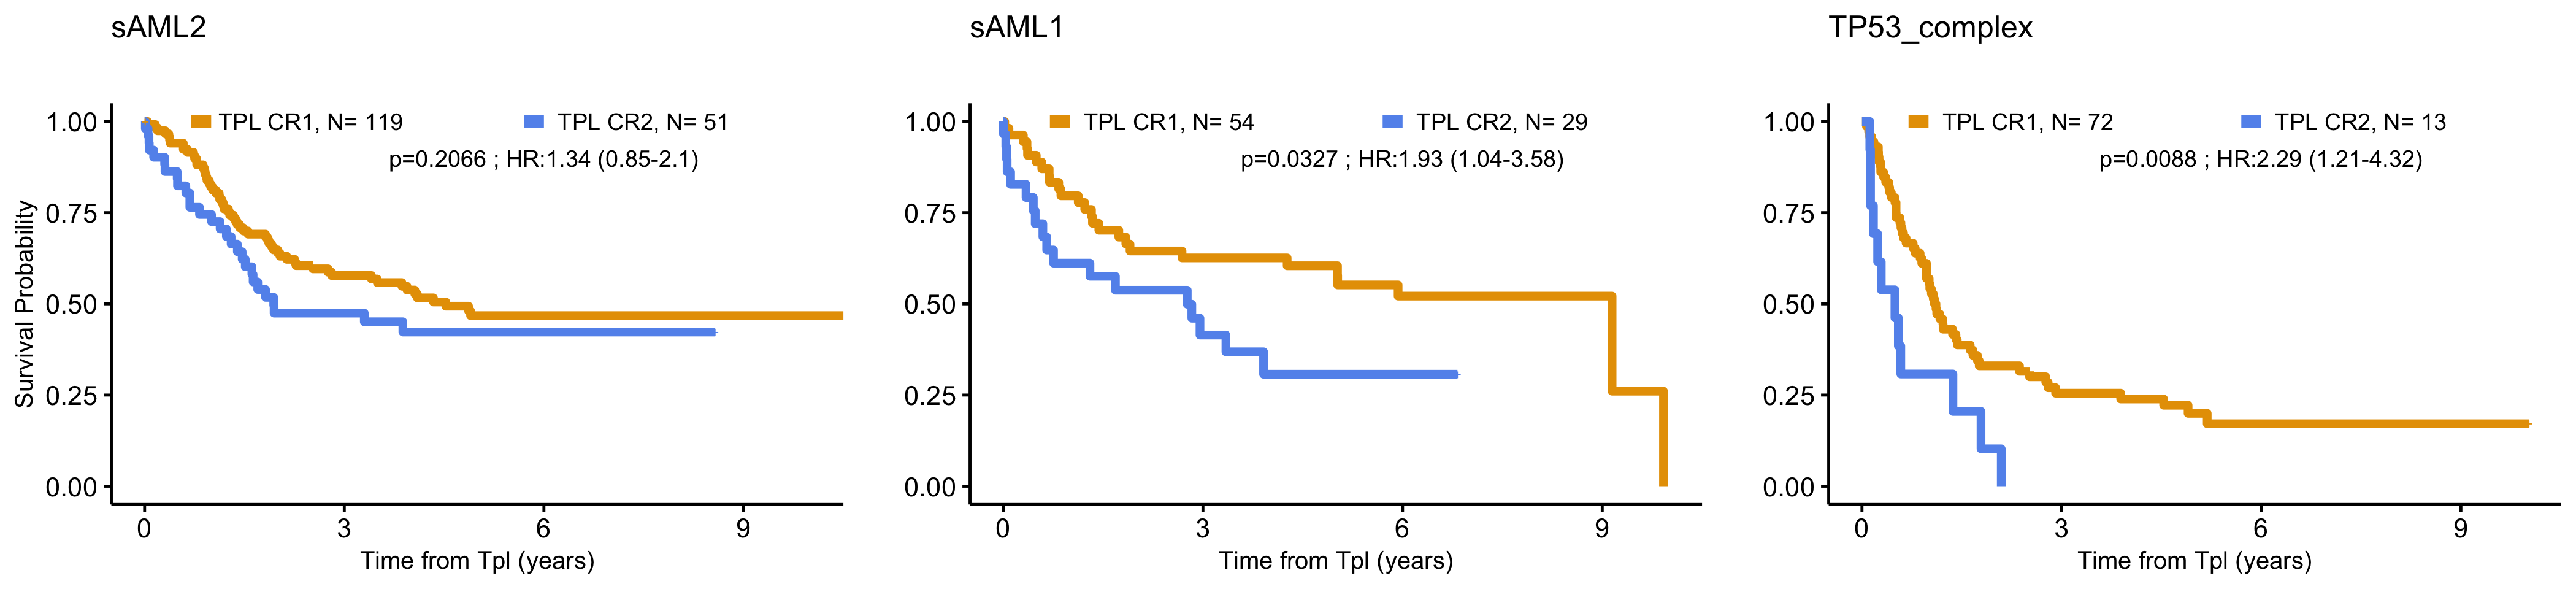

In [20]:
data_both_transplant <- read.table("data/data_both_transplant.tsv")


p <- list()
i <- 1

for (class in c('principal_component_sAML2','principal_component_sAML1','principal_component_TP53_complex')){

    title <- str_remove(class,"principal_component_")
    
    # Subset by class and make sure transplant either CR1 or CR2 
    
    df_class <- data_both_transplant[data_both_transplant[,class]==1 & (data_both_transplant$TPL_CR1_stat==1 | data_both_transplant$TPL_CR2_stat==1)  ,]
    
                                                             

    
    df_class$comparison <- ifelse(df_class$TPL_CR1_stat==1,"TPL_CR1",ifelse(df_class$TPL_CR2_stat==1,"TPL_CR2","No_TPL"))
    df_class$Surv <- ifelse(df_class$comparison!="No_TPL",df_class$OS-df_class$TPL_date,df_class$OS-df_class$CR)
    surv_object <- Surv(time = df_class$Surv, event = df_class$OS_stat)
    fit <- survfit(surv_object ~ comparison, data = df_class)
    
    ## Add Pval and HR CI
    res <- get_pvalue_and_HR(Surv(Surv,OS_stat)~comparison,data = df_class)
    
    ## Plot 
    p[[class]] <- plot_surv_curves(fit,pval.coord = c(4,0.8),legend="none",#font.y=1,#font.tickslab=0,
                          vals=c("#E79F00","#6495ED"),x="Time from Tpl (years)",font.legend=20,font.tile=16,
                         y=ifelse(i%%4==1,"Survival Probability",""),xlim=c(0,10),break.x.by=3,ylim=c(0,1),pval=F,title=title)$plot +
                annotate(geom="text", x=6 , y=0.9, label=res,size=8,color="black") +
                annotate("segment", x = c(0.7,5.7), xend = c(1,6), y = c(1,1), yend = c(1,1),size=6,colour = c("#E79F00","#6495ED")) + 
                annotate(geom="text", x=c(2.5,7.5) , y=c(1,1), 
                         label=c(paste("TPL CR1, N=",nrow(df_class[df_class$comparison=="TPL_CR1",])),
                                 paste("TPL CR2, N=",nrow(df_class[df_class$comparison=="TPL_CR2",]))),size=8)    
    i <- i+1

}
set_notebook_plot_size(35,8)
grid.arrange(p[[1]],p[[2]],p[[3]],ncol=3)


# **Figure 5.**

## ***Panel A.***

## ***Panel B.***

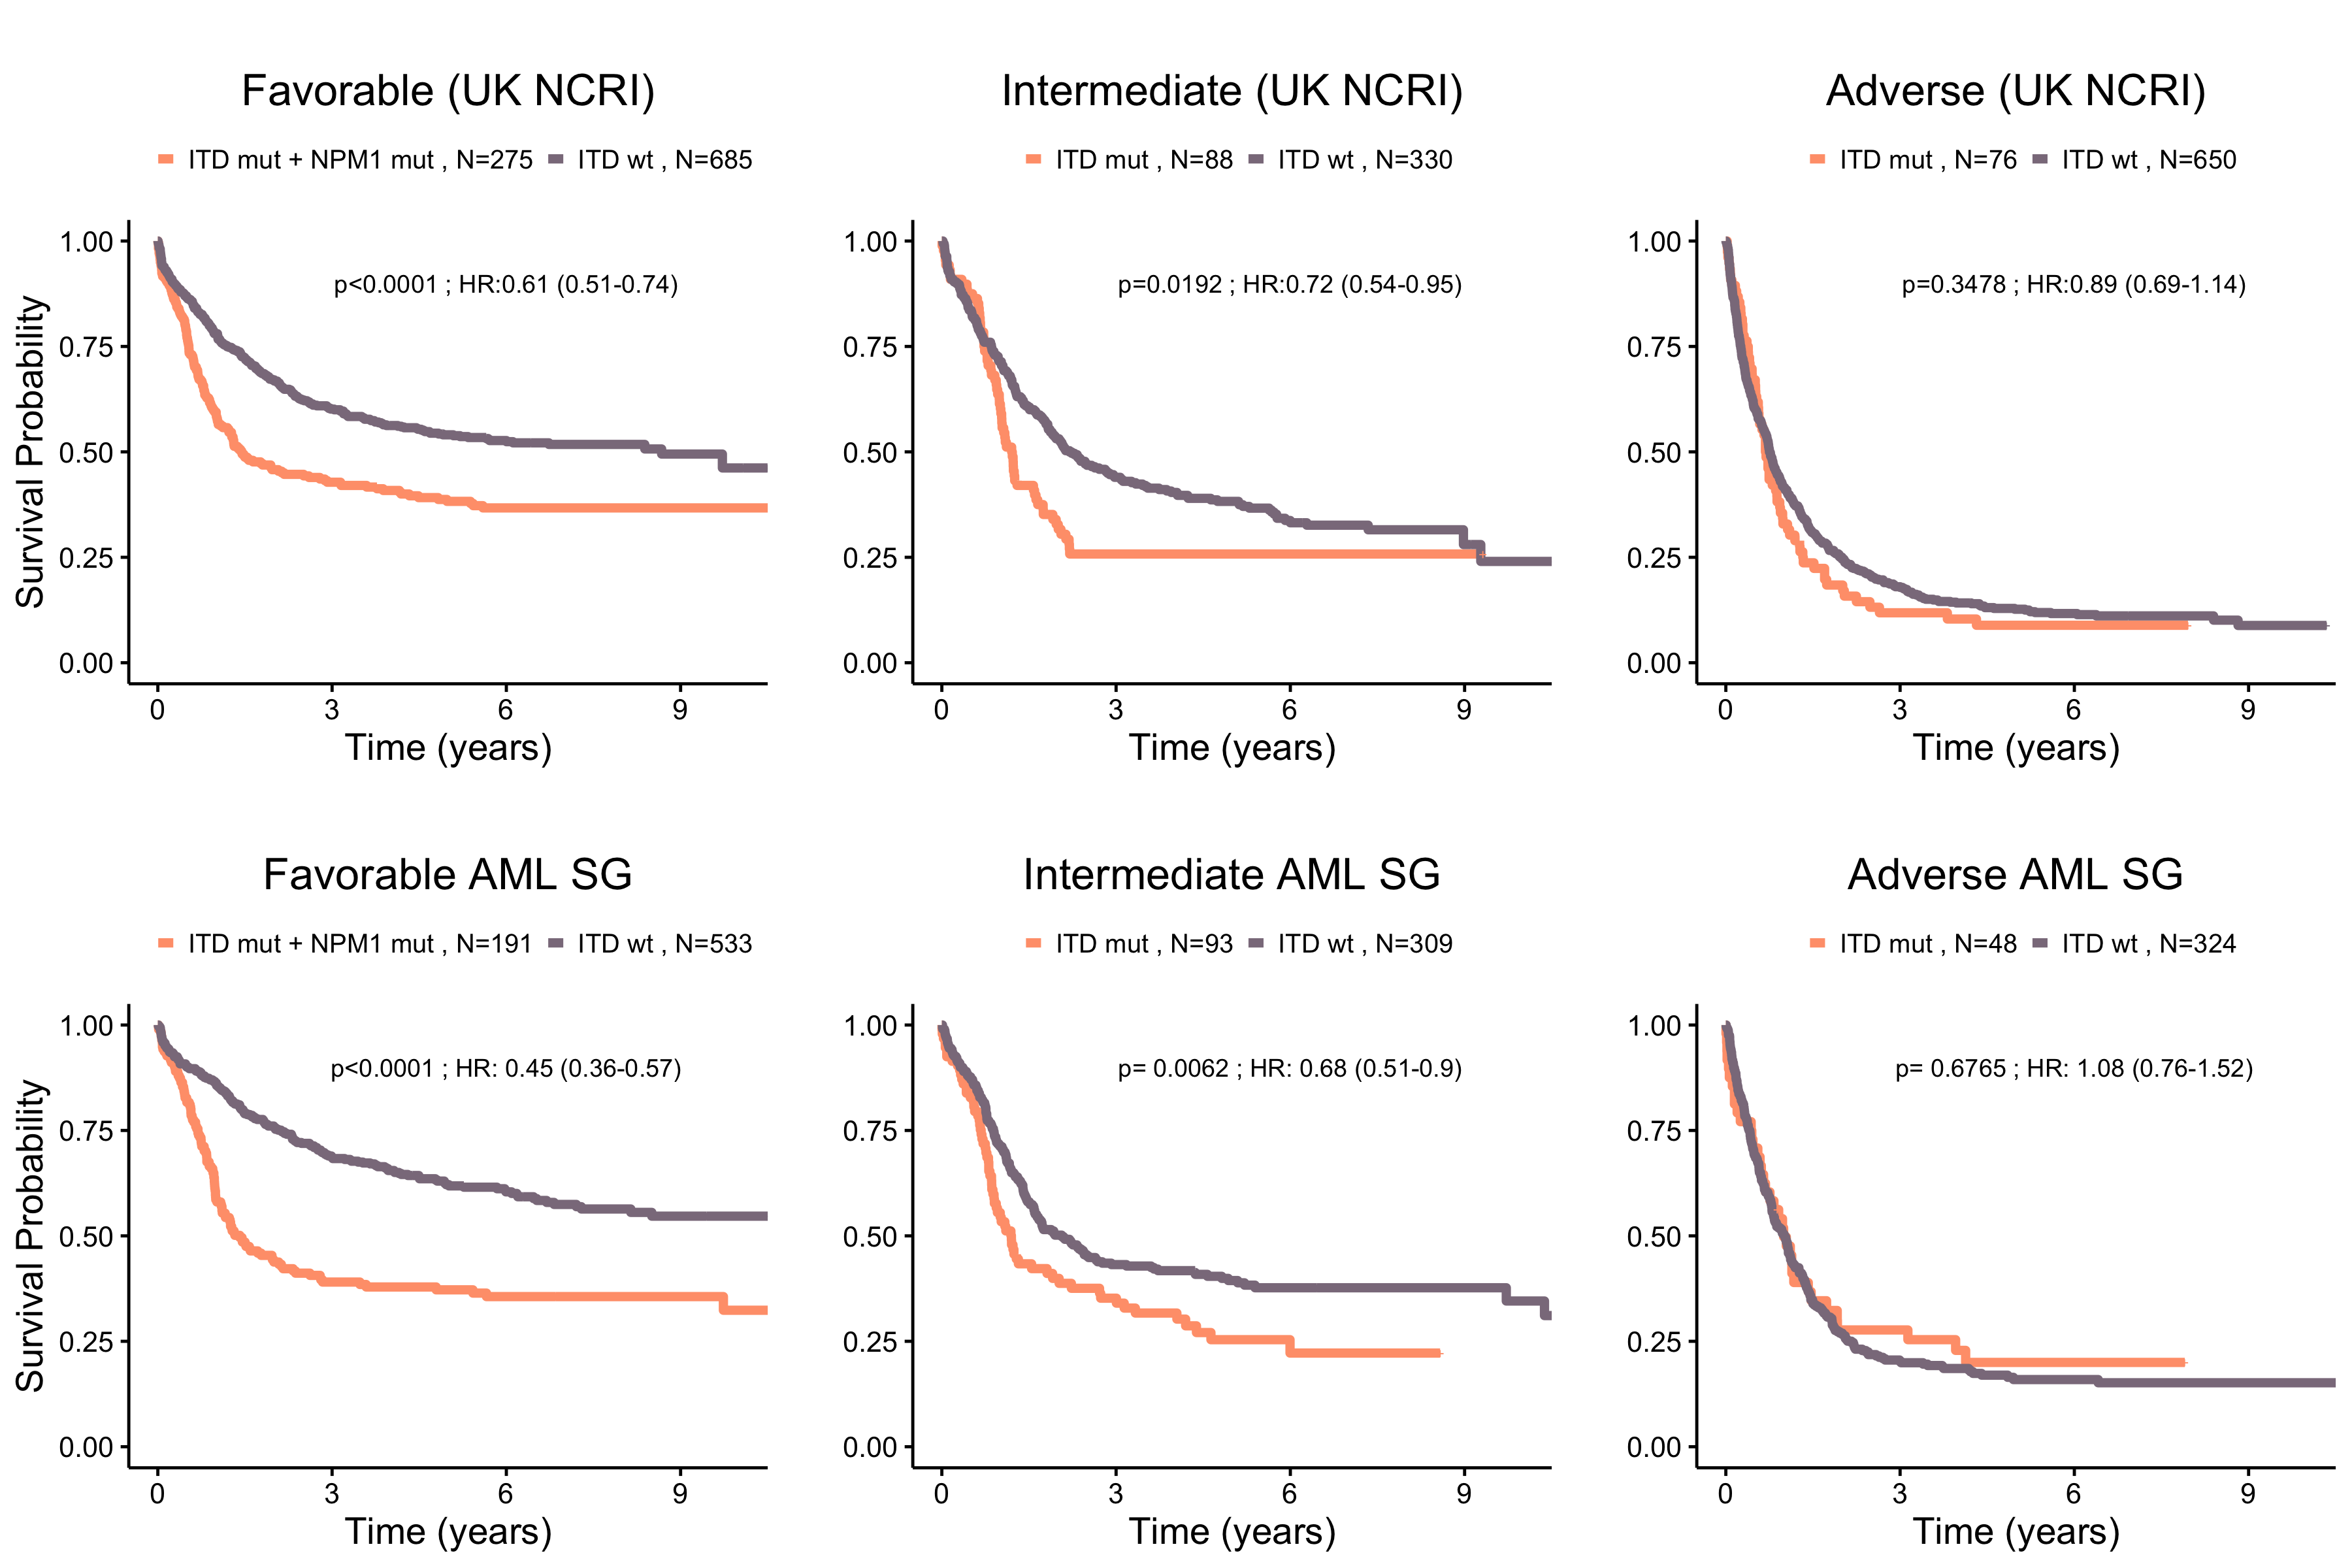

In [21]:
df_final_with_molecular_classification_without_ITD_shift <- molecular_proposal_classification_without_ITD_shift(df_final_bis)
df_validation_with_molecular_classification_without_ITD_shift <- molecular_proposal_classification_without_ITD_shift(df_validation_bis)

# Training Plots

plist_training <- list()
for (risk_strat in c("favorable","intermediate","adverse")){
    tmp <- df_final_with_molecular_classification_without_ITD_shift[df_final_with_molecular_classification_without_ITD_shift$molecular_classification==risk_strat,]
    if(risk_strat=="favorable"){
        tmp$comparison <-ifelse(tmp$principal_component_NPM1==1 & tmp$ITD==1,"ITD mut + NPM1 mut",ifelse(tmp$ITD==0,"ITD wt","others"))
        tmp <- tmp[tmp$comparison!="others",]
    }else{
        tmp$comparison <-ifelse(tmp$ITD==1,"ITD mut","ITD wt")
    }
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    
    
    # Add pval HR and CI
    res <- get_pvalue_and_HR(Surv(os,os_status)~comparison,data = tmp)
    
    
    plist_training[[risk_strat]] <- plot_surv_curves(fit,font.legend = 24,y=ifelse(risk_strat=="favorable","Survival Probability",""),xlim=c(0,10),break.x.by=3,
                                                    font.submain=40,submain = "",vals=c("#FFA07A","#8B7B8B"),pval=F,font.x=34,font.y=34)$plot + 
                                            theme(plot.title = element_text(hjust = 0.5,size=40,vjust=-5))+ggtitle(paste(str_to_title(risk_strat),"(UK NCRI)"))+
                                             annotate(geom="text", x=6 , y=0.9, label=res,size=8,color="black") 
}

# Validation Plots

plist_validation <- list()
for (risk_strat in c("favorable","intermediate","adverse")){
    tmp <- df_validation_with_molecular_classification_without_ITD_shift[df_validation_with_molecular_classification_without_ITD_shift$molecular_classification==risk_strat,]
    if(risk_strat=="favorable"){
        tmp$comparison <-ifelse(tmp$principal_component_NPM1==1 & tmp$ITD==1,"ITD mut + NPM1 mut",ifelse(tmp$ITD==0,"ITD wt","others"))
        tmp <- tmp[tmp$comparison!="others",]
    }else{
        tmp$comparison <-ifelse(tmp$ITD==1,"ITD mut","ITD wt")
    }

    surv_object <- Surv(time = tmp$OS, event = tmp$OS_Status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    
    
    # Add pval HR and CI
    res <- pairwise_survdiff(Surv(OS,OS_Status)~comparison,data = tmp)
    res <- ifelse(round(res$p.value[1],4)==0,"p<0.0001",paste("p=",round(res$p.value[1],4)))
    sum <- summary(coxph(Surv(OS,OS_Status) ~ comparison, data = tmp, method = "breslow"))
    index <- ifelse(!is.na(sum$conf.int[1,1]),1,2)
    text_HR <- paste("; HR: ",round(sum$conf.int[index,1],2)," (",round(sum$conf.int[index,3],2),"-",round(sum$conf.int[index,4],2),")",sep="")
    res <- paste(res, text_HR)
    
    
    plist_validation[[risk_strat]] <- plot_surv_curves(fit,font.legend = 24,y=ifelse(risk_strat=="favorable","Survival Probability",""),xlim=c(0,10),break.x.by=3,
                                                 font.submain=40,submain = "",vals=c("#FFA07A","#8B7B8B"),pval=F,font.x=34,font.y=34)$plot +
                                            theme(plot.title = element_text(hjust = 0.5,size=40,vjust=-5))+ggtitle(paste(str_to_title(risk_strat),"AML SG"))+
                                             annotate(geom="text", x=6 , y=0.9, label=res,size=8,color="black") 
}


# Plots
set_notebook_plot_size(30,20)
do.call("grid.arrange",c(plist_training,plist_validation,nrow=2))

## ***Panel C.***

[1] 528
[1] 385


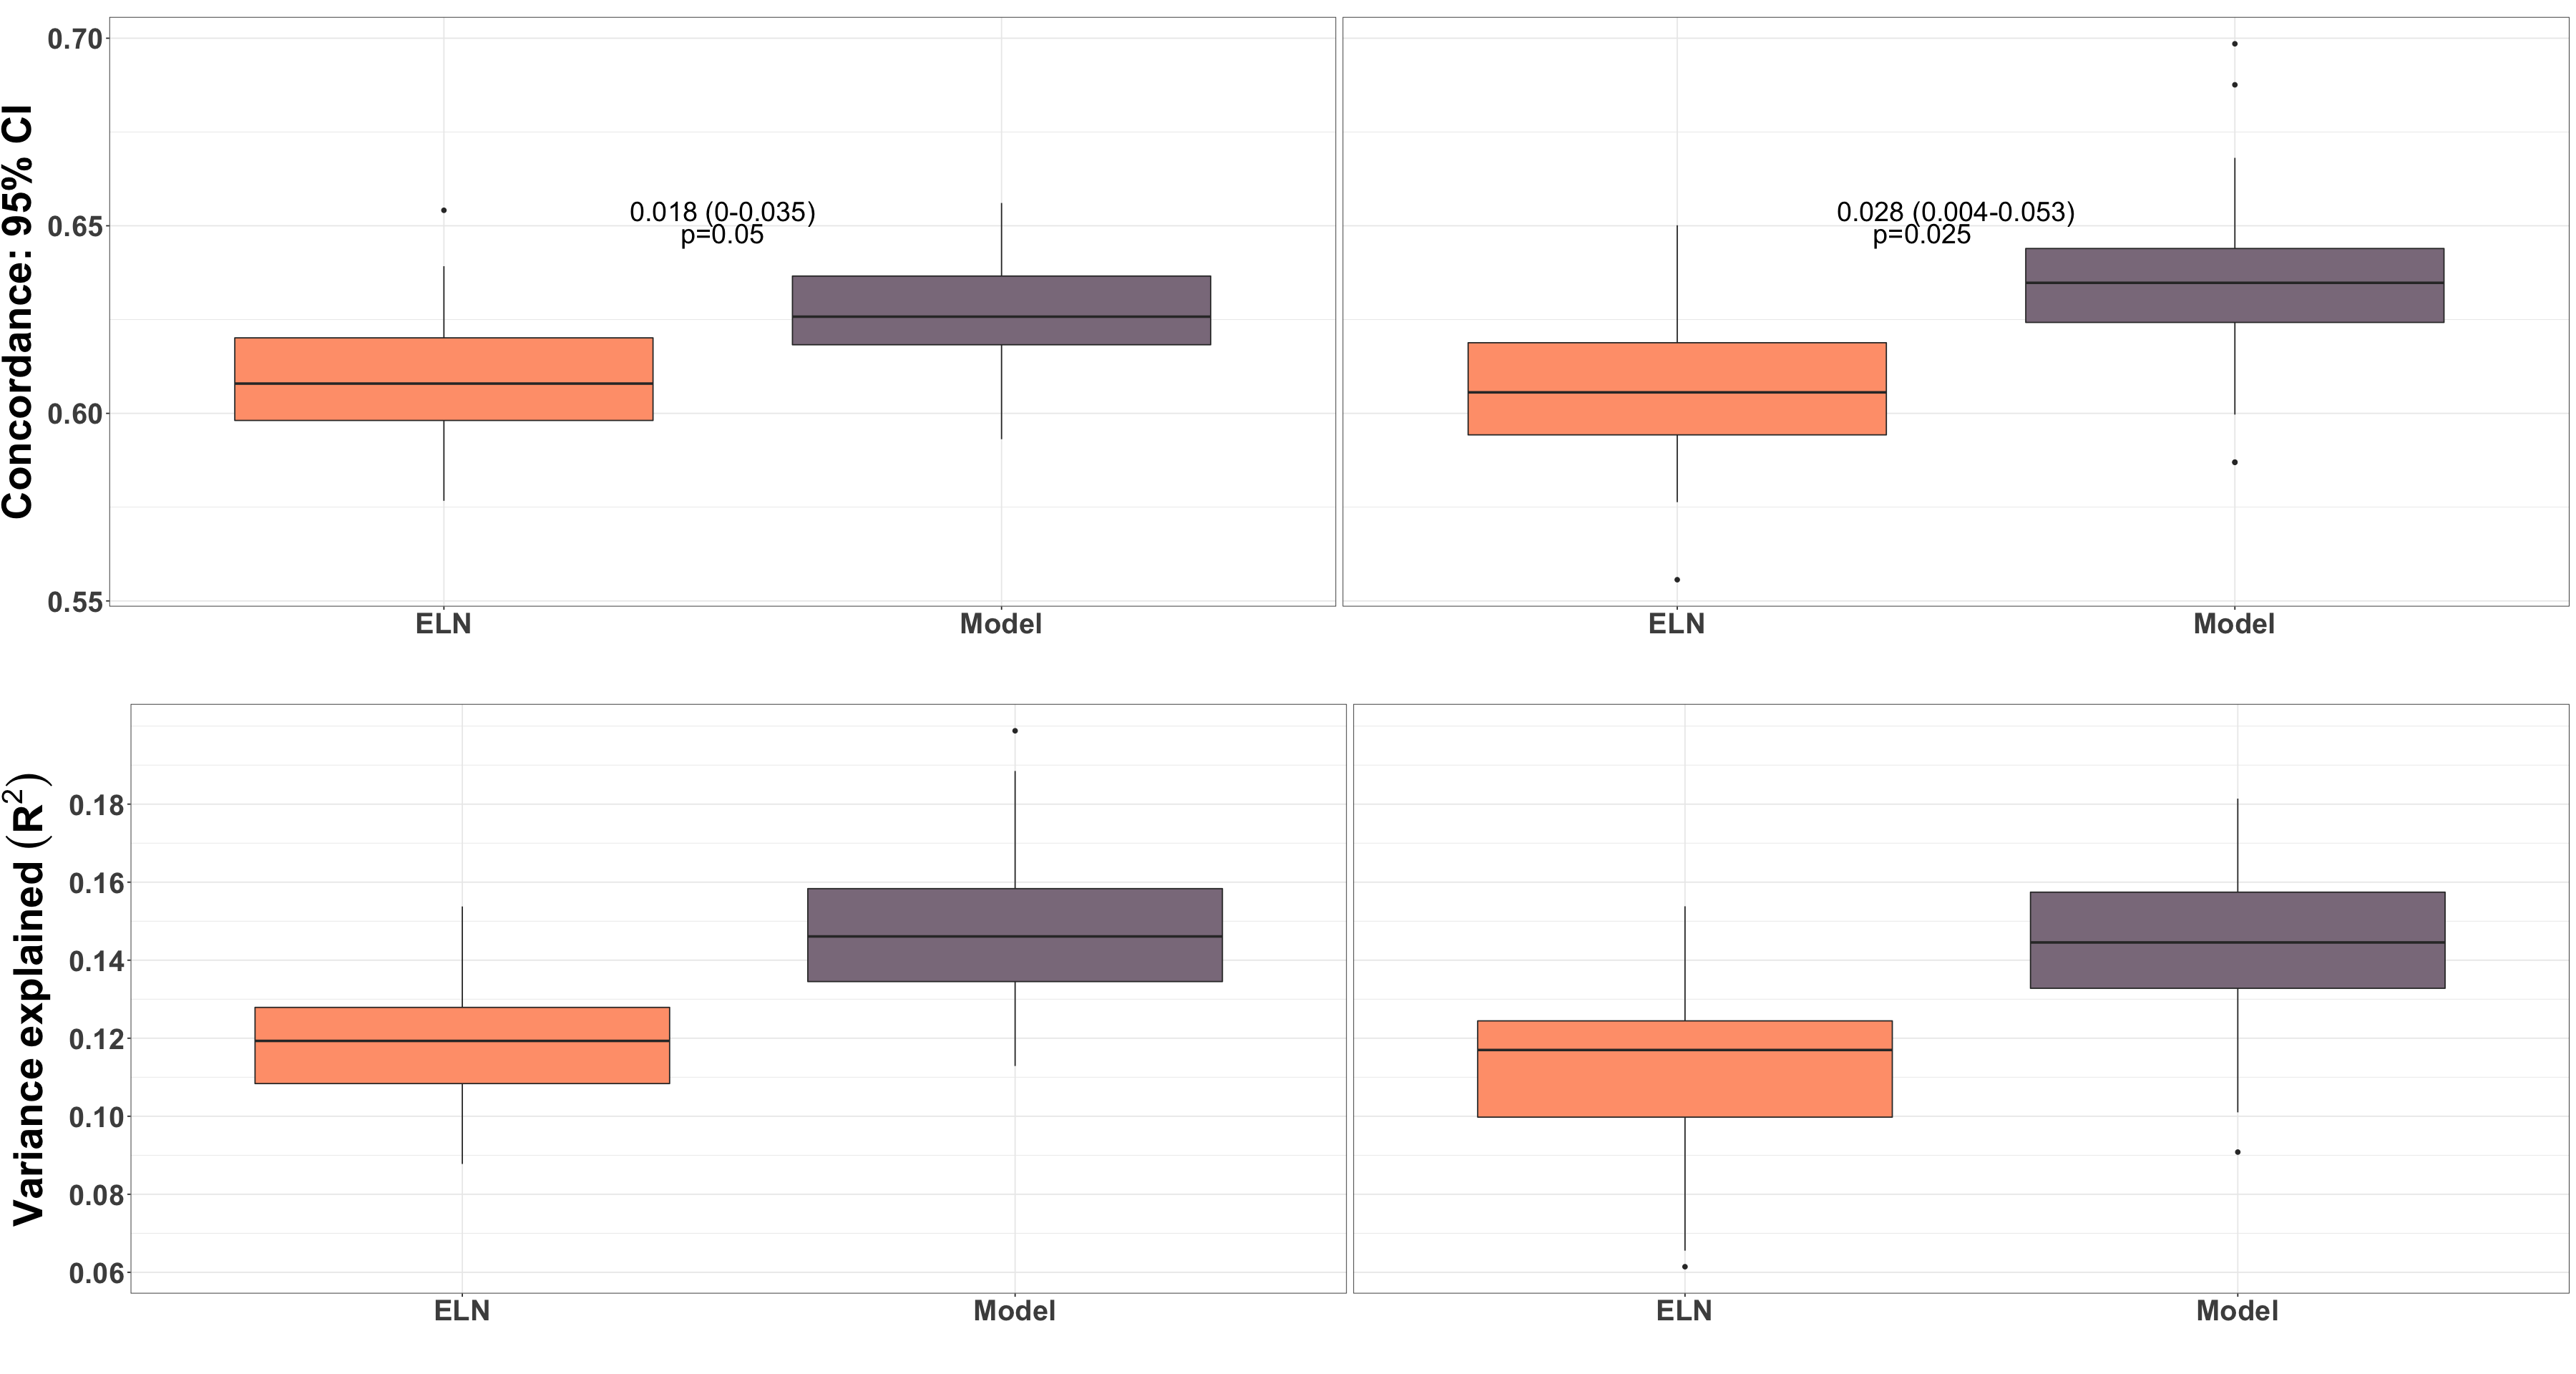

In [22]:

##################### Part 1: Concordance Index

# Pvalues and CI

# 1. Pvalue,CI training
df_results_training <- read.table("data/bootstrap_results_NCRI_cohort_eln_proposal.tsv")
NF <- round(0.25*nrow(df_final))
print(NF)
meanbs <- apply(df_results_training, 2, mean)
SEbs <- apply(df_results_training, 2, sd)
lowerbs <- meanbs-1.96*SEbs
upperbs <- meanbs+1.96*SEbs
Delta1 <- df_results_training[,which(colnames(df_results_training) =="molecular_classification")]  - df_results_training[,which(colnames(df_results_training) =="eln_2017")]
t1 <- abs(mean(Delta1) - 0)/sd(Delta1)
PvalueDelta1 <- round(2*pt(t1, NF-1,  lower.tail = FALSE),3)
if(PvalueDelta1 == 0) PvalueDelta1 <- "<0.001"
nam_risk_eln_training <- paste(round(mean(Delta1),3), " (",round(mean(Delta1) - 1.96*sd(Delta1), 3) ,"-",round(mean(Delta1) + 1.96*sd(Delta1), 3) , ")",sep="")
pval_risk_eln_training <- paste("p=",PvalueDelta1, sep="")

# 2. Pvalue,CI validation
df_results_validation <- read.table("data/bootstrap_results_NEJM_cohort_eln_proposal.tsv")
NF <- round(0.25*nrow(df_validation))
print(NF)
meanbs <- apply(df_results_validation, 2, mean)
SEbs <- apply(df_results_validation, 2, sd)
lowerbs <- meanbs-1.96*SEbs
upperbs <- meanbs+1.96*SEbs
Delta1 <- df_results_validation[,which(colnames(df_results_validation) =="molecular_classification")]  - df_results_validation[,which(colnames(df_results_validation) =="eln_2017")]
t1 <- abs(mean(Delta1) - 0)/sd(Delta1)
PvalueDelta1 <- round(2*pt(t1, NF-1,  lower.tail = FALSE),3)
if(PvalueDelta1 == 0) PvalueDelta1 <- "<0.001"
nam_risk_eln_validation <- paste(round(mean(Delta1),3), " (",round(mean(Delta1) - 1.96*sd(Delta1), 3) ,"-",round(mean(Delta1) + 1.96*sd(Delta1),3) , ")",sep="")
pval_risk_eln_validation <- paste("p=",PvalueDelta1, sep="")


# Prepare plot

# 1. Training
df_results_training <- read.table("data/bootstrap_results_NCRI_cohort_eln_proposal.tsv")
df_results_training$id <- rownames(df_results_training)
df_results_training <- melt(setDT(df_results_training),id.vars="id")
df_results_training$Dataset <- "Training Cohort"

# 2. Validation
df_results_validation <- read.table("data/bootstrap_results_NEJM_cohort_eln_proposal.tsv")
df_results_validation$id <- rownames(df_results_validation)
df_results_validation <- melt(setDT(df_results_validation),id.vars="id")
df_results_validation$Dataset <- "Validation Cohort"

#3. Combined
df_results_combined <- rbind(df_results_training,df_results_validation)

df_results_combined$variable <- factor(df_results_combined$variable,label=c("Model","ELN"))

p <- ggplot(df_results_combined,aes(x=reorder(variable,value),y=value,fill=variable))+
     geom_boxplot()+
     theme_bw()+
     facet_wrap(~Dataset)+
     geom_text(data=data.frame(x=c(1.5,1.5,1.5,1.44), y=c(0.654,0.648,0.654,0.648),
                               label=c(nam_risk_eln_training,pval_risk_eln_training,nam_risk_eln_validation,pval_risk_eln_validation),
                               Dataset=c("Training Cohort","Training Cohort","Validation Cohort","Validation Cohort")),
                               aes(x,y,label=label),
                               inherit.aes=FALSE,size=8)+
     scale_fill_manual(values = c("#8B7B8B","#FFA07A"))+
     theme(legend.position = "none",strip.text = element_text(face="bold", size=0),strip.background = element_blank(),
           axis.text = element_text(face="bold", size=24),axis.title.y=element_text(vjust=1.5),axis.title = element_text(face="bold", size=34))+
     xlab("")+
     ylab("Concordance: 95% CI")



##################### Part 2: R squared 

df_Rsquared <- rbind(read.table("data/results_NCRI_cohort_eln_proposal_RSQUARED.tsv"),read.table("data/results_NEJM_cohort_eln_proposal_RSQUARED.tsv"))

q <- ggplot(df_Rsquared,aes(x=Model,y=R_squared,fill=Model))+#coord_cartesian(ylim=c(0.07,0.12))+
geom_boxplot()+theme_bw()+facet_wrap(~Dataset)+scale_fill_manual(values = c("#FFA07A","#8B7B8B"))+theme(legend.position = "none")+
ylab(expression(bold(Variance~explained~(R^2))))+
theme(strip.text = element_text(face="bold", size=0),strip.background = element_blank(),axis.text = element_text(face="bold", size=24),
      axis.title = element_text(face="bold", size=34),axis.title.y=element_text(vjust=1.5),)+scale_y_continuous(breaks = seq(0.06,0.18,0.02))+xlab("")

# Plot:
set_notebook_plot_size(30,16)
grid.arrange(p,q,nrow=2)

# **Figure 6.**

[Derived from AML Risk Model Patient](https://www.aml-risk-model.com/)